# Bike Rentals

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from itertools import combinations

import pdpexplorer
from pdpexplorer.pdp import partial_dependence, plot

In [2]:
df_original = pd.read_csv('bike-sharing.csv')

In [3]:
categories = ['weathersit']
df_one_hot = pd.get_dummies(df_original, columns=categories)

In [4]:
feature_to_one_hot = {
    original_feat: [
        (feat, feat.split('_')[-1])
        for feat in df_one_hot.columns
        if feat.startswith(original_feat)
    ]
    for original_feat in categories
}
feature_to_one_hot

{'weathersit': [('weathersit_1', '1'),
  ('weathersit_2', '2'),
  ('weathersit_3', '3')]}

In [5]:
df_X = df_one_hot.drop(columns=['label', 'prediction'])

In [6]:
y = df_original['label'].to_numpy()

In [7]:
regr = RandomForestRegressor(n_estimators=20)
regr.fit(df_X, y)

RandomForestRegressor(n_estimators=20)

In [8]:
features = [col for col in df_original.columns if col != 'label' and col != 'prediction']
pairs = list(combinations(features, 2))

In [9]:
pd_data = partial_dependence(
    predict=regr.predict,
    df=df_X,
    one_way_features=features,
    two_way_feature_pairs=pairs,
    one_hot_features=feature_to_one_hot,
    n_instances=100,
    resolution=20,
    n_jobs=8,
)

In [18]:
w = pdpexplorer.PDPExplorerWidget(
    predict=regr.predict,
    df=df_X,
    one_hot_features=feature_to_one_hot,
    pd_data=pd_data,
    n_jobs=8,
    height=600
)

w

PDPExplorerWidget(double_pdps=[{'num_features': 2, 'kind': 'mixed', 'id': 'season_yr', 'x_feature': 'season', …

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [13]:
one_way_pdps, two_way_pdps = plot(
    data=pd_data,
    one_way_sort_by='good_fit',
    two_way_sort_by='h',
    same_prediction_scale=True
);

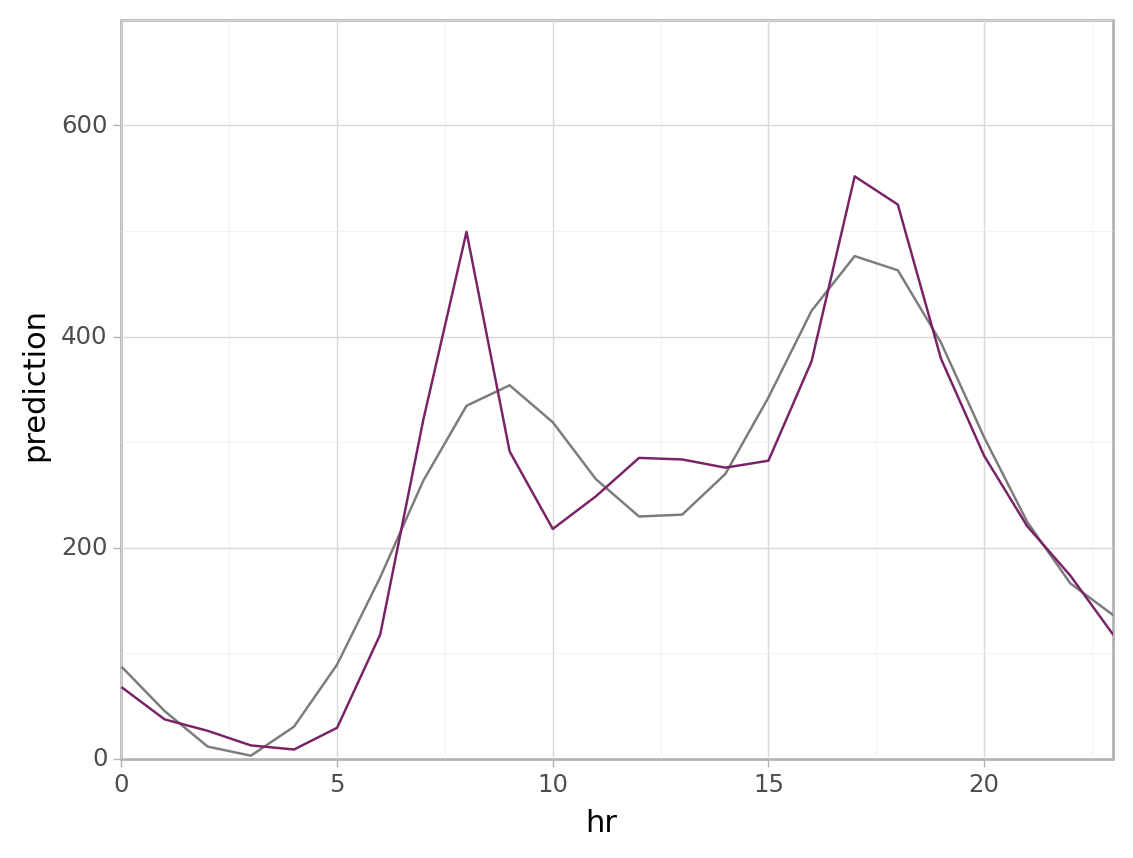

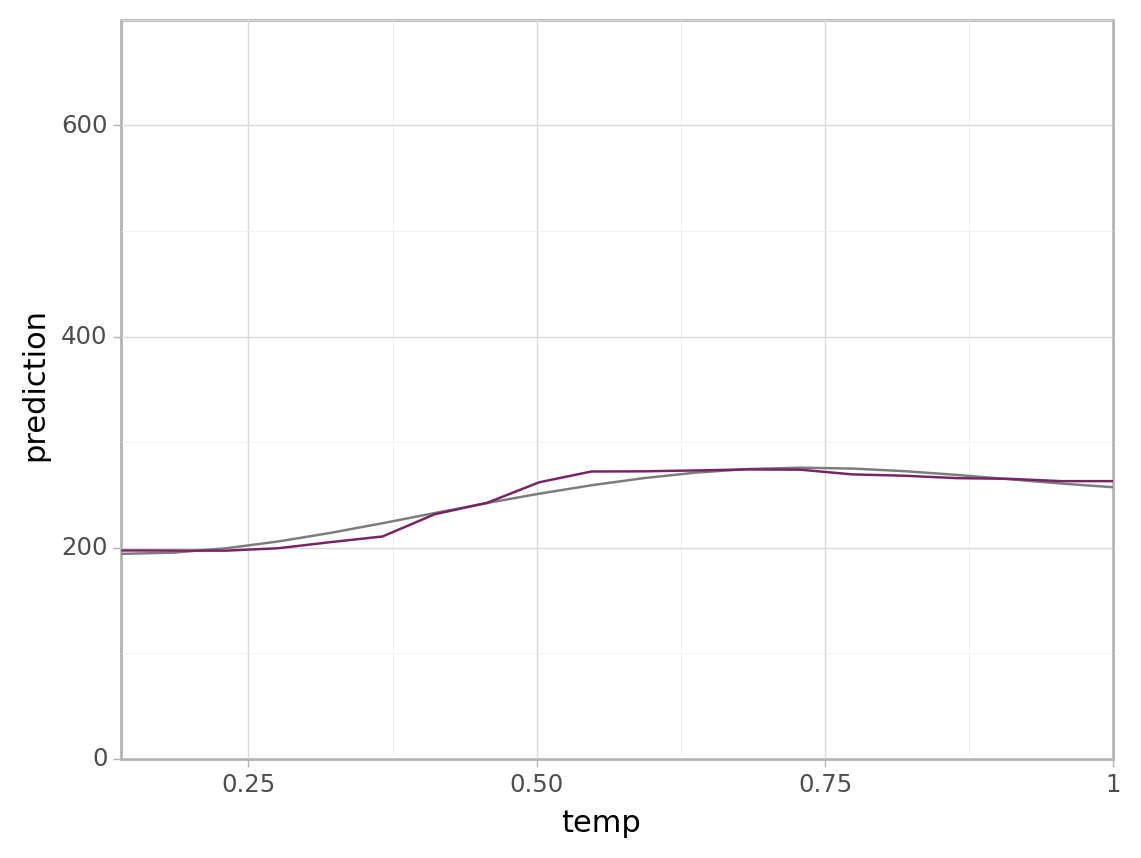

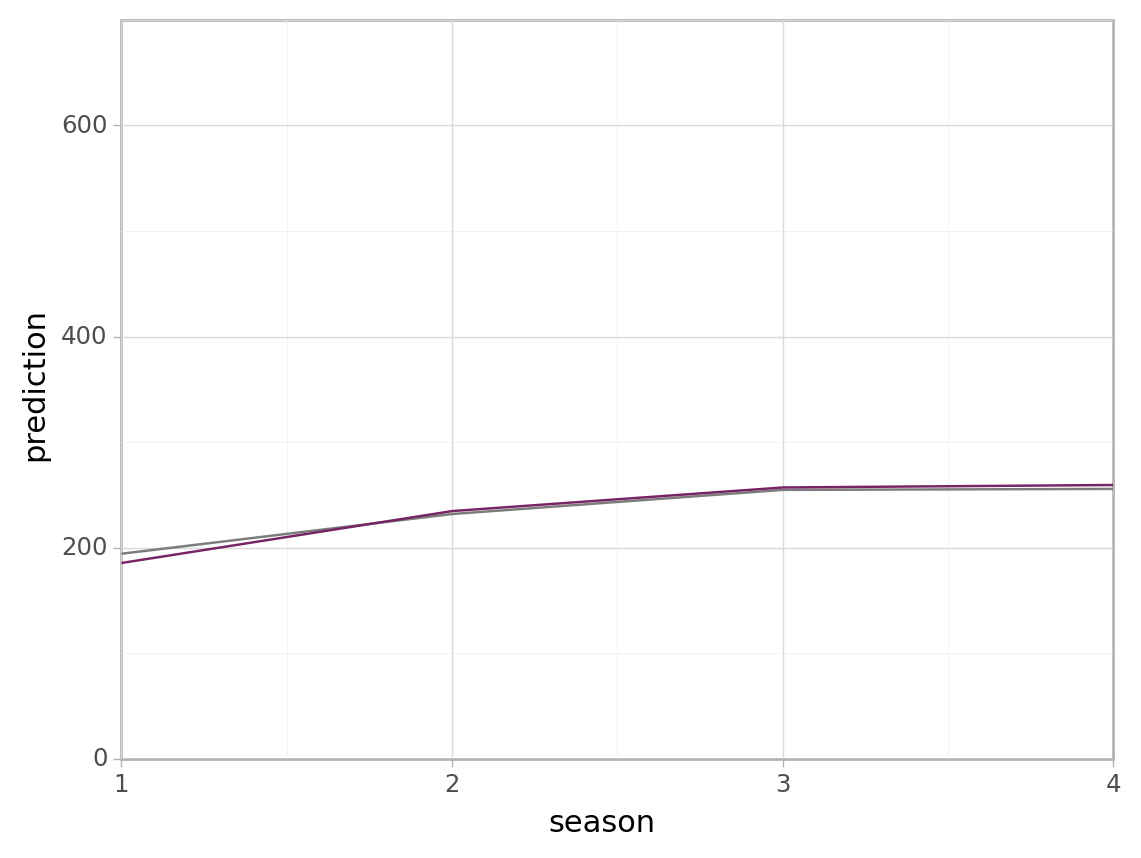

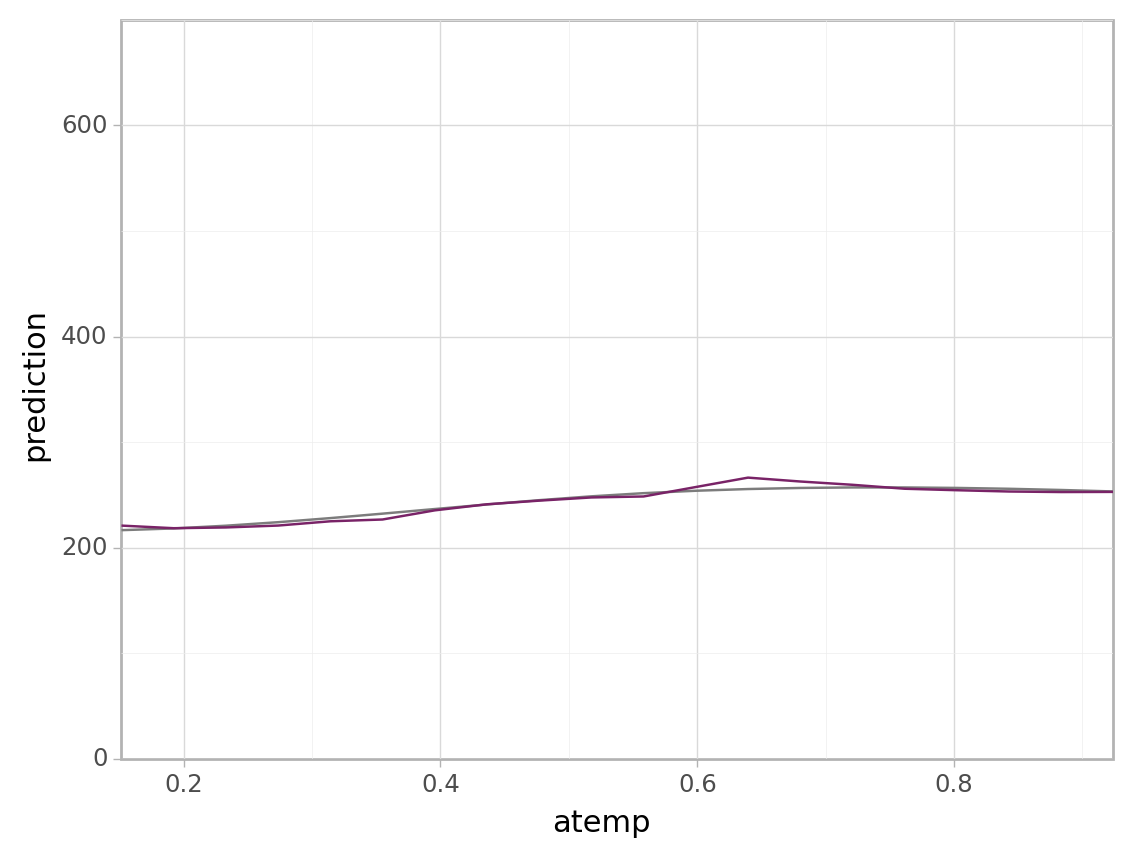

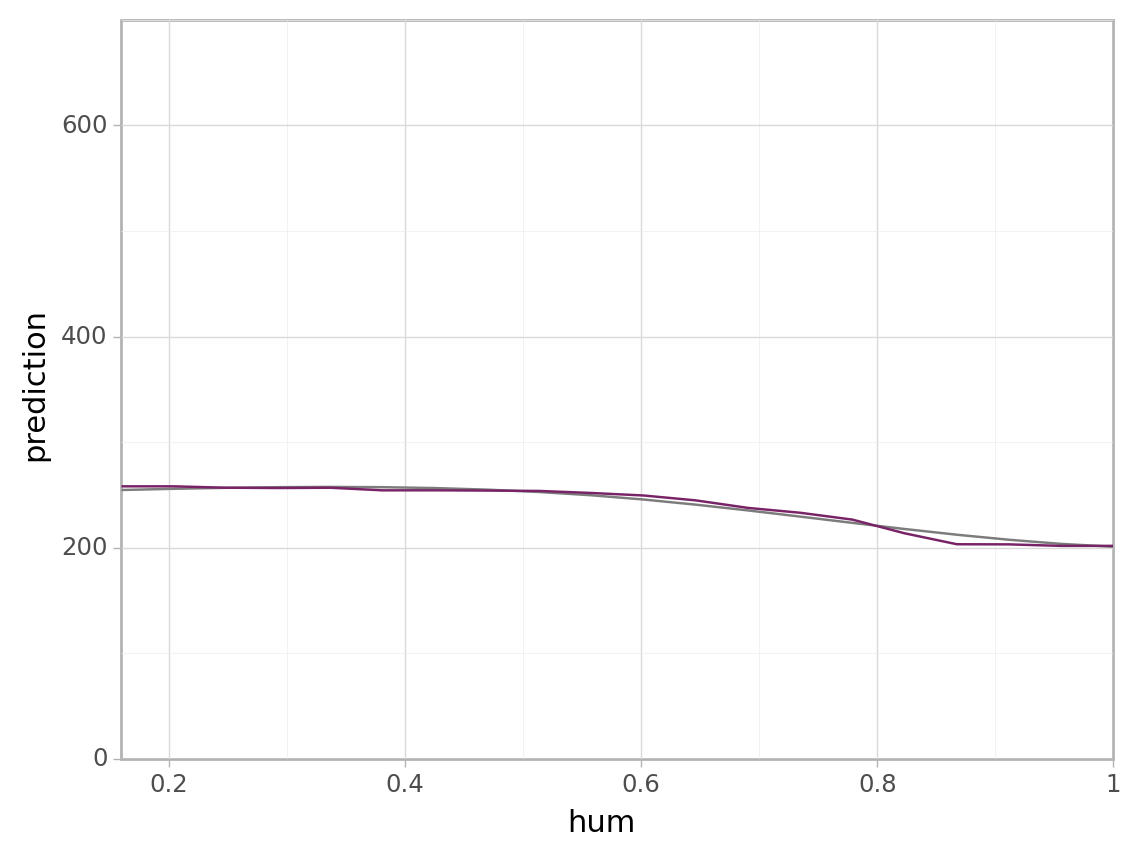

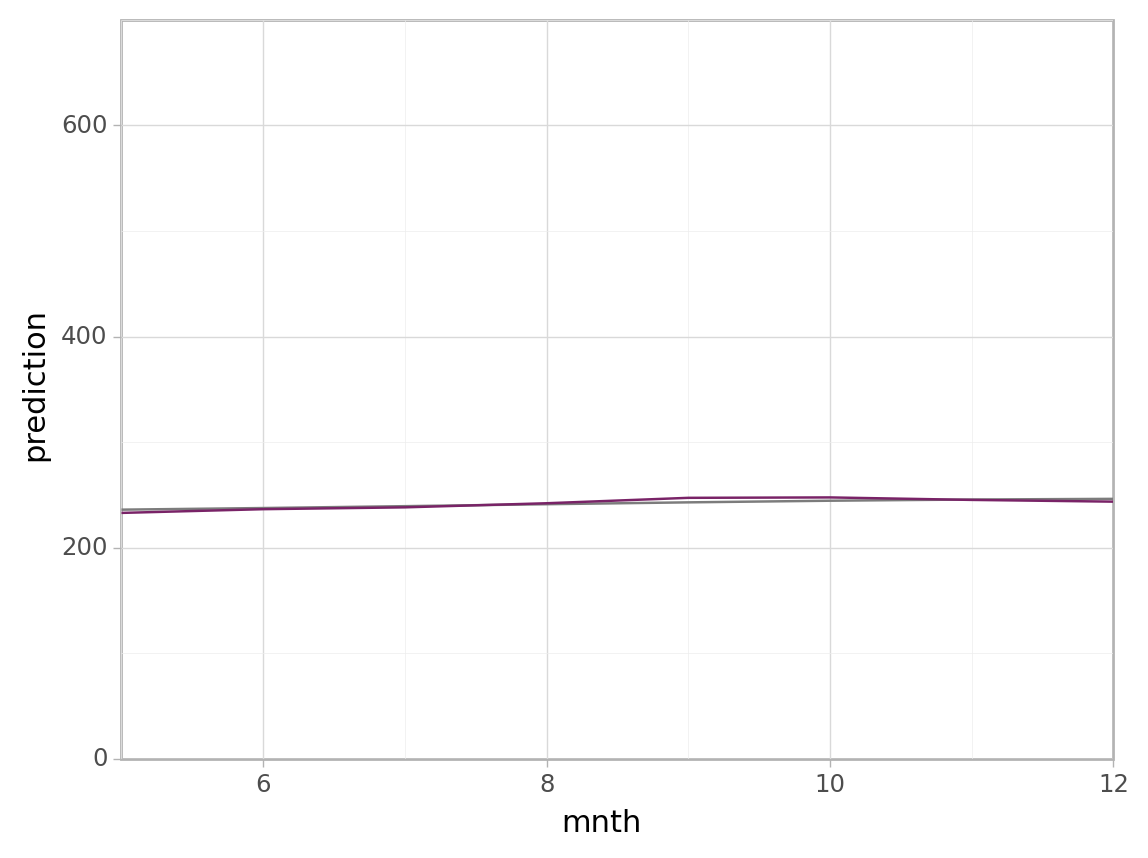

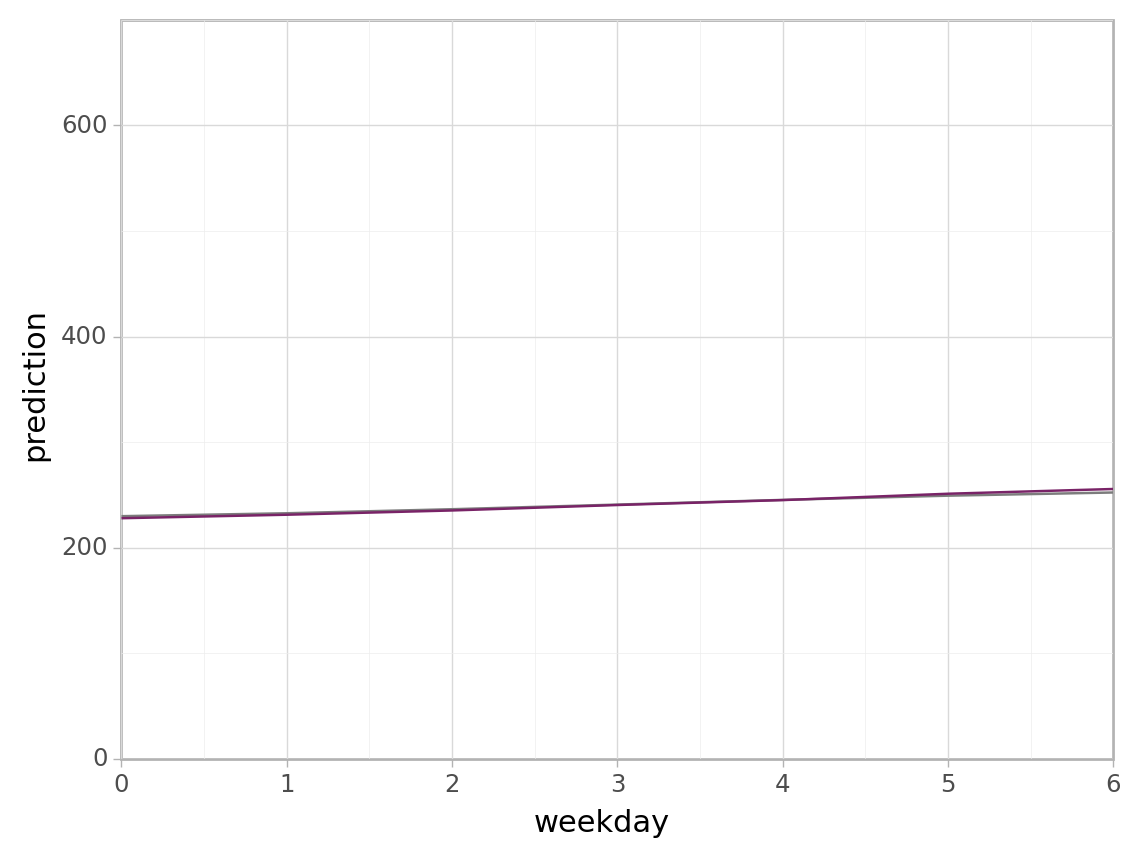

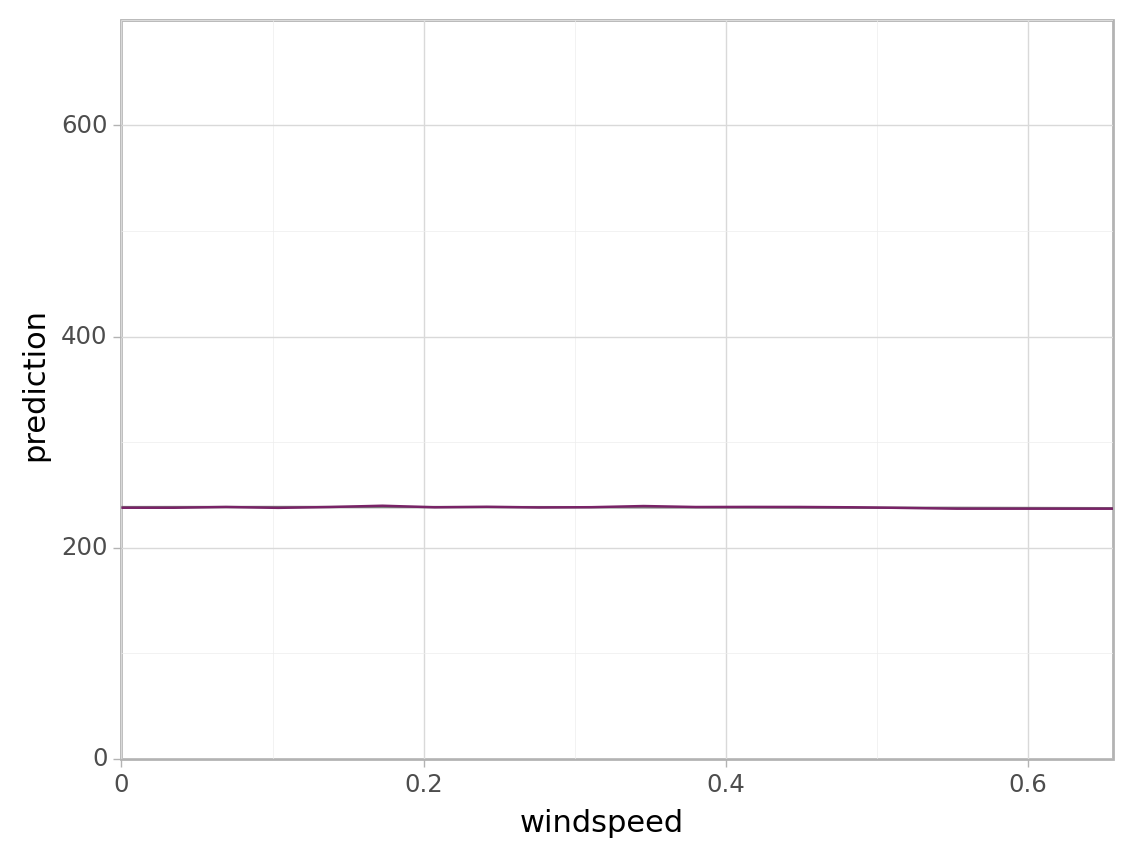

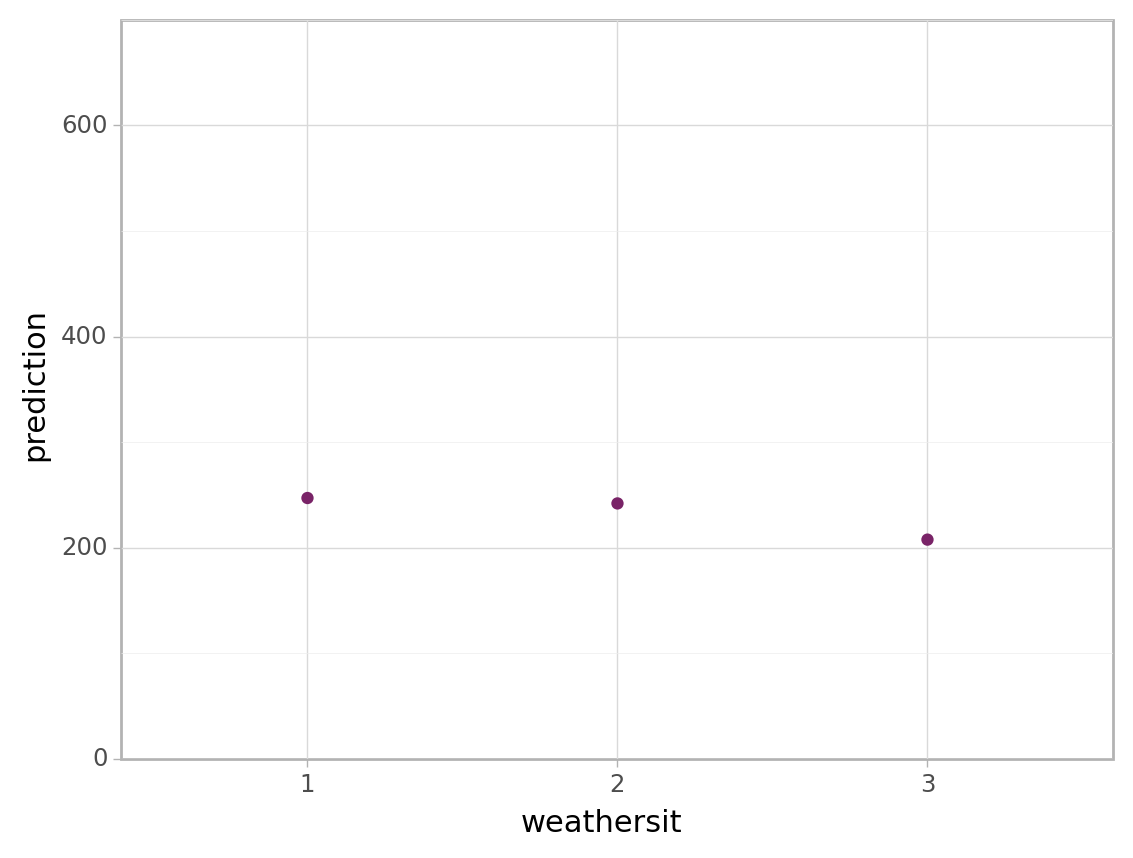

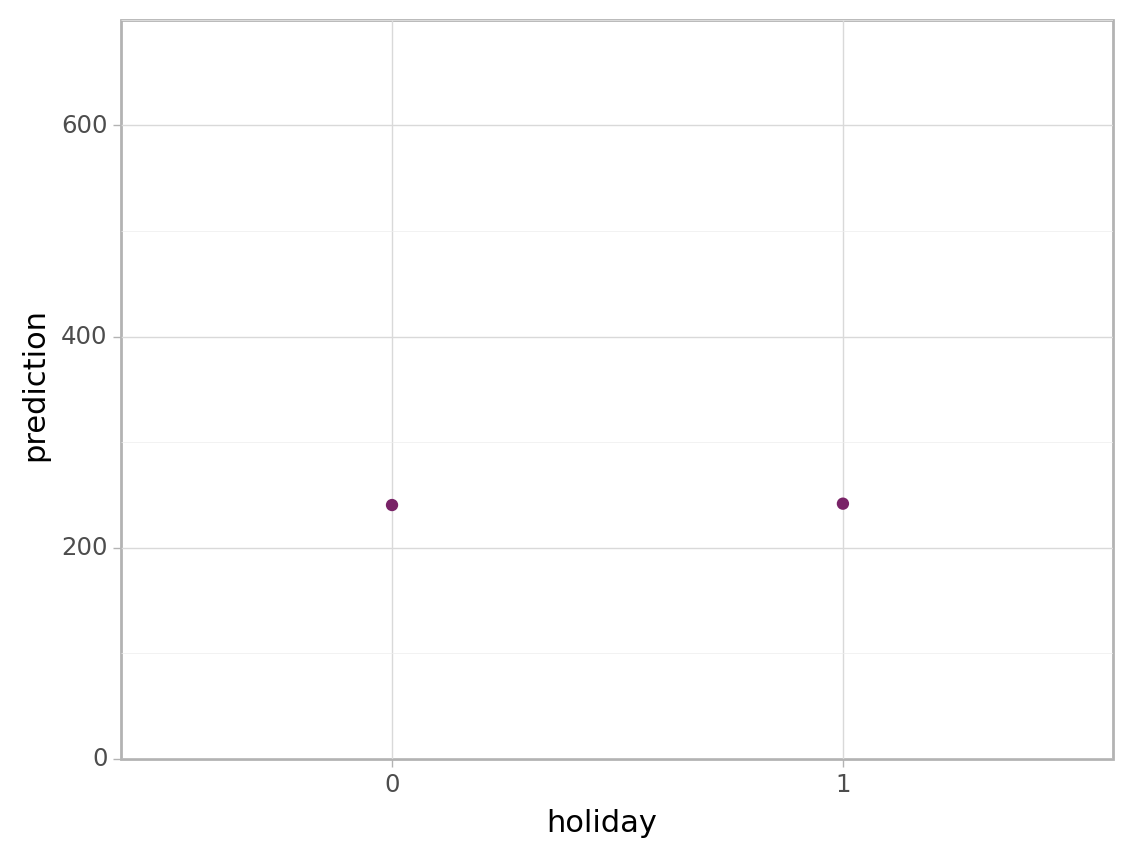

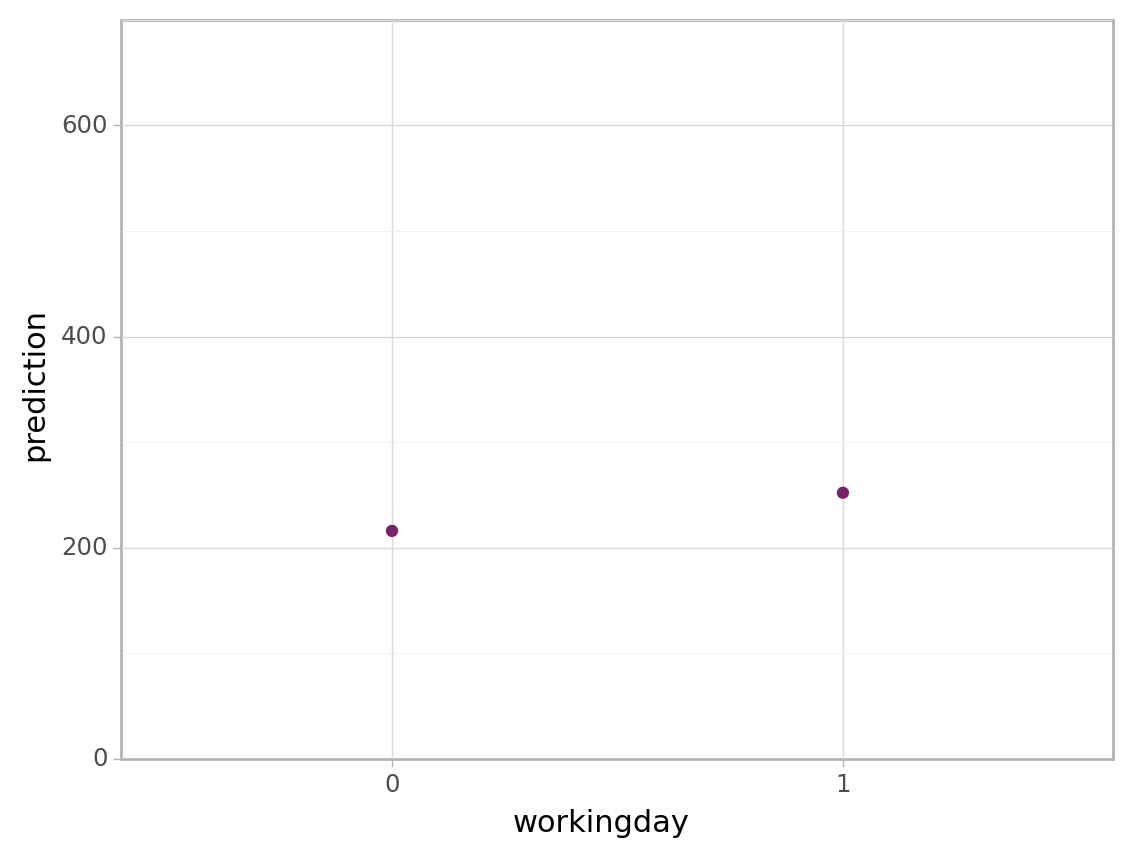

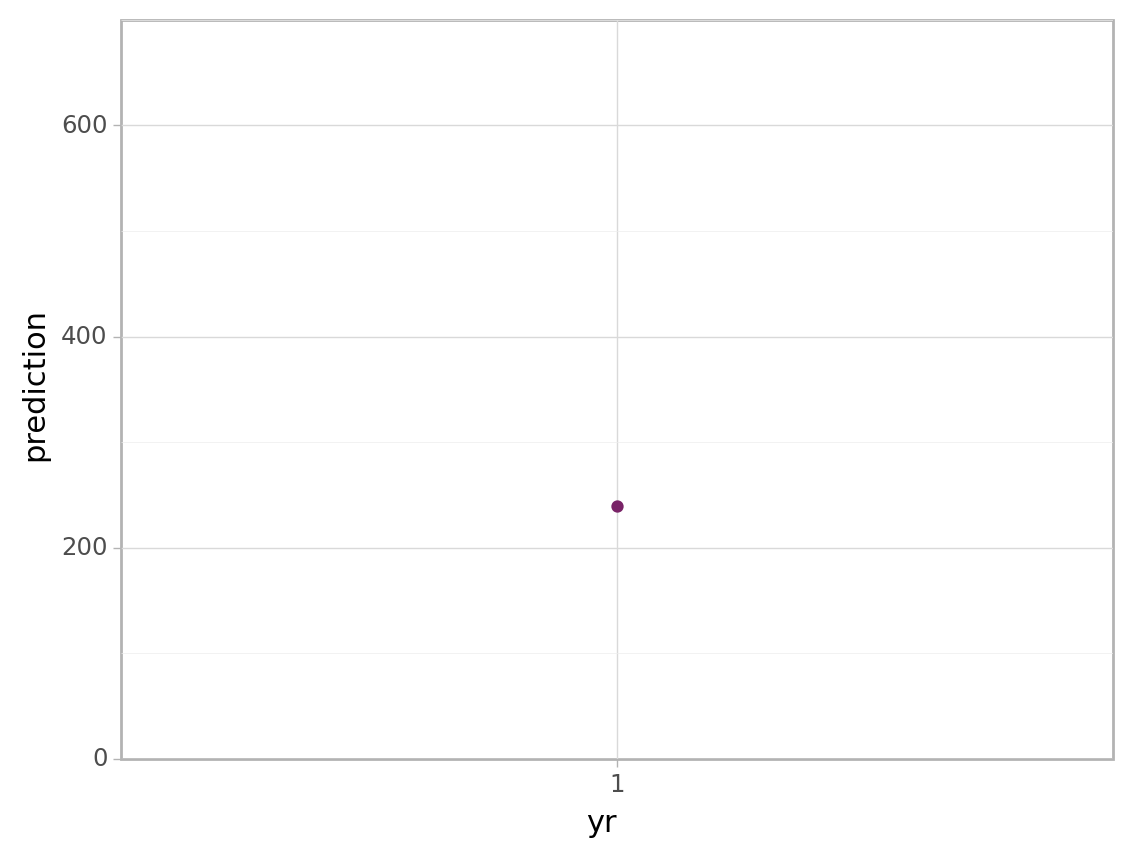

In [14]:
[p.draw() for p in one_way_pdps];

/Users/Dan/anaconda3/envs/pdpexplorer/lib/python3.10/site-packages/plotnine/ggplot.py:365: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


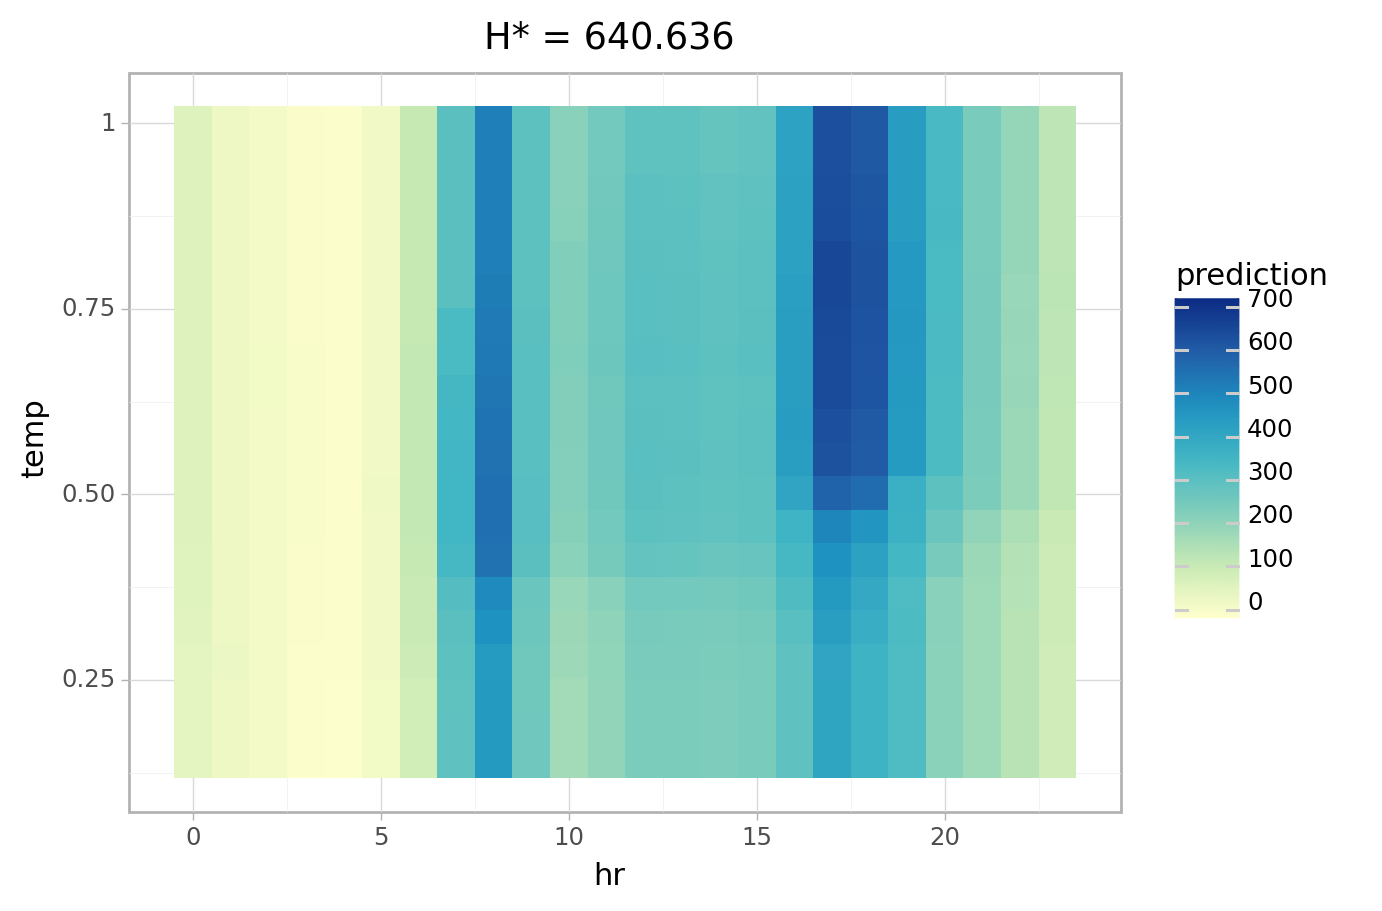

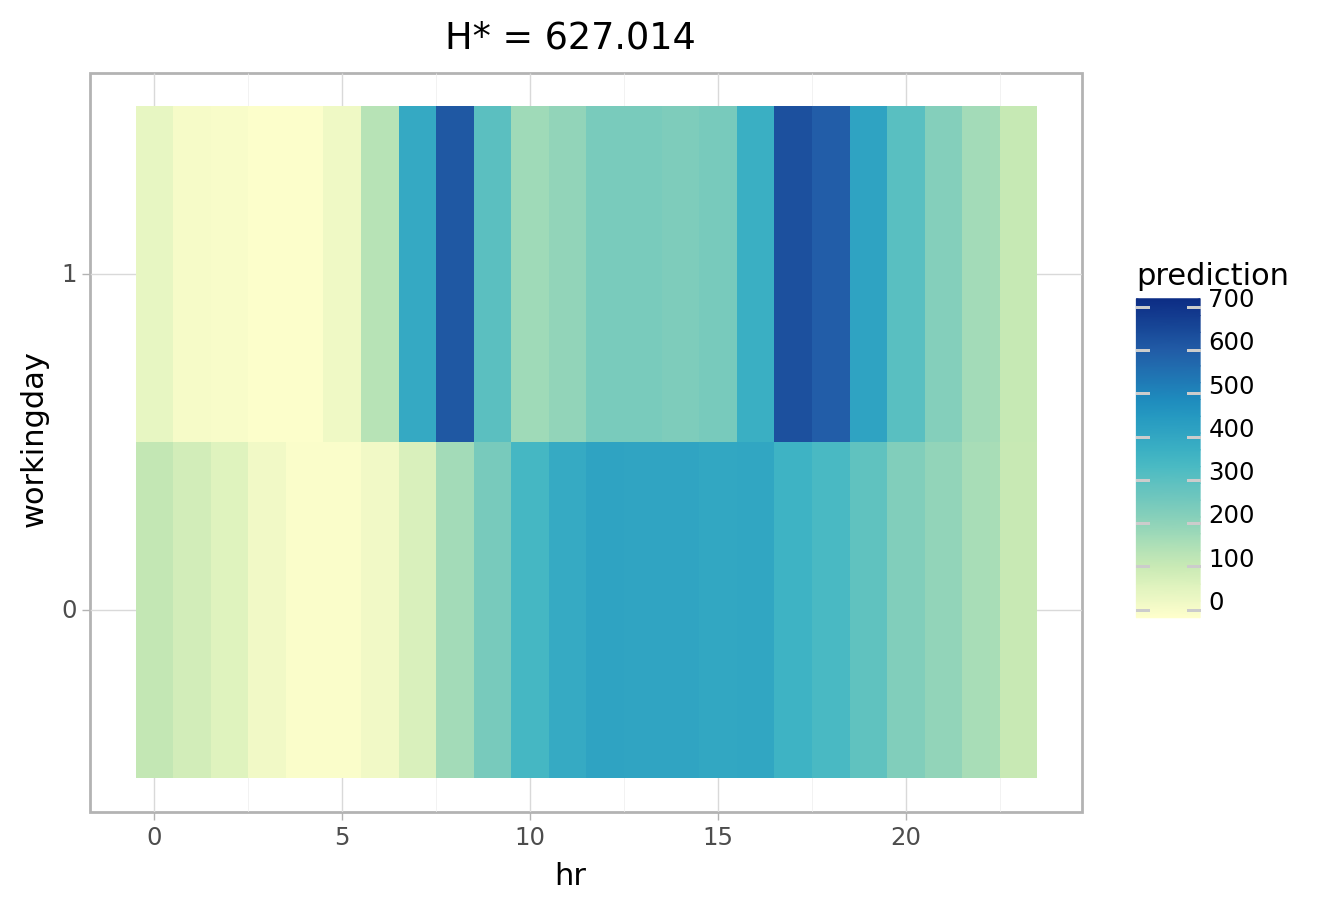

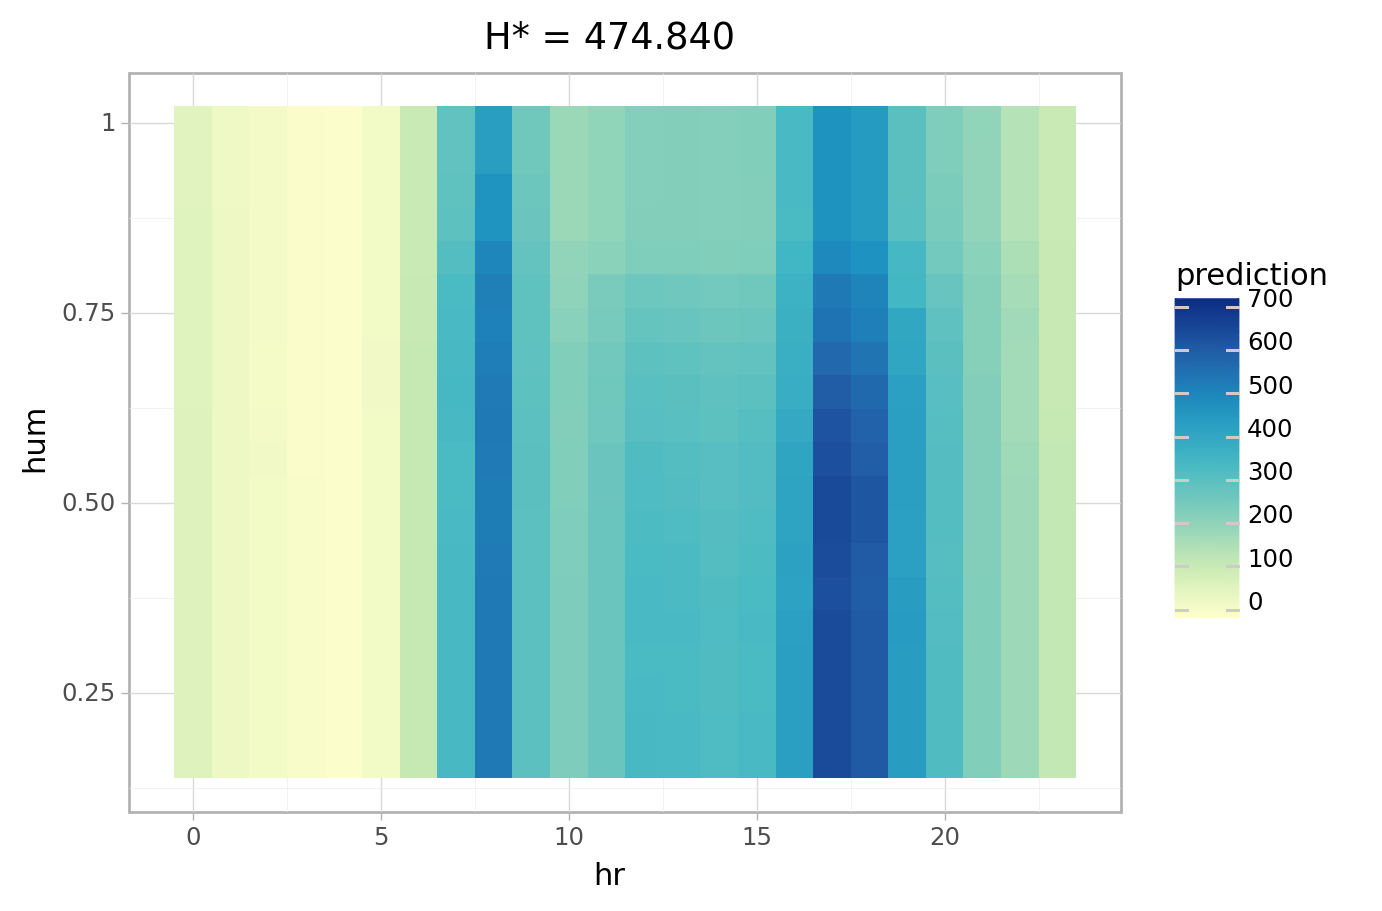

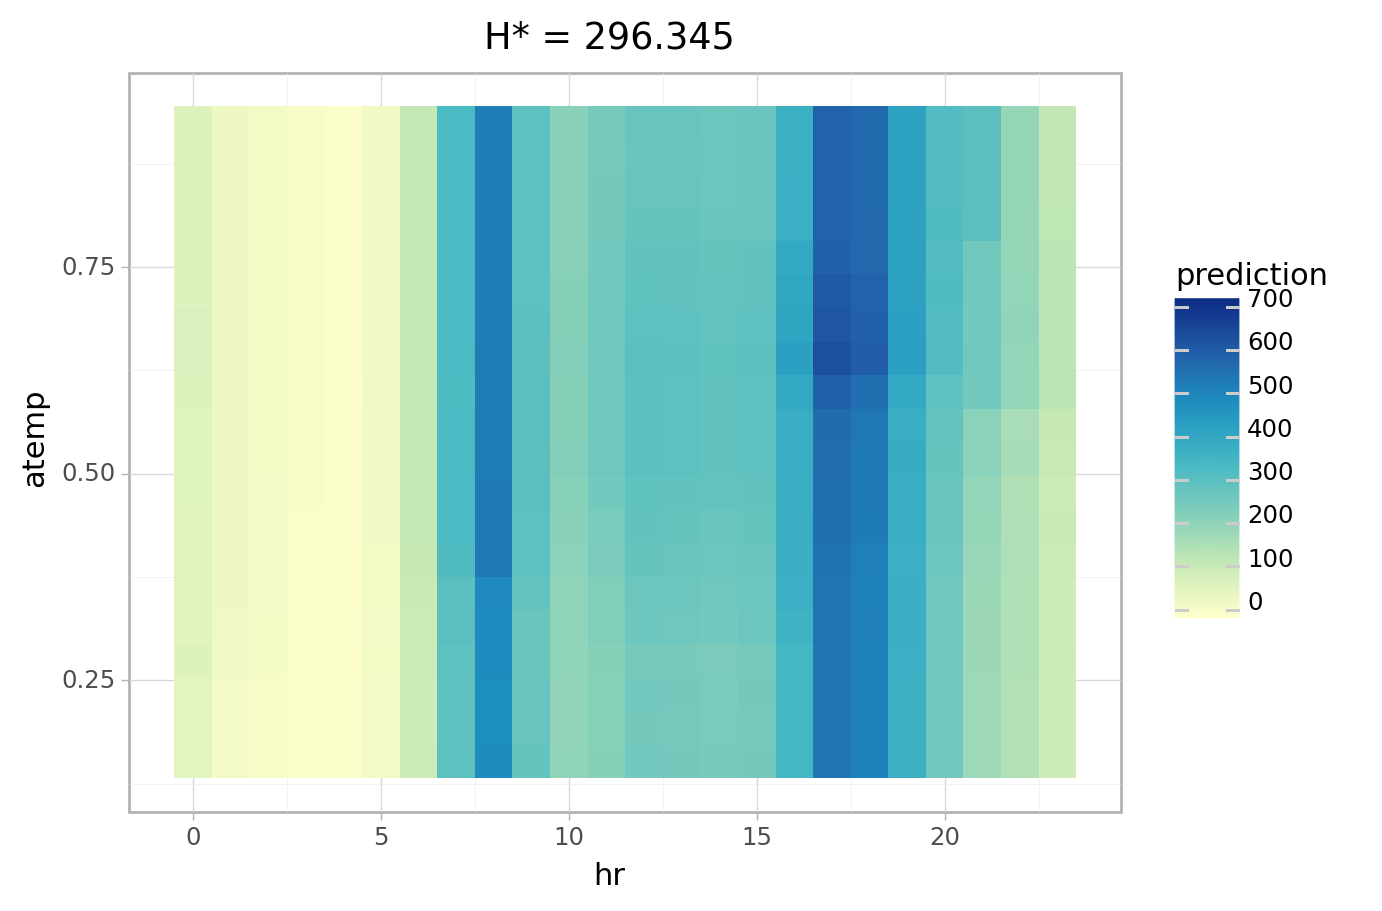

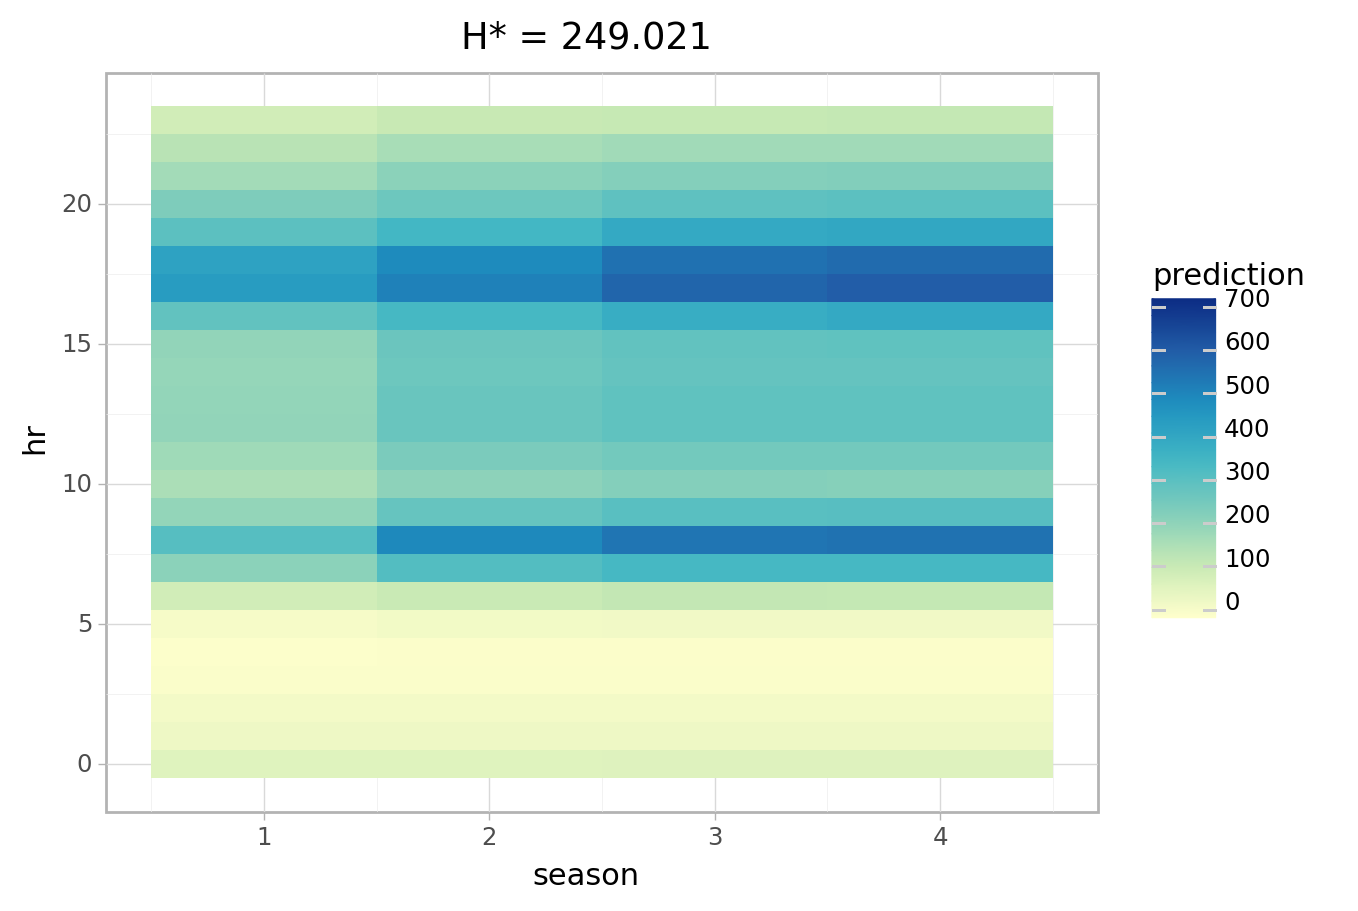

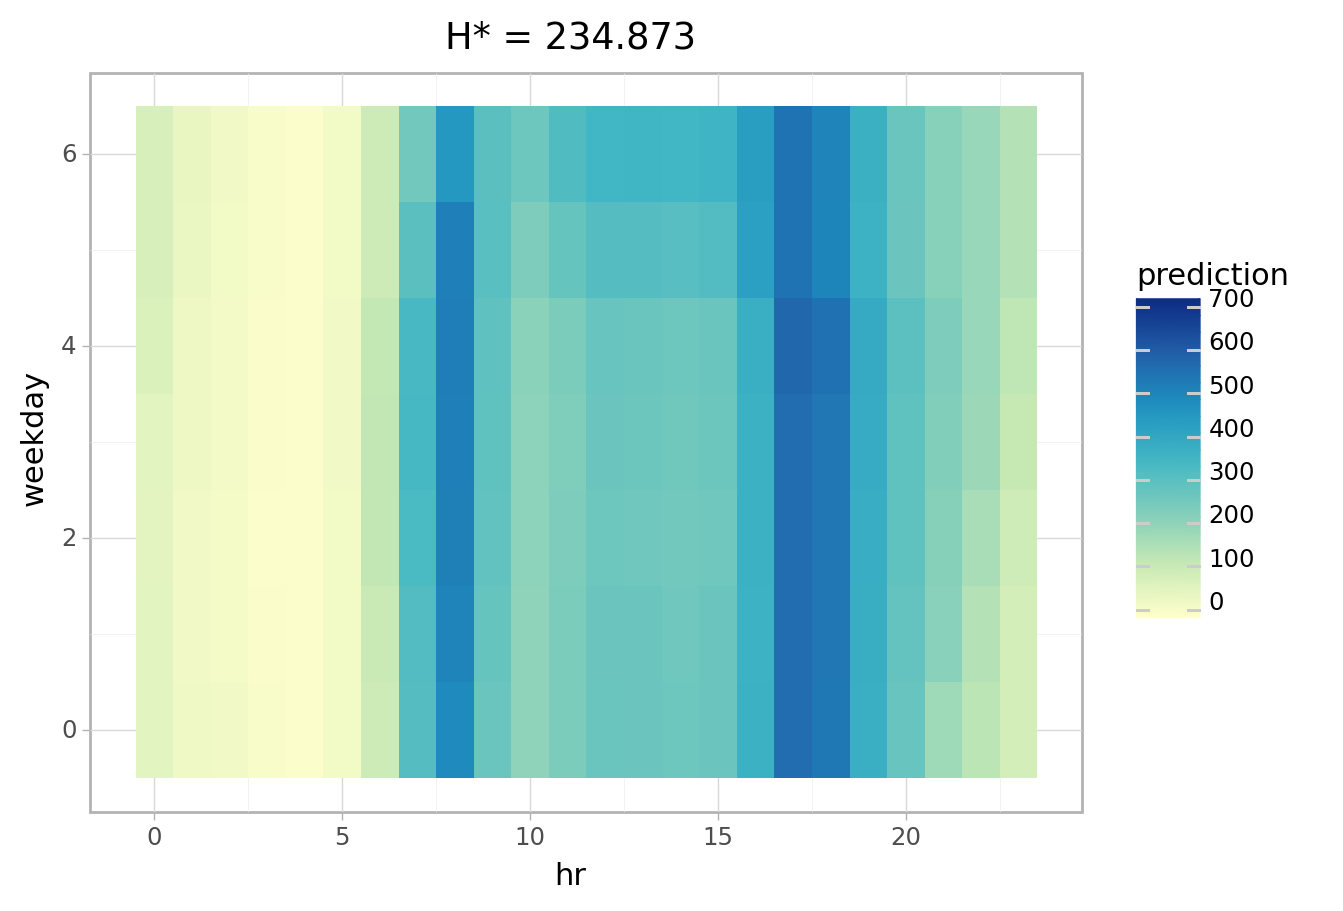

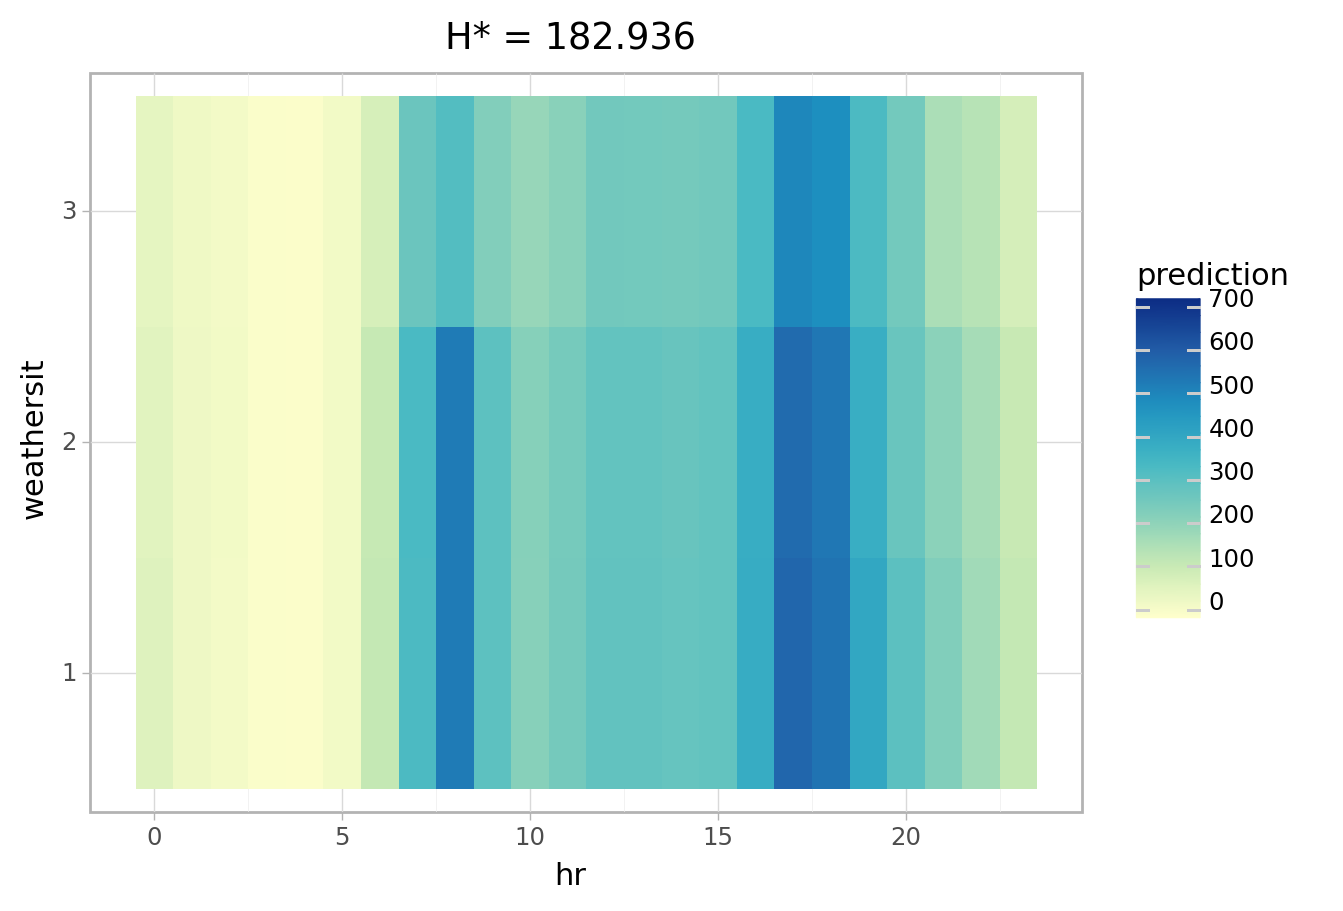

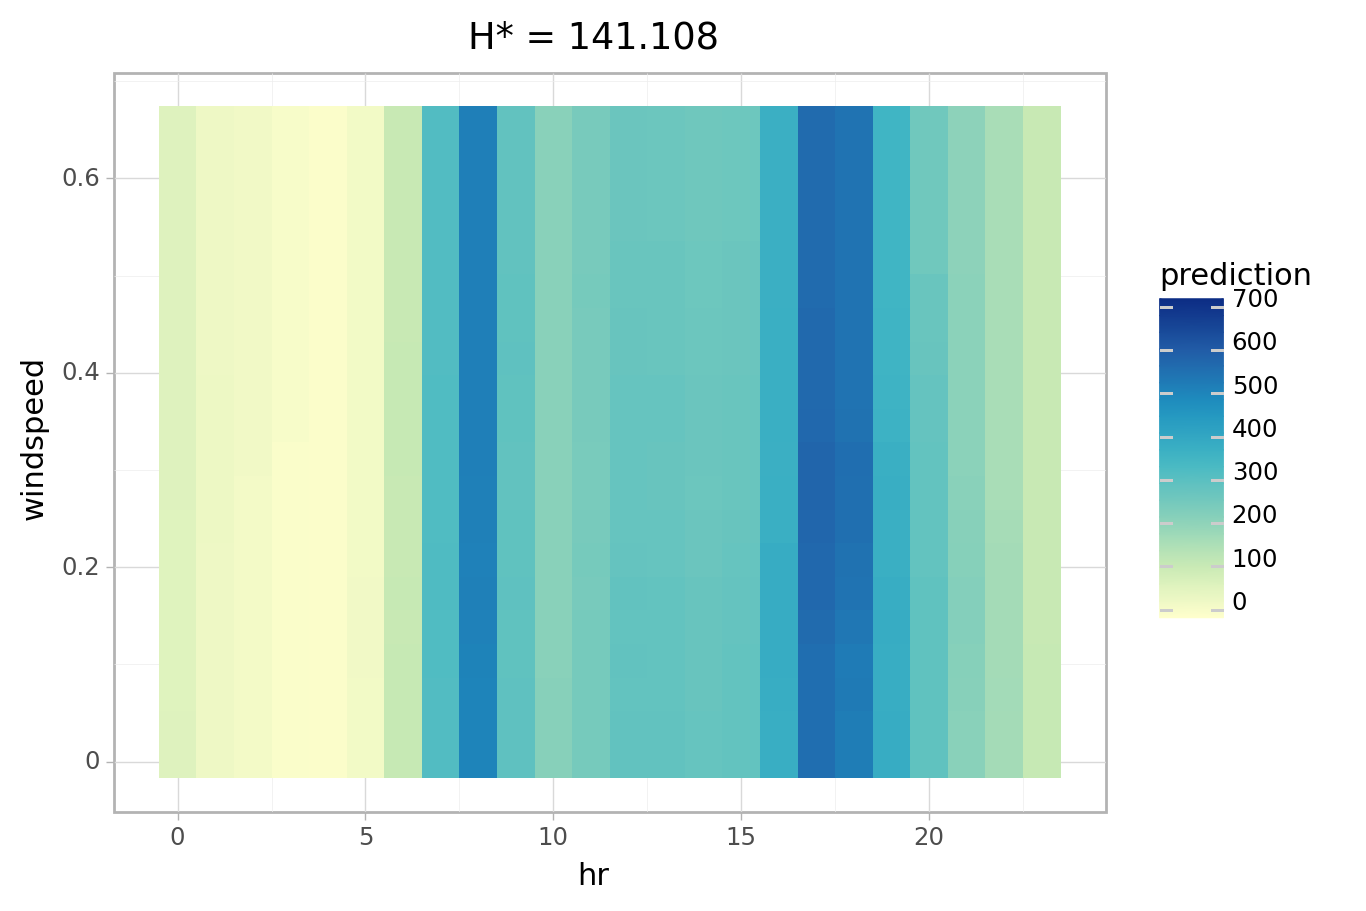

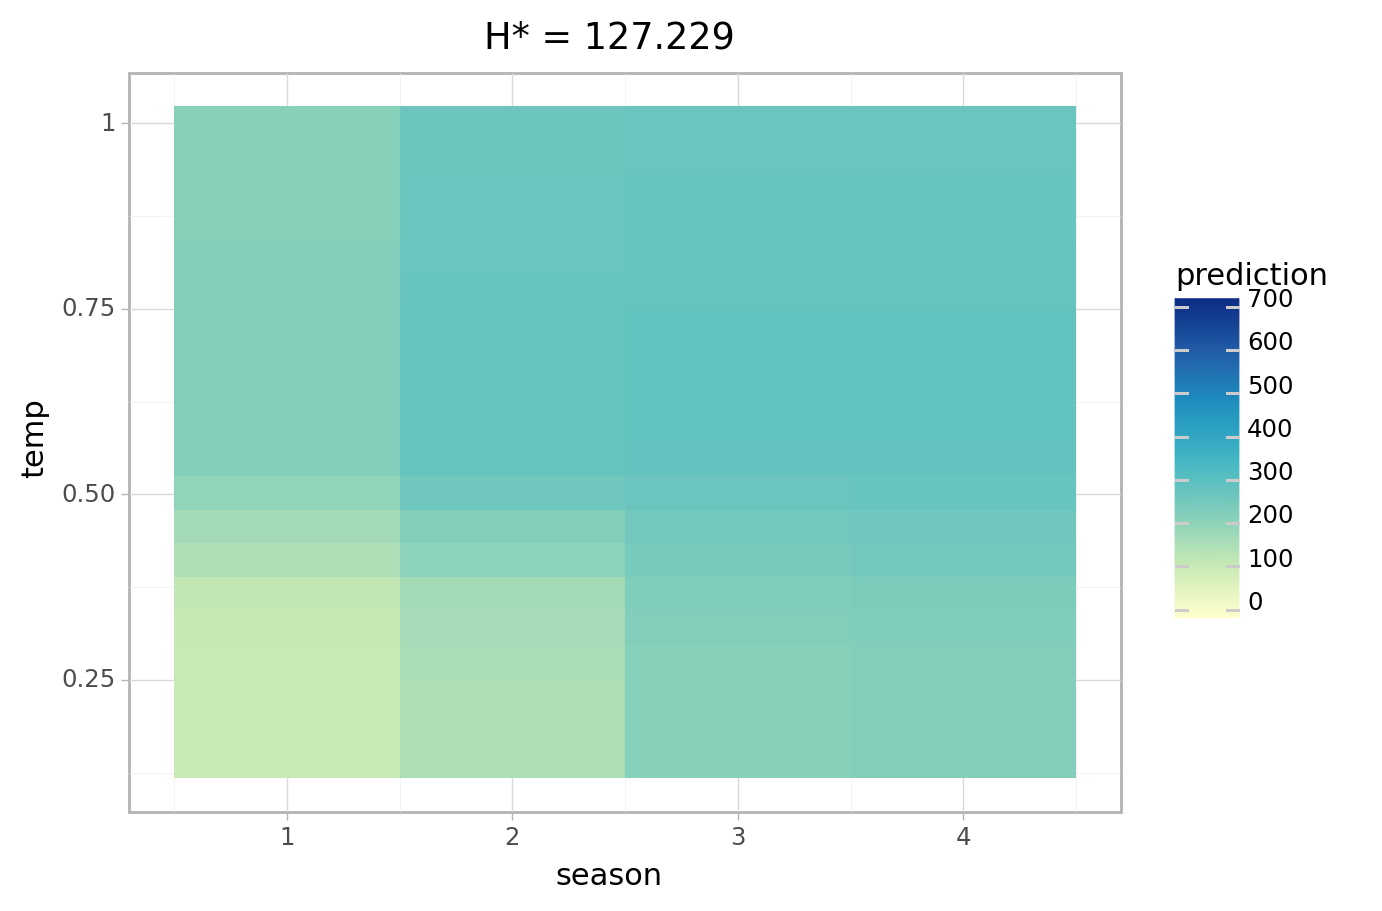

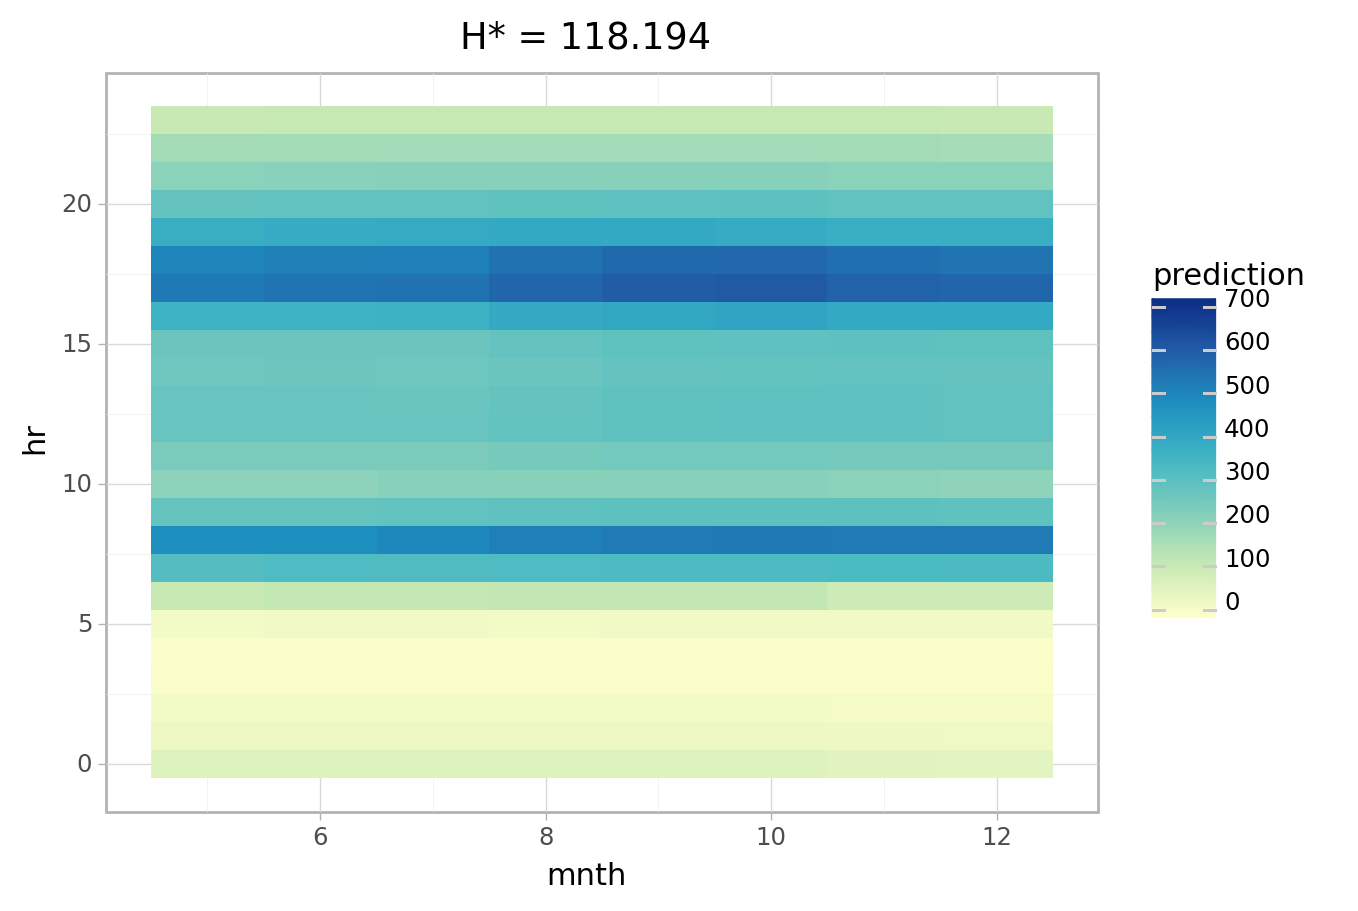

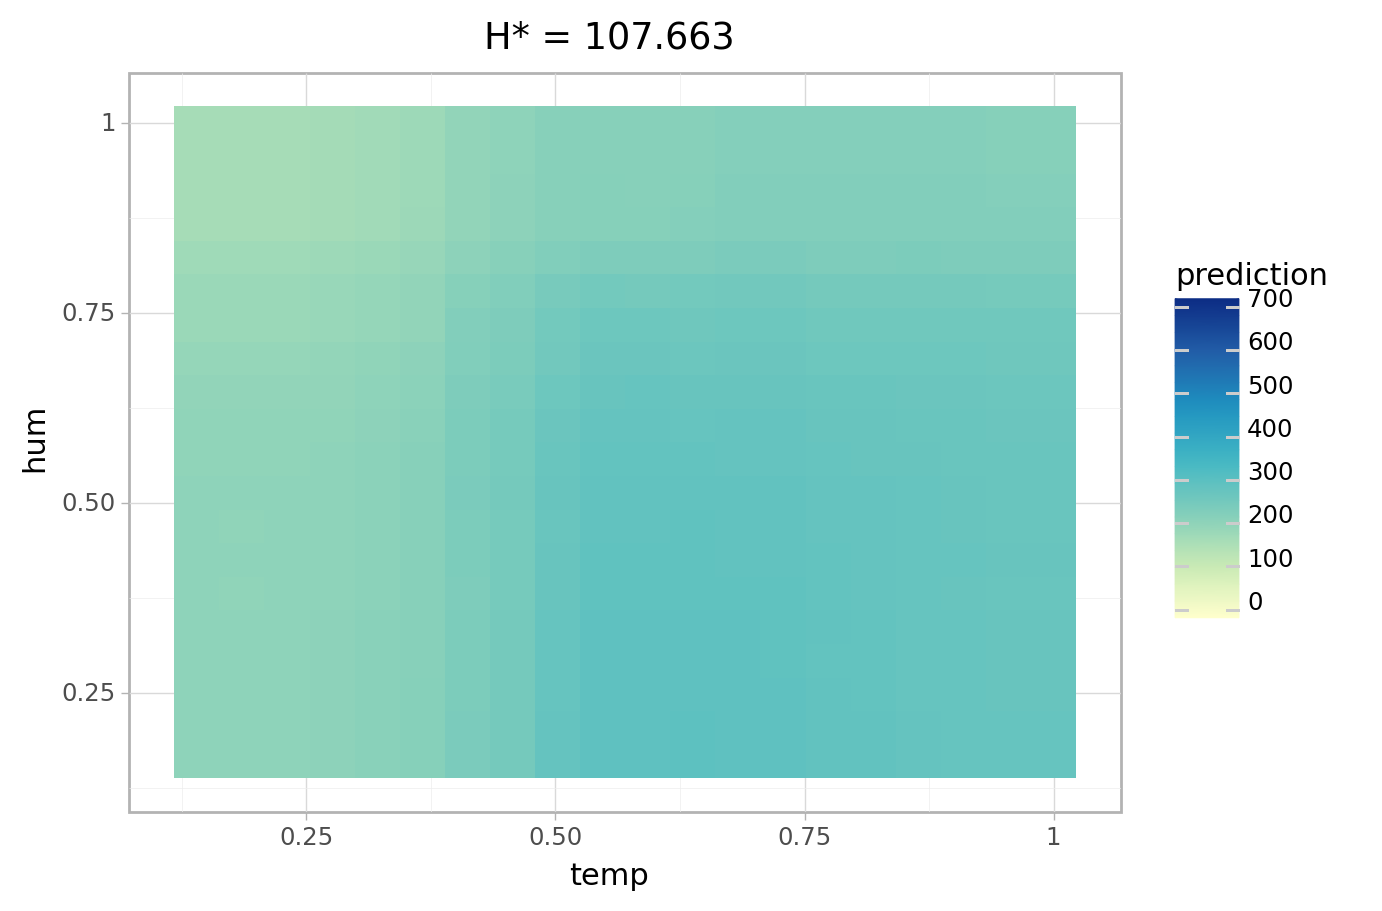

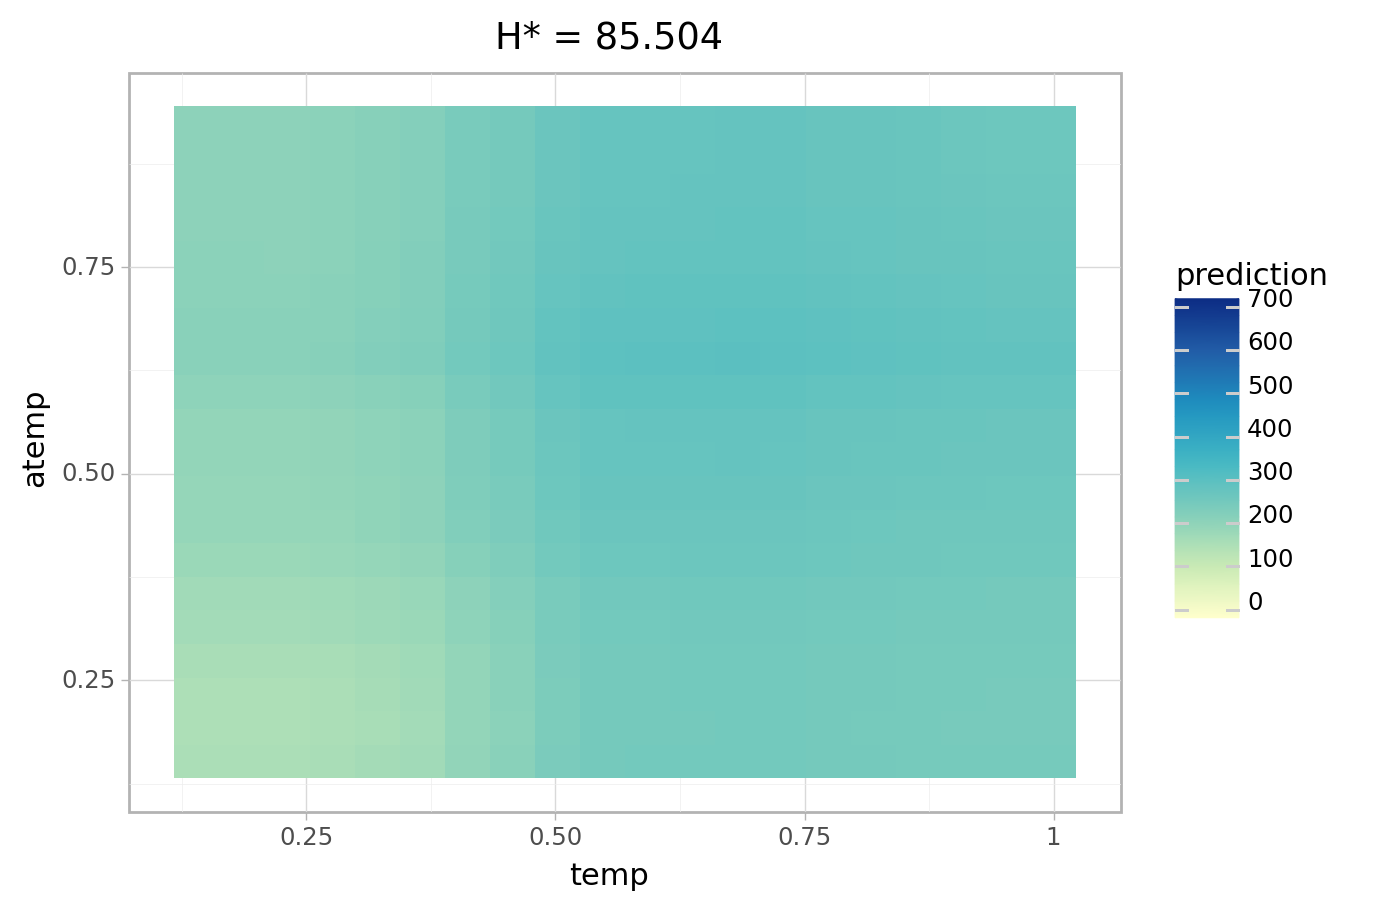

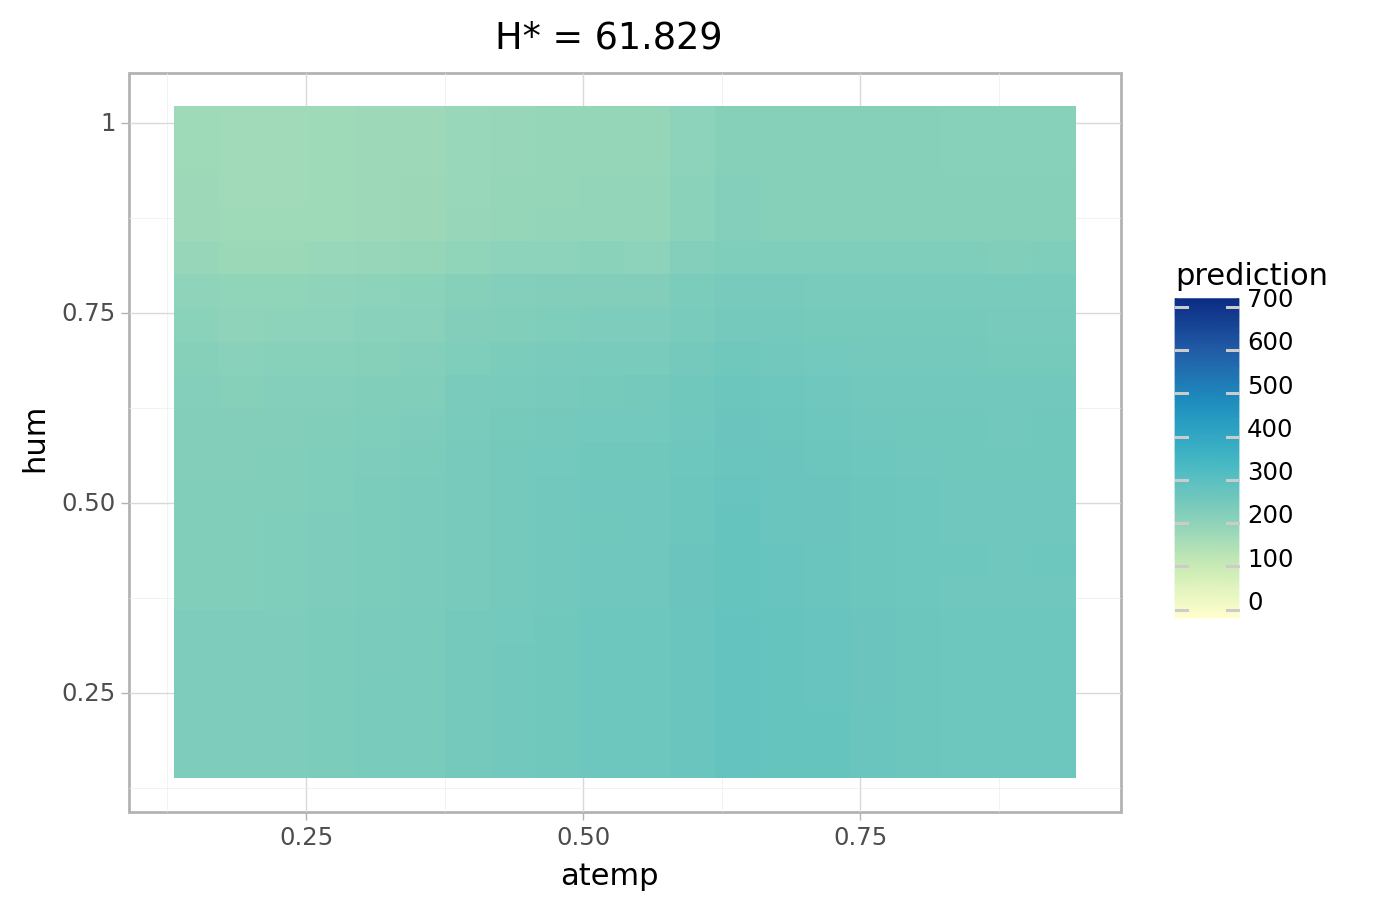

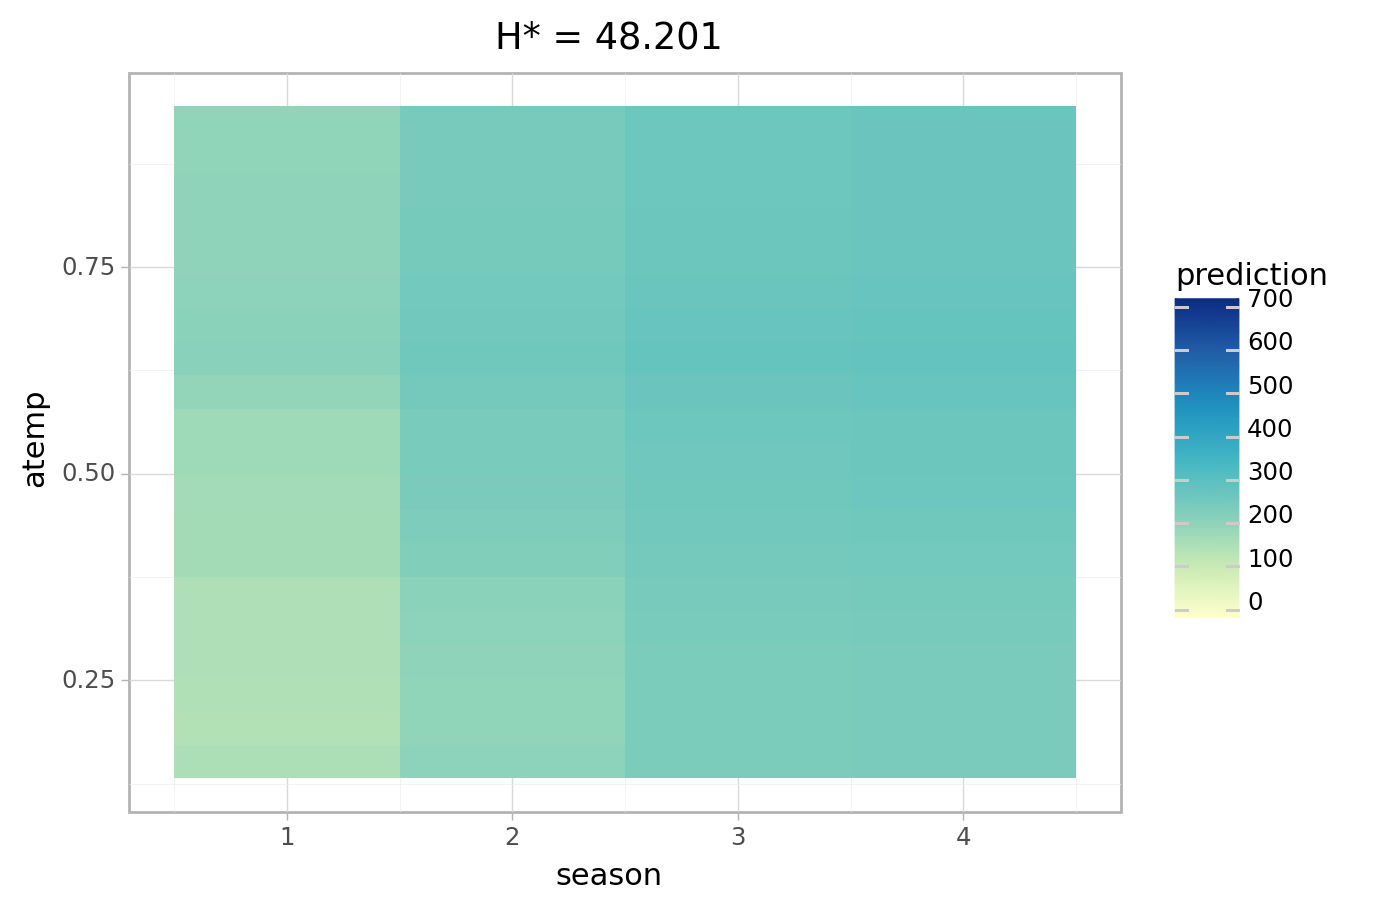

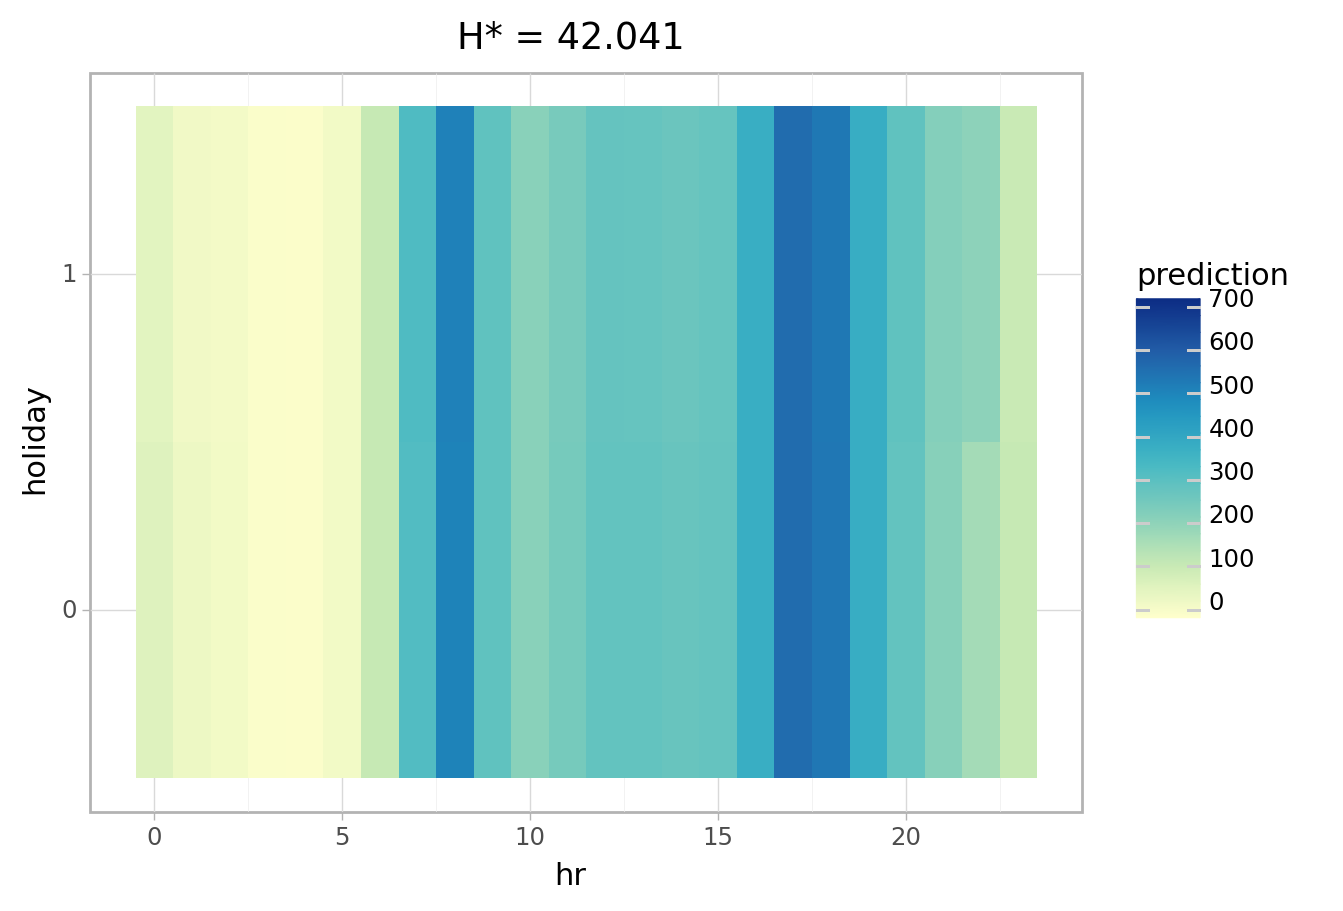

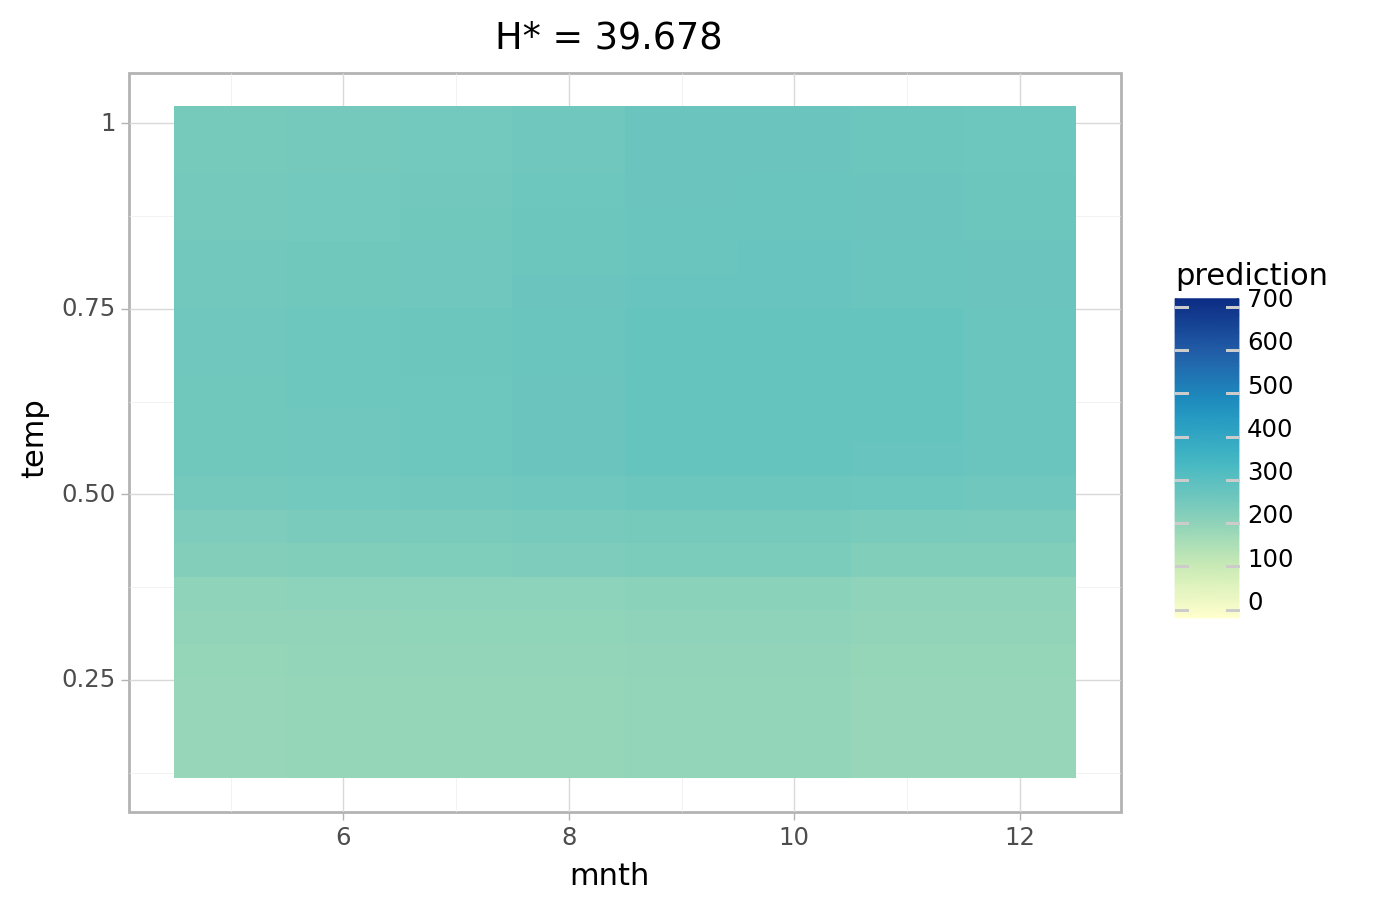

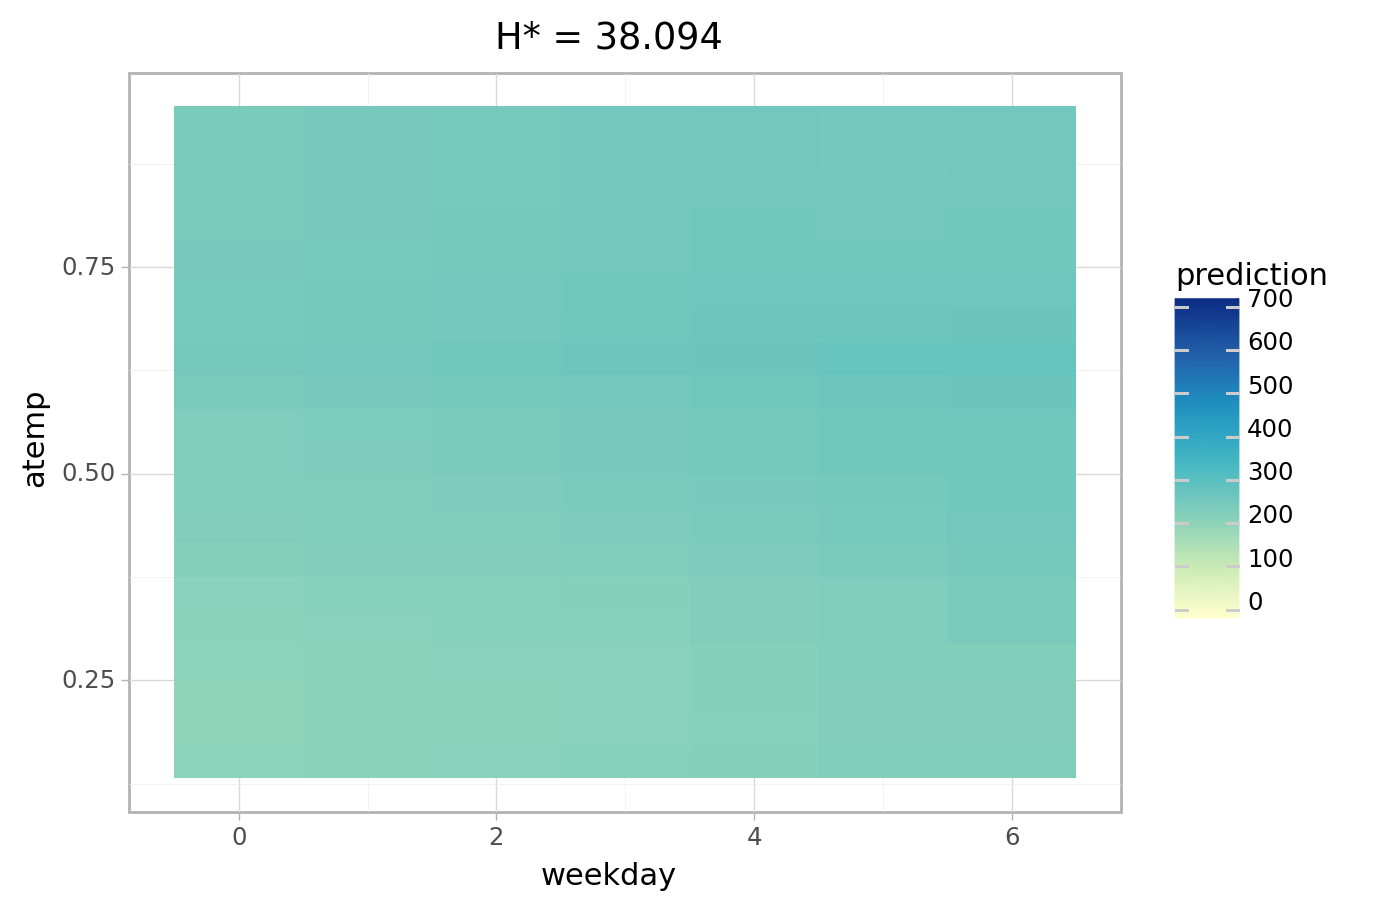

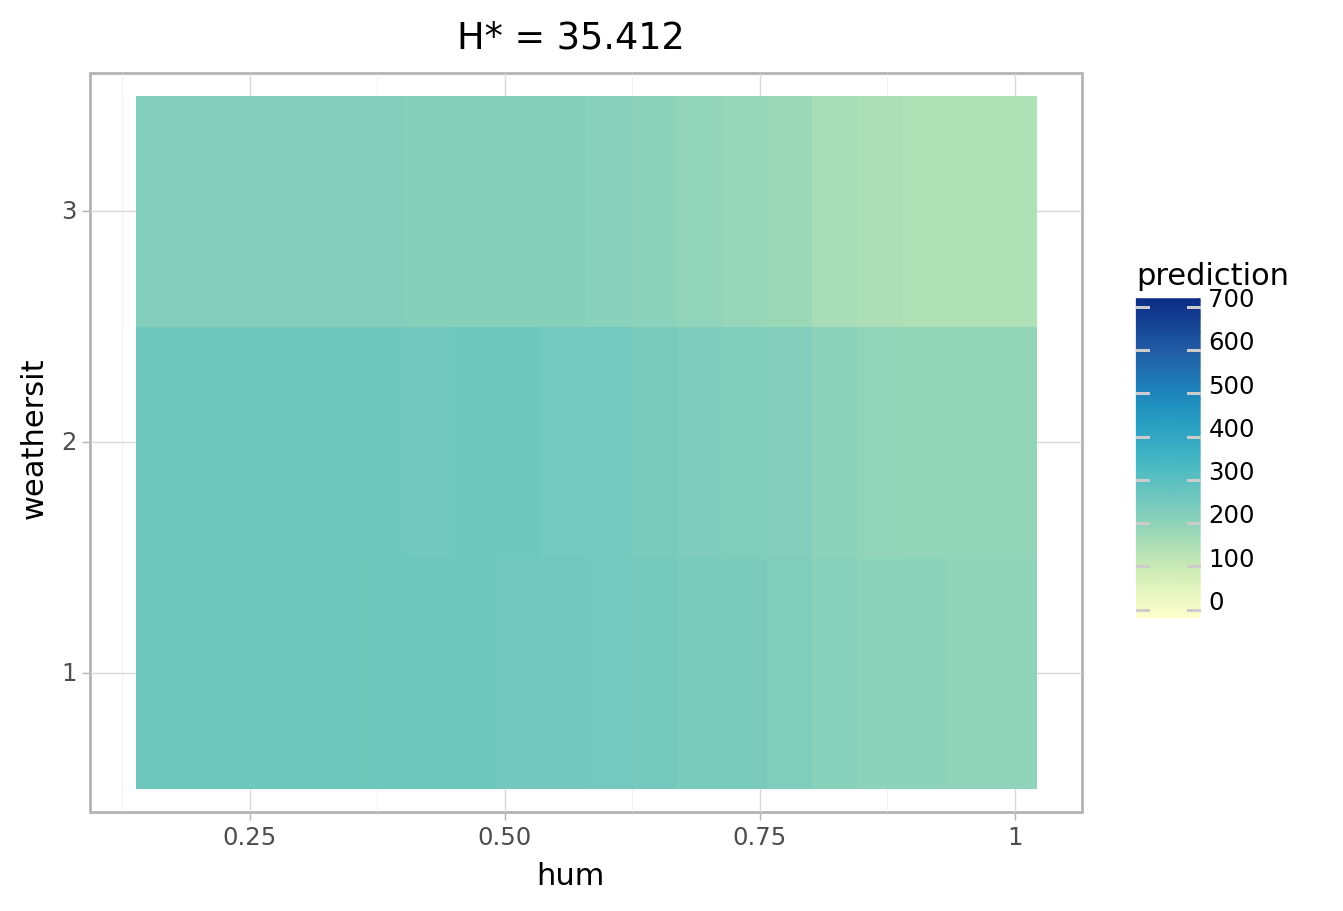

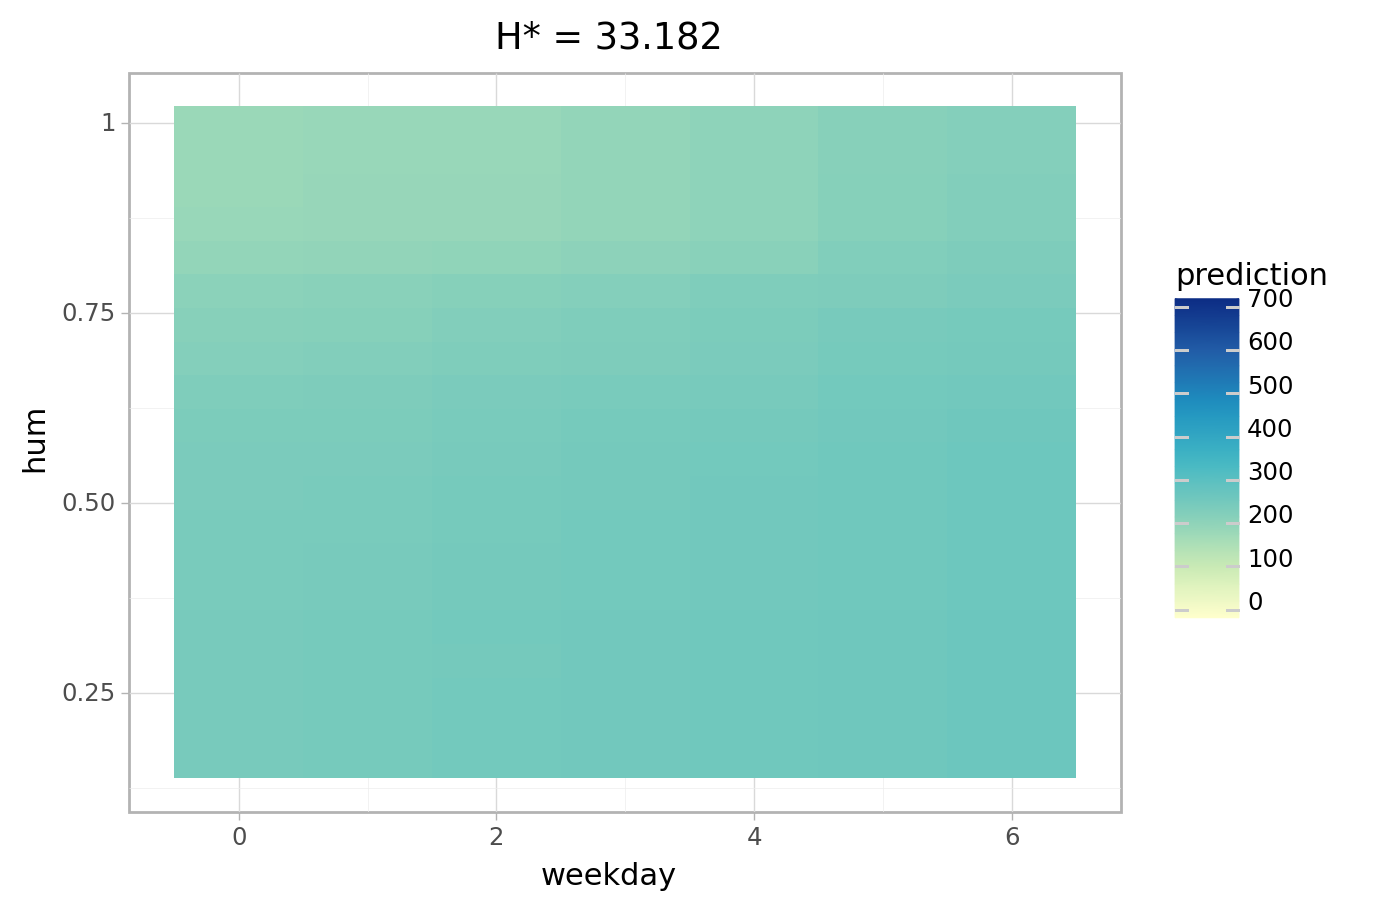

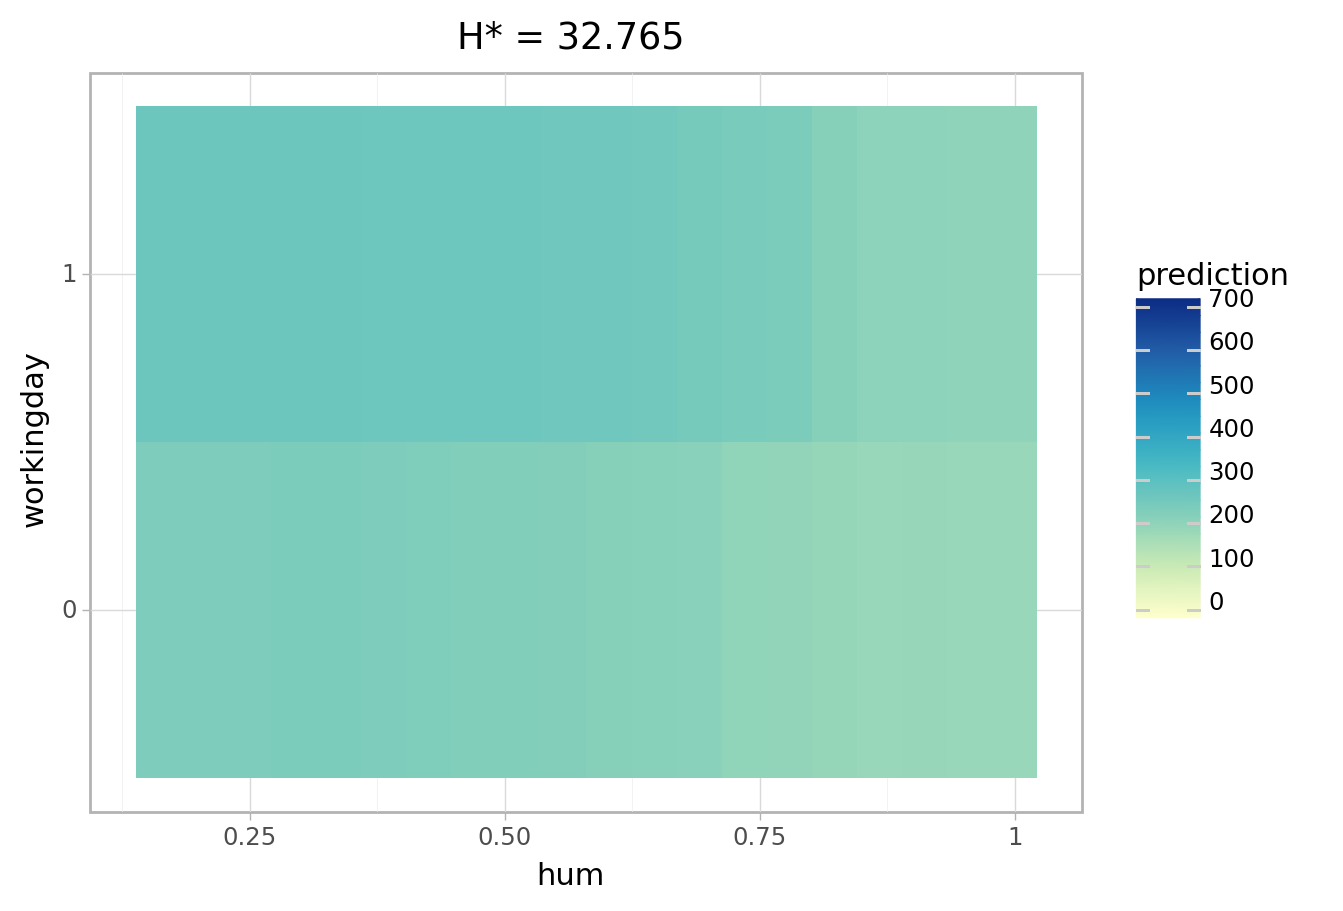

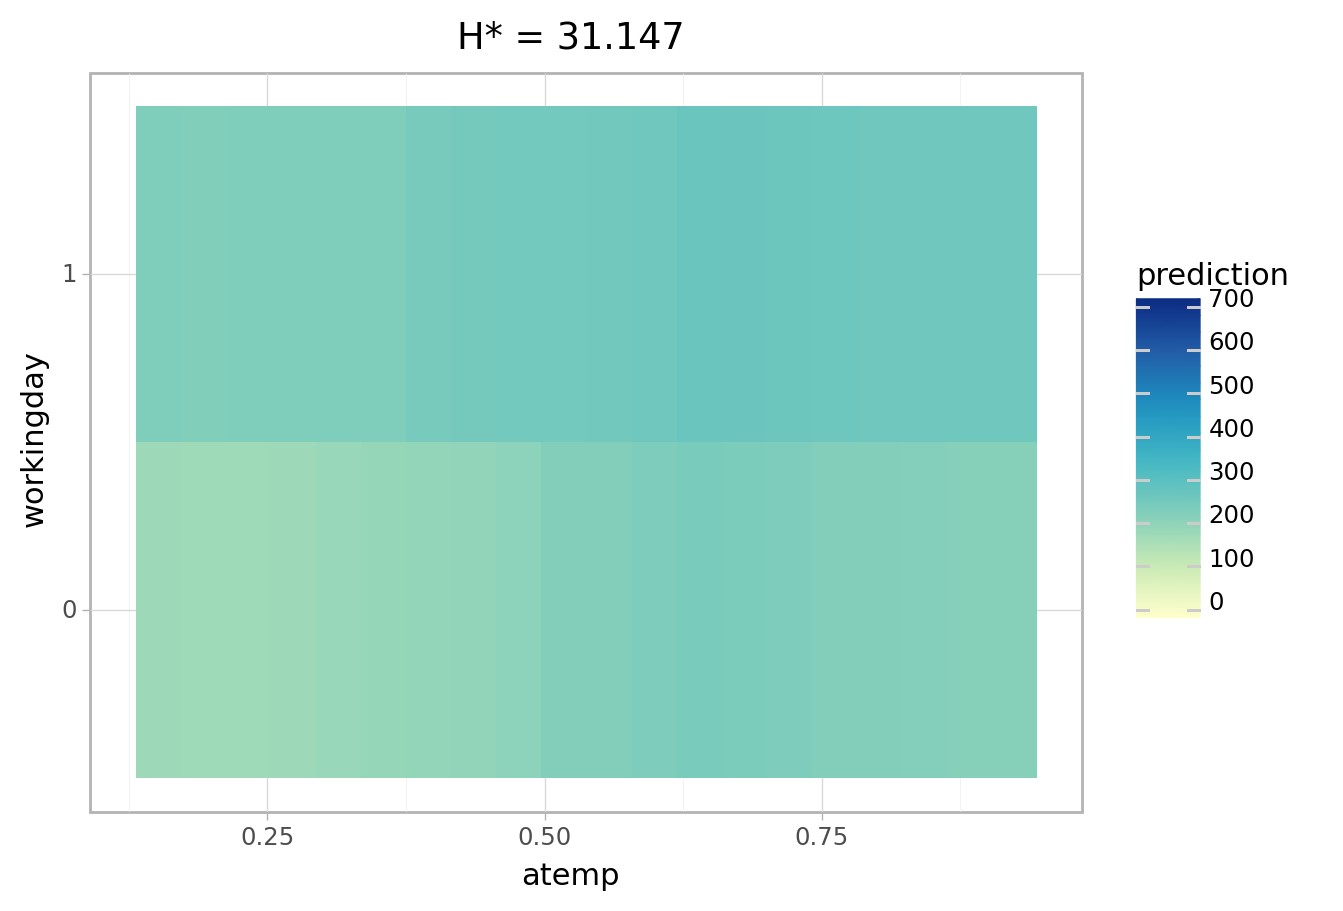

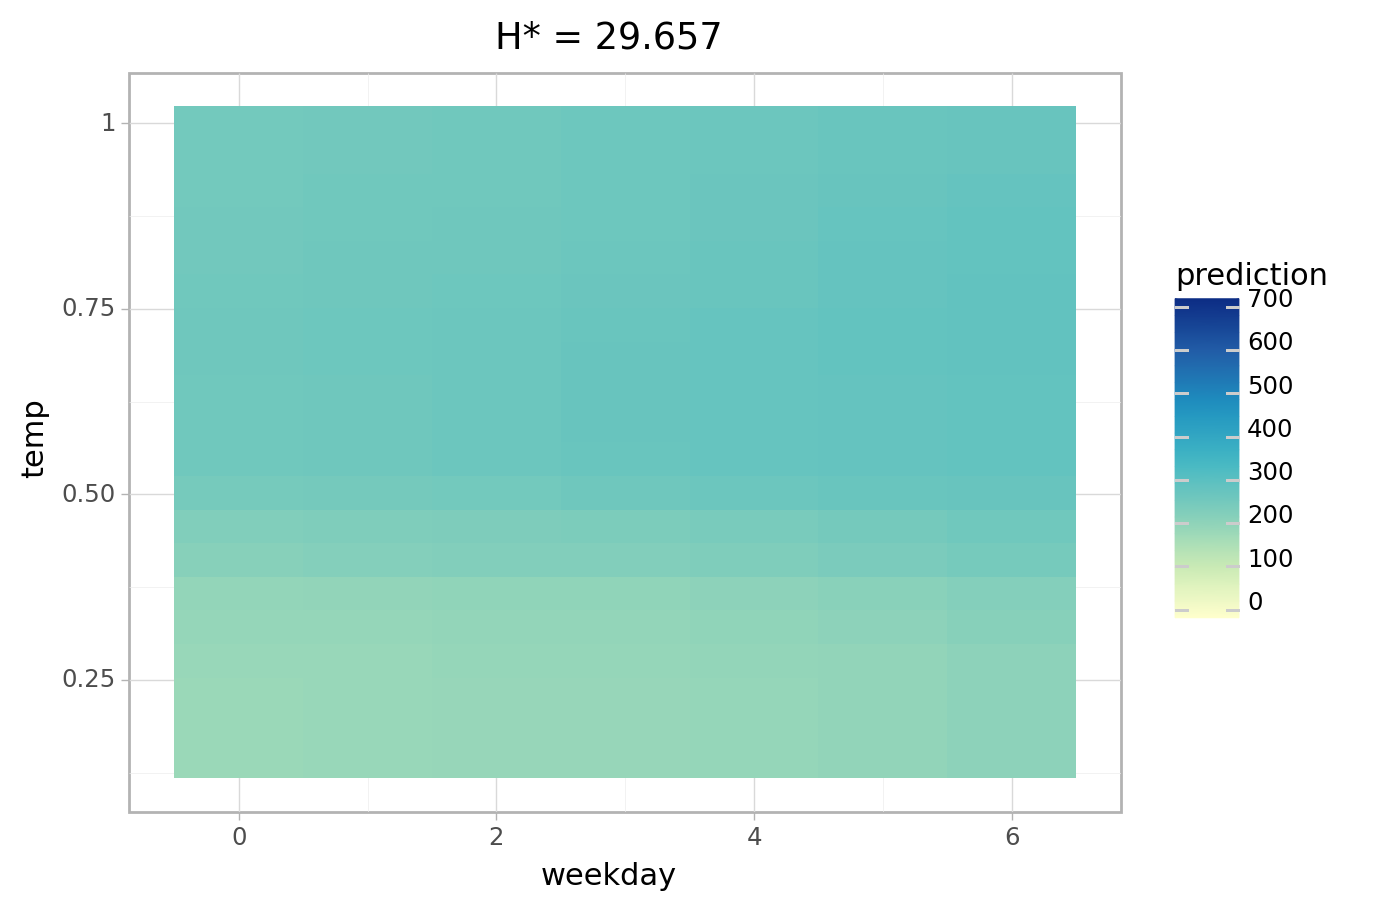

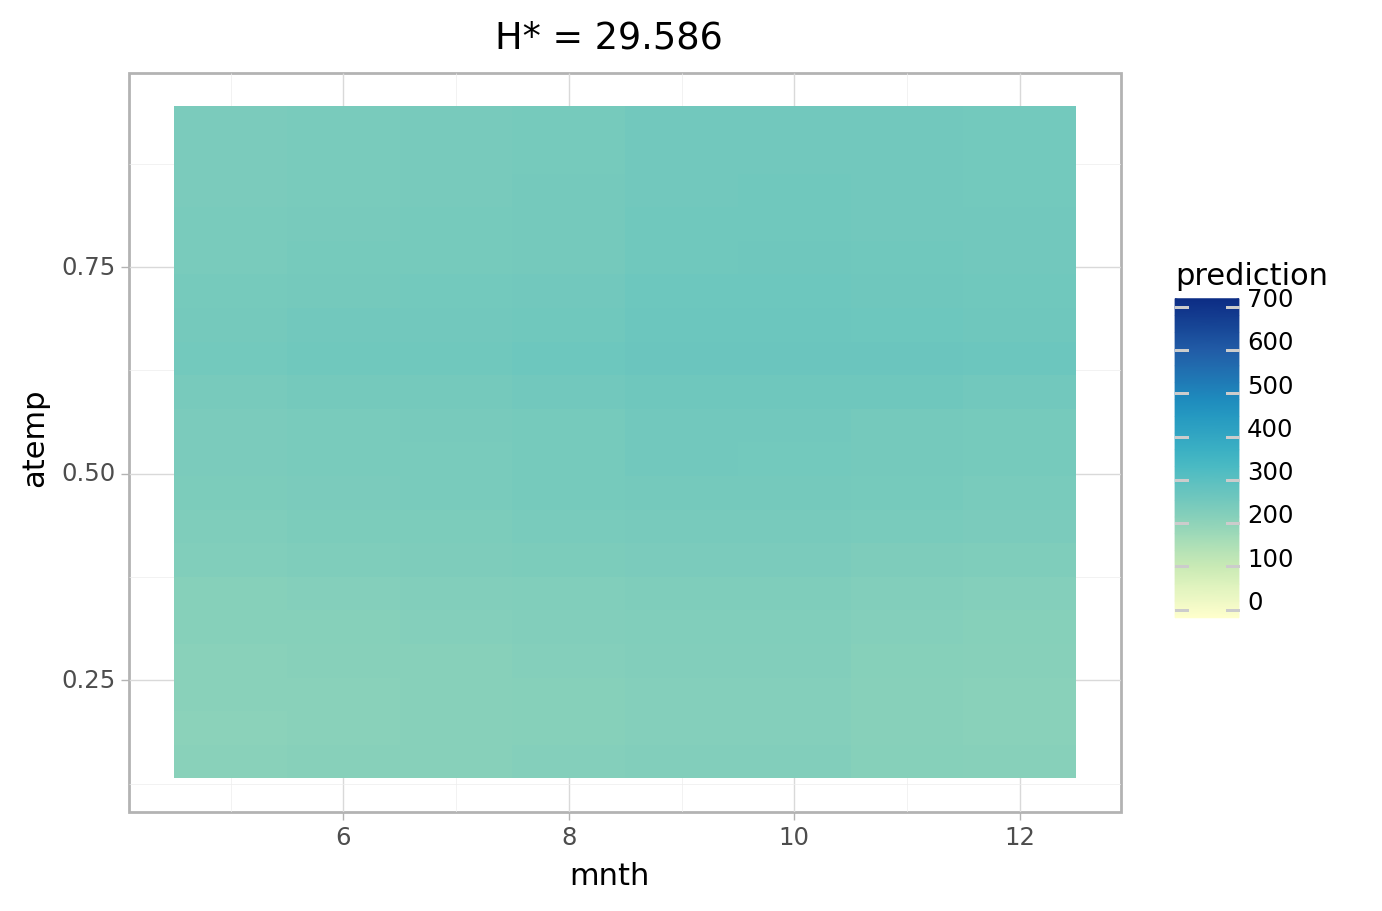

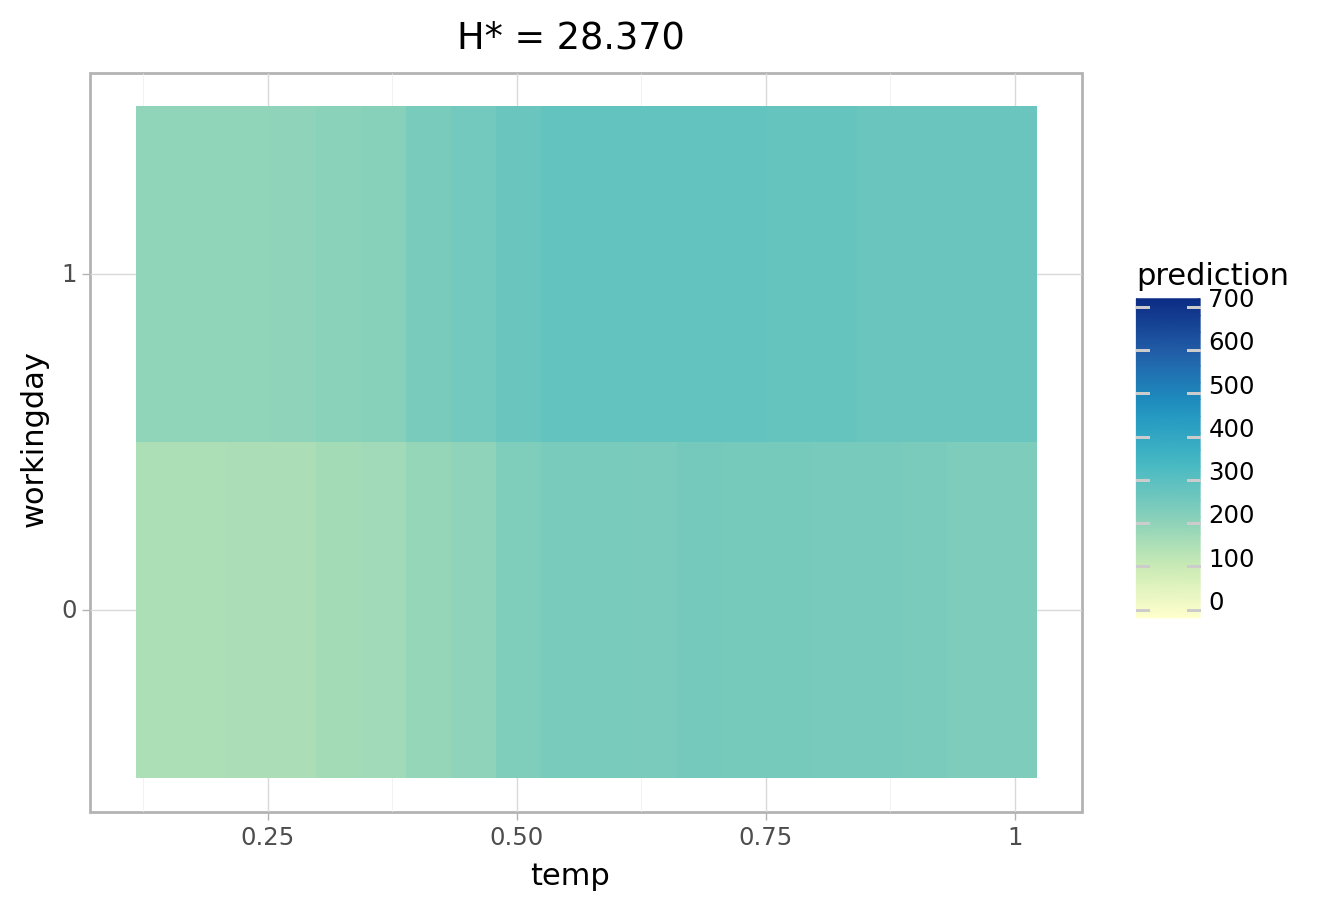

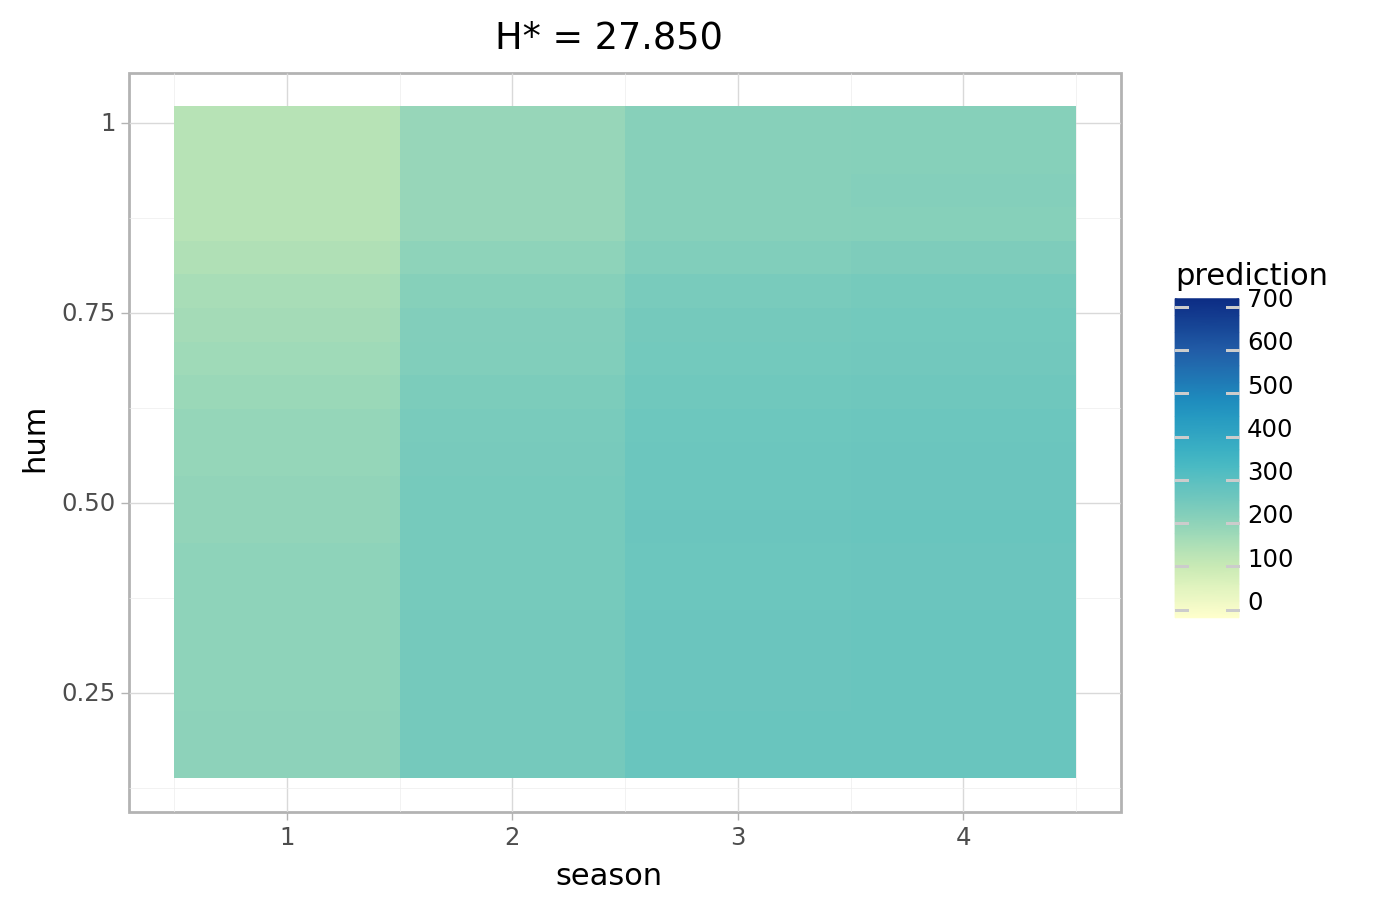

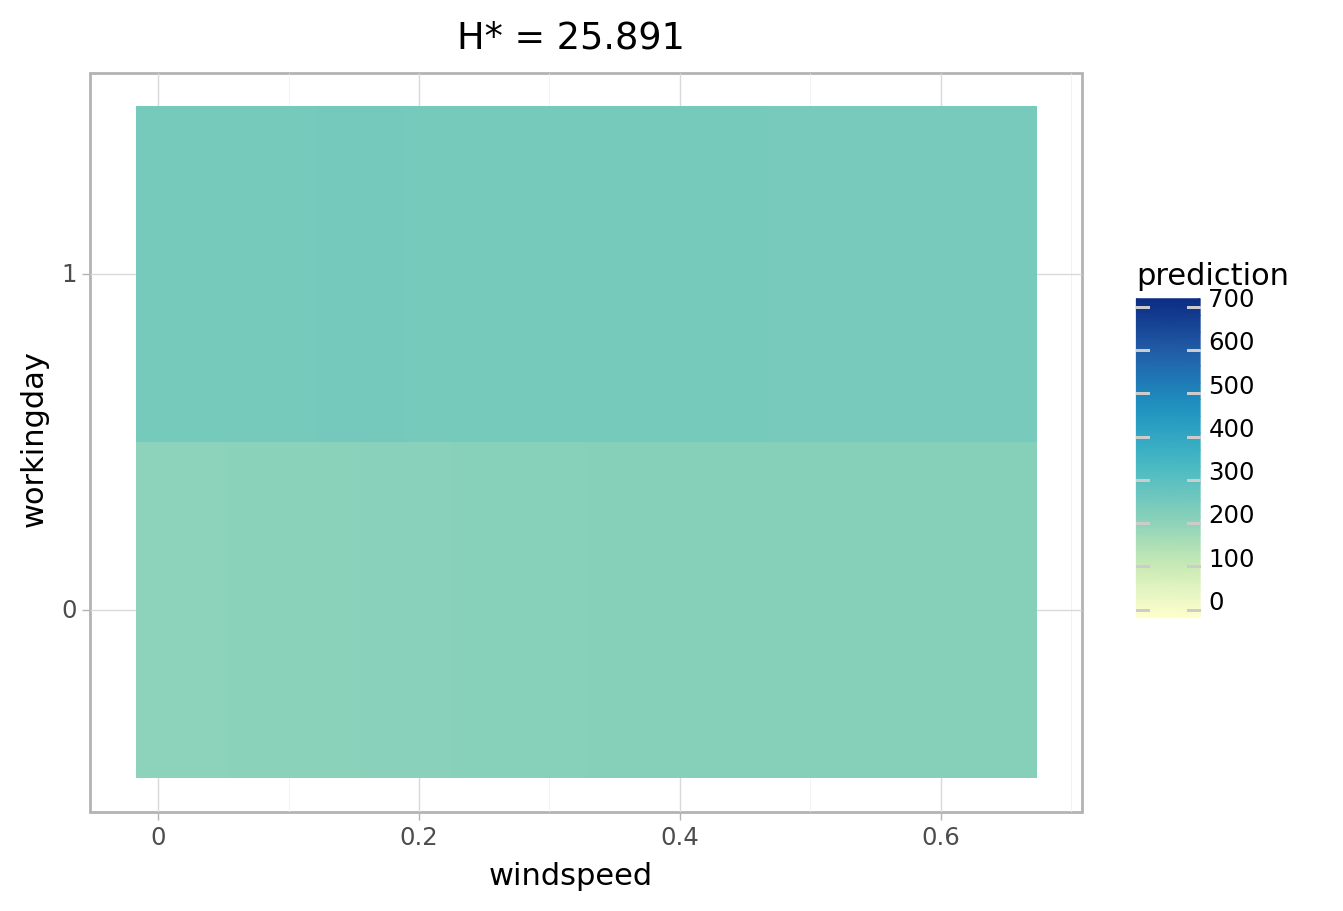

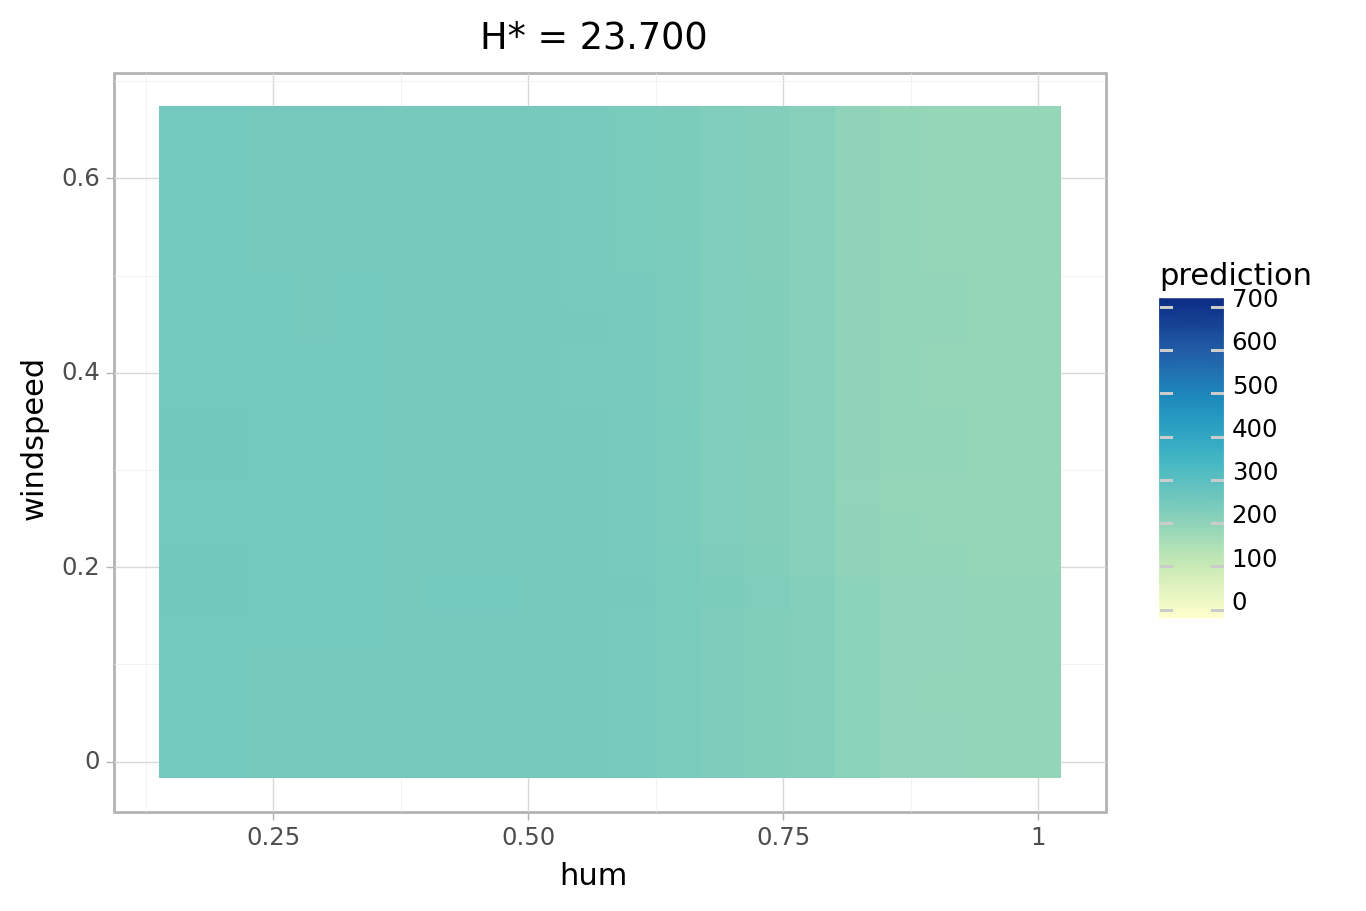

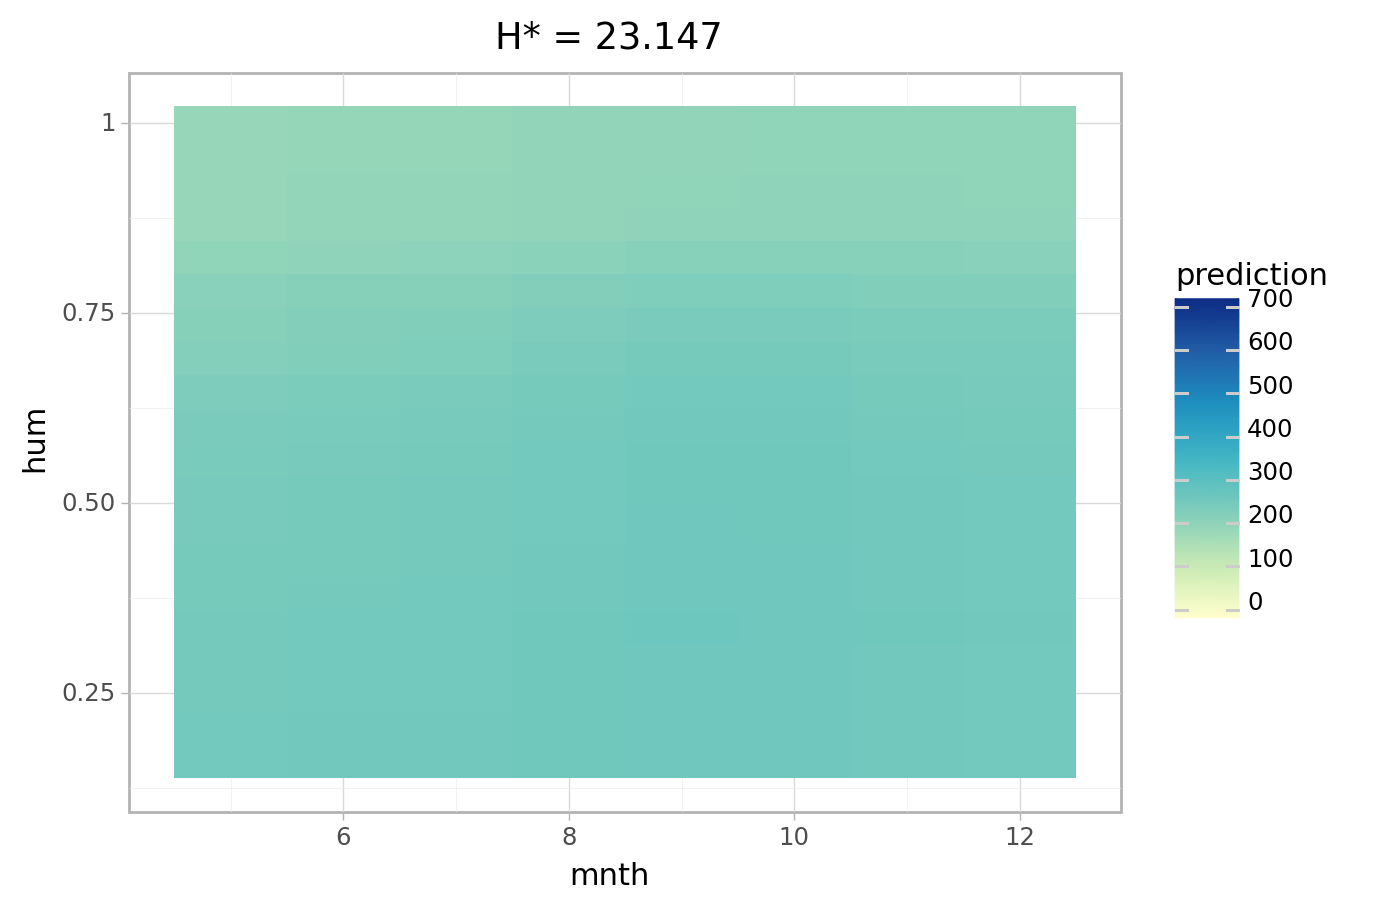

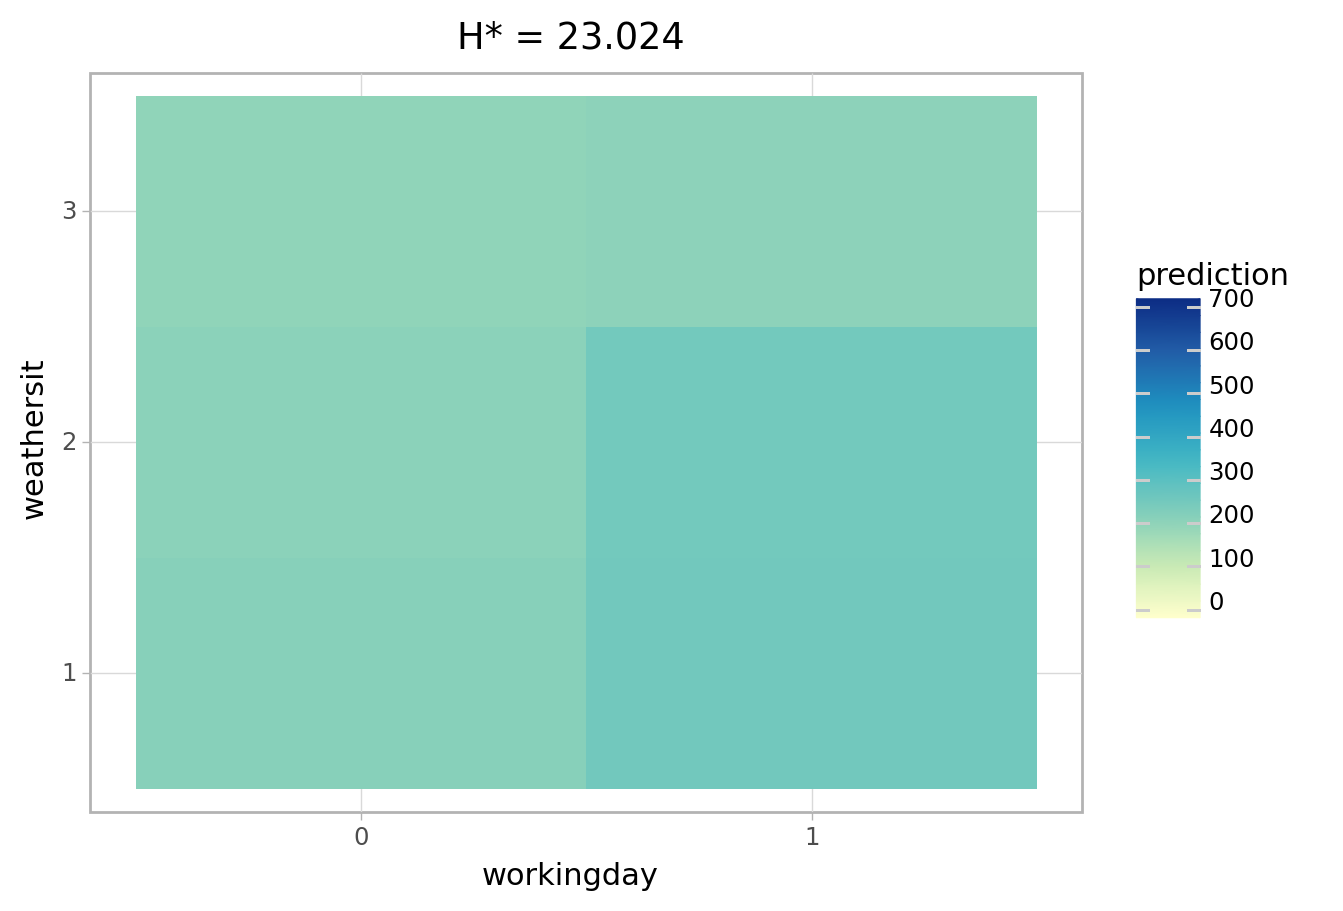

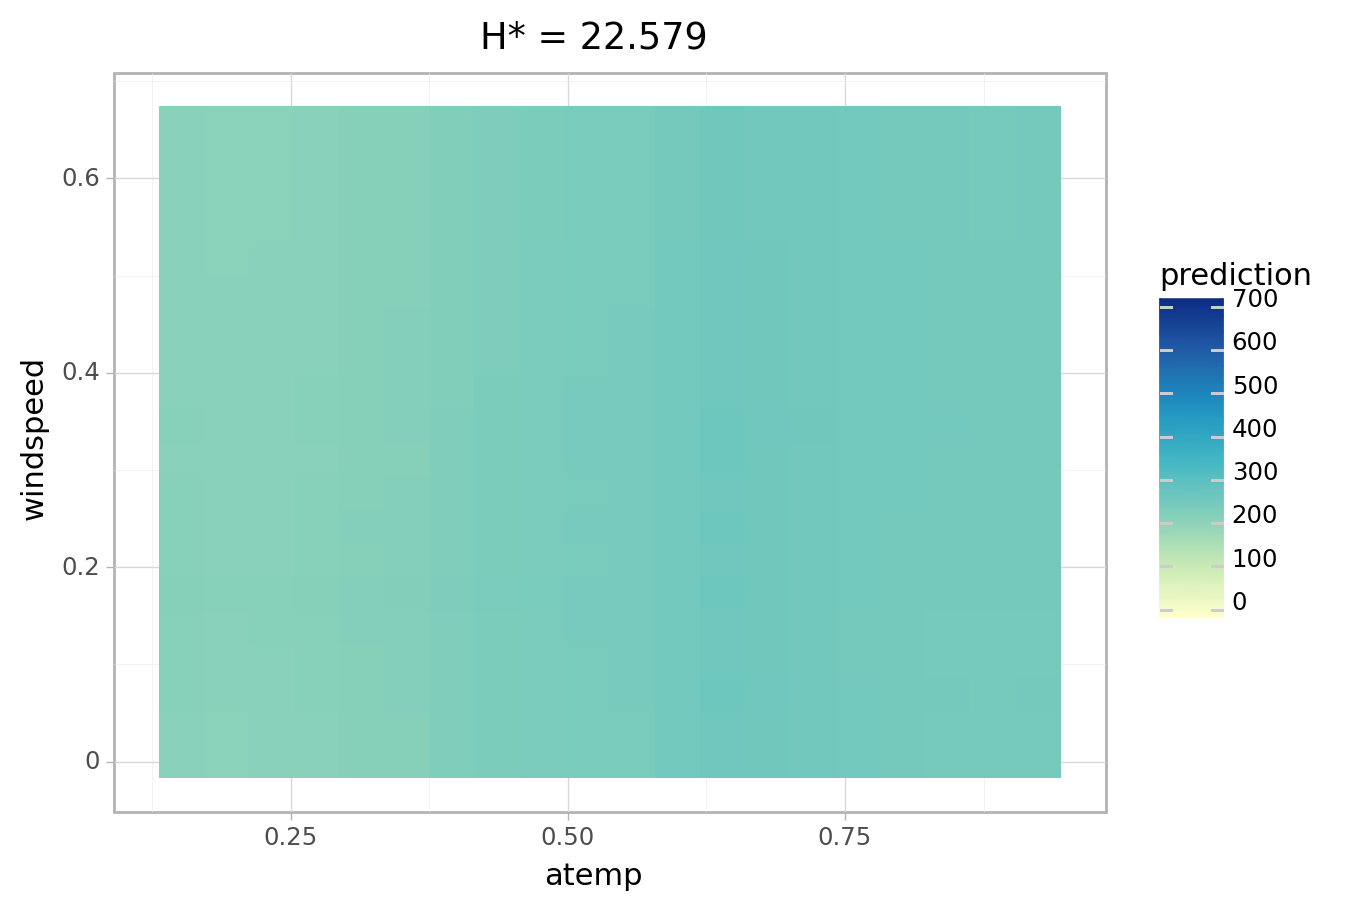

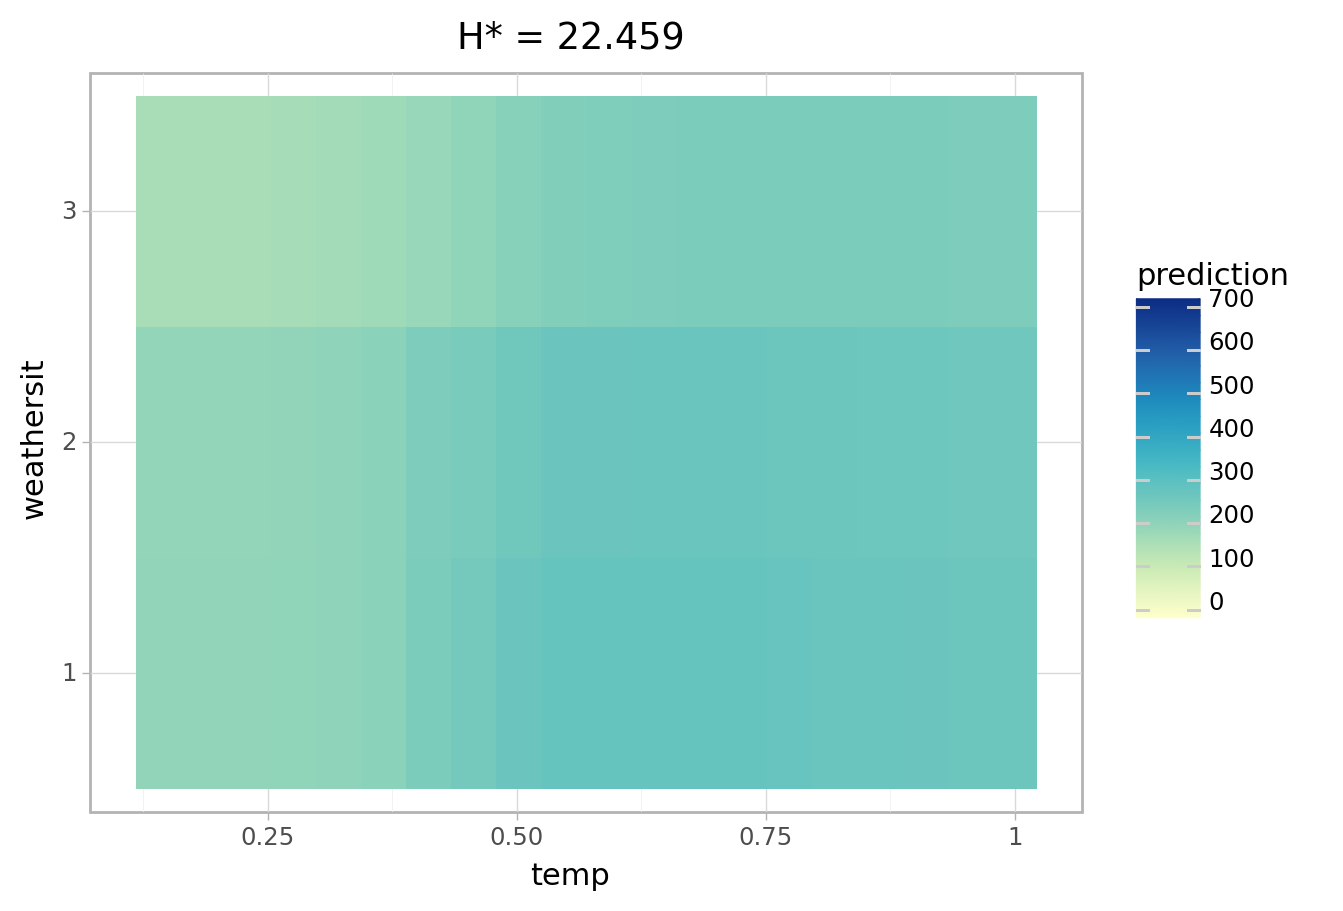

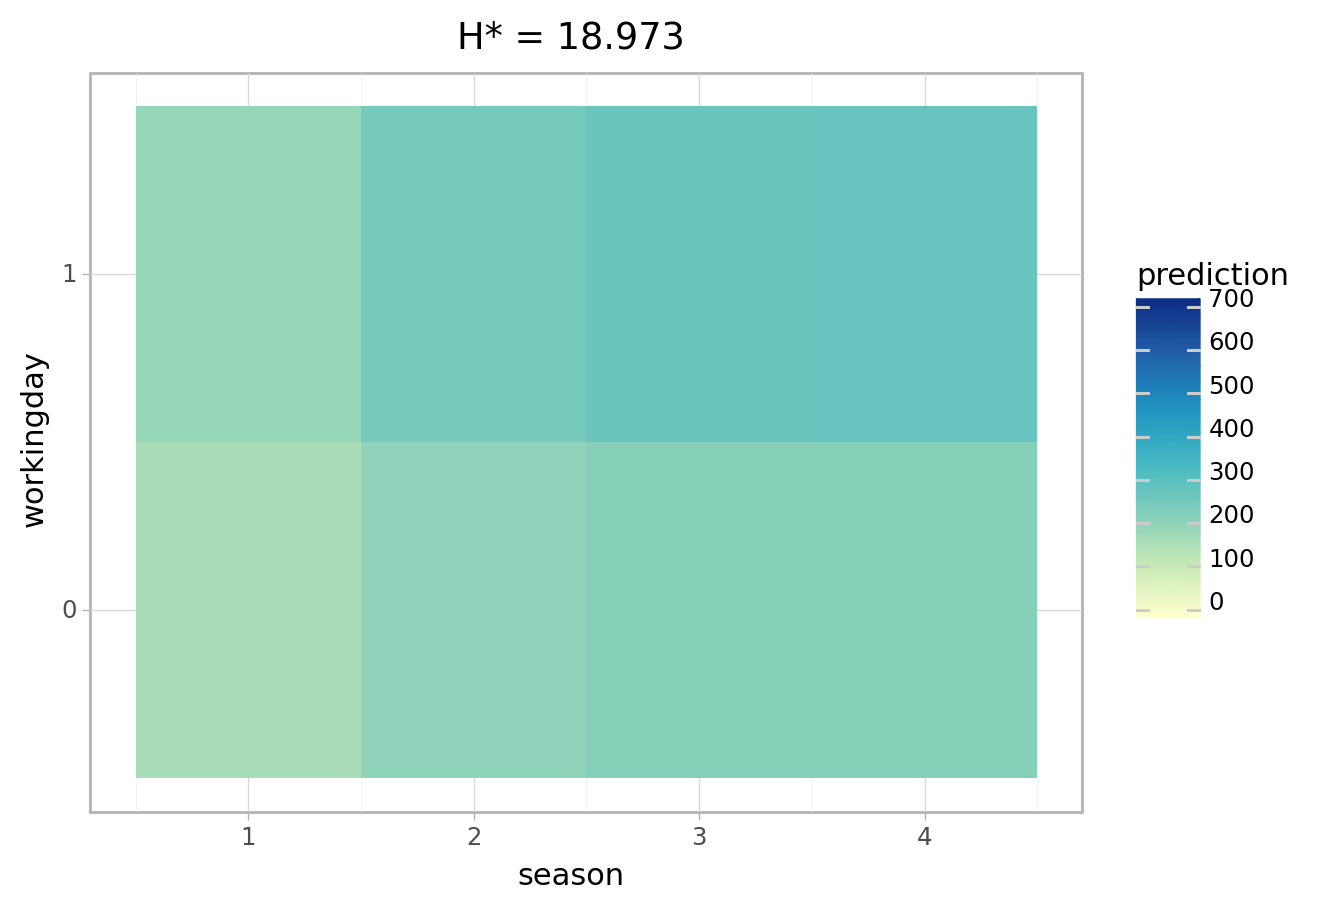

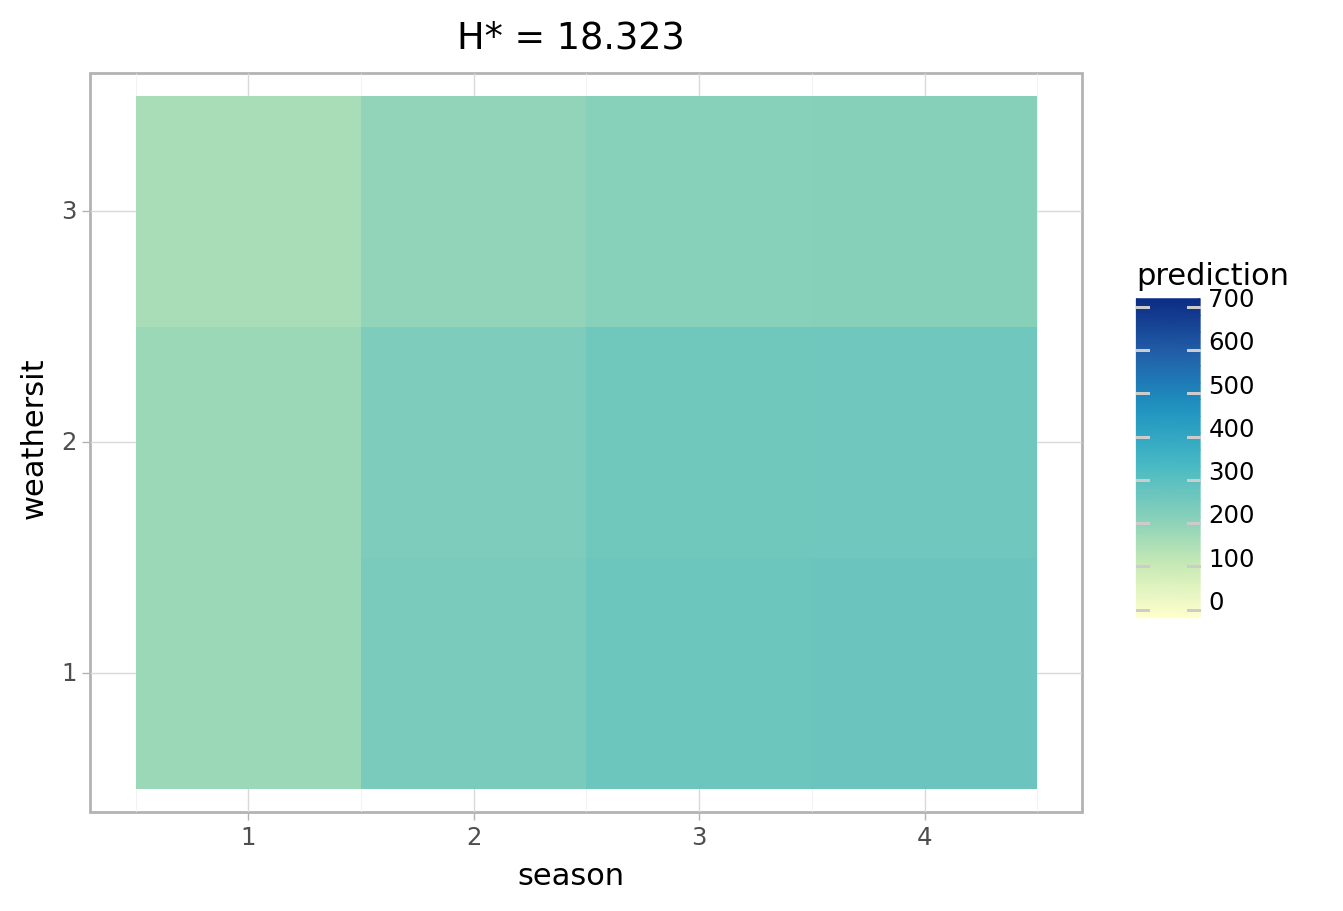

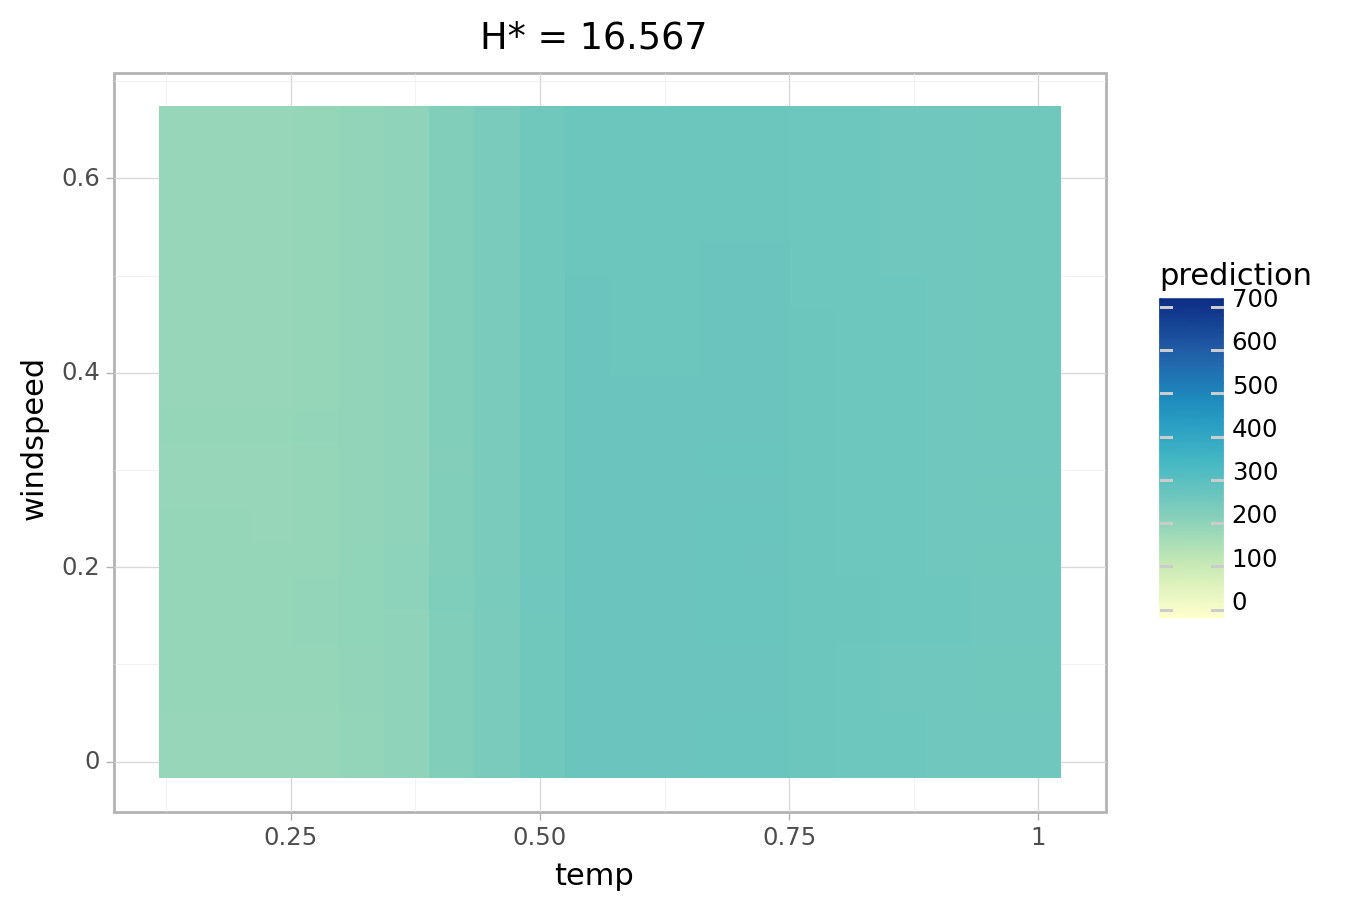

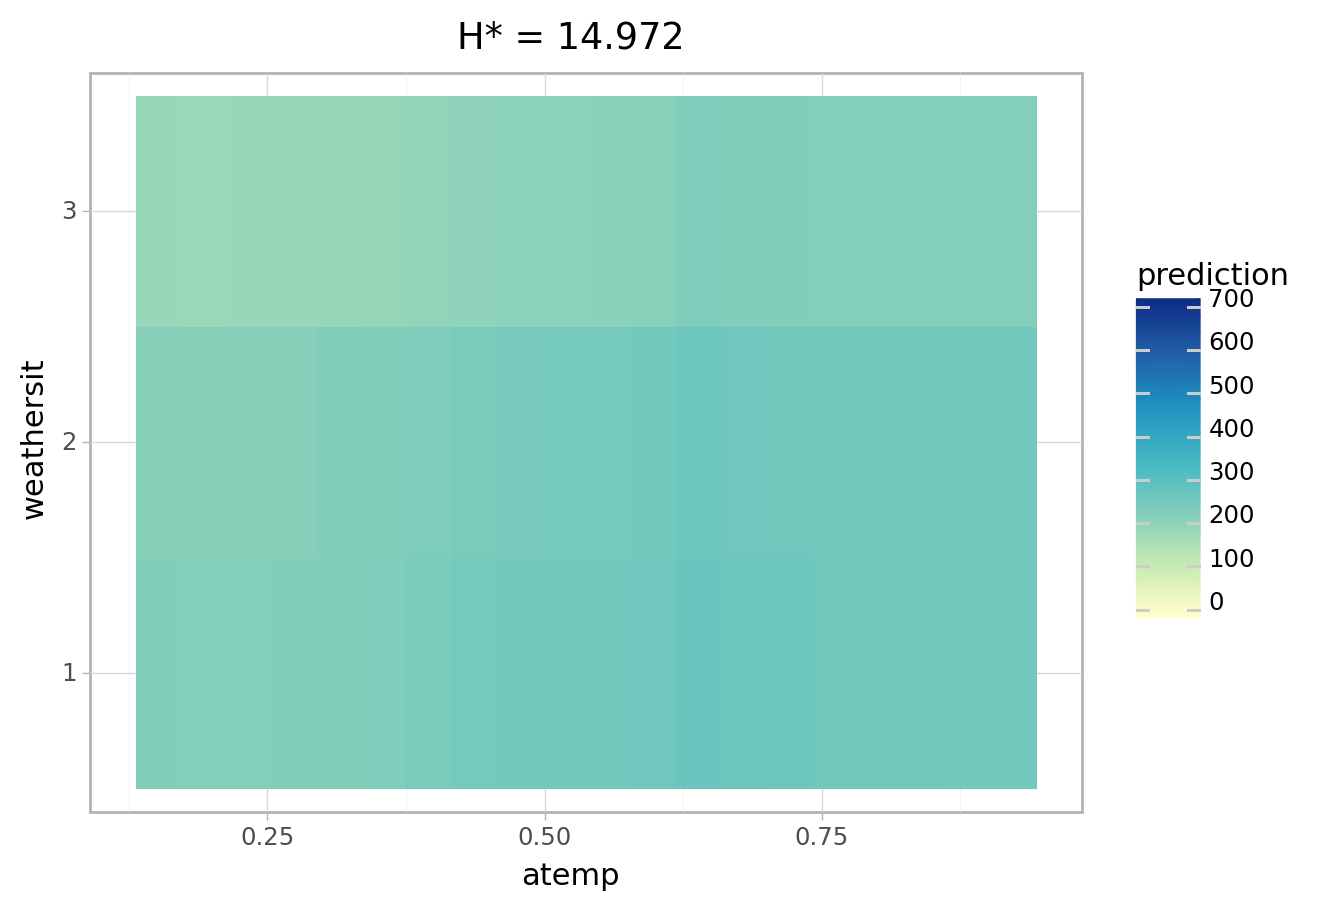

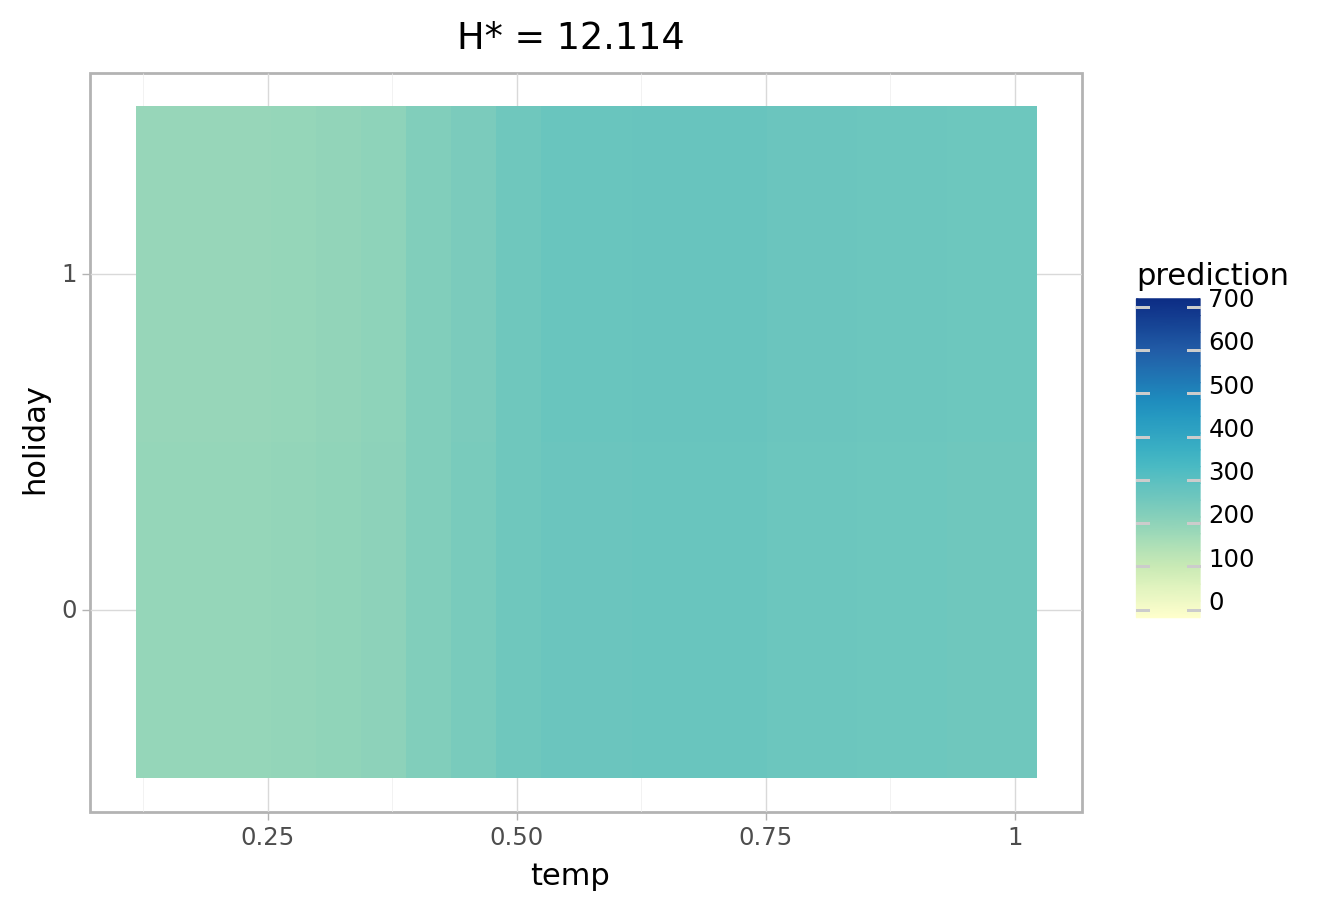

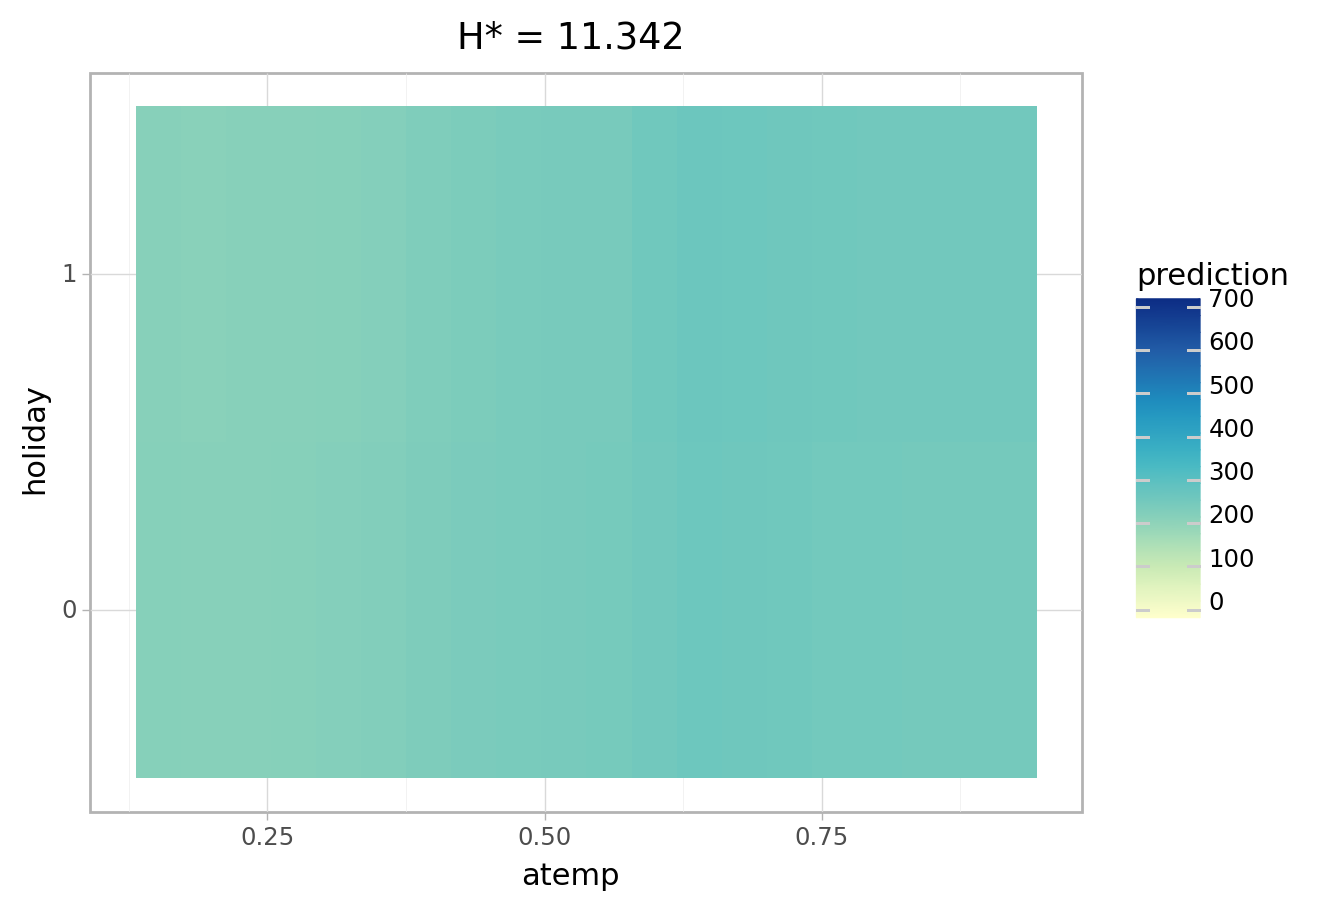

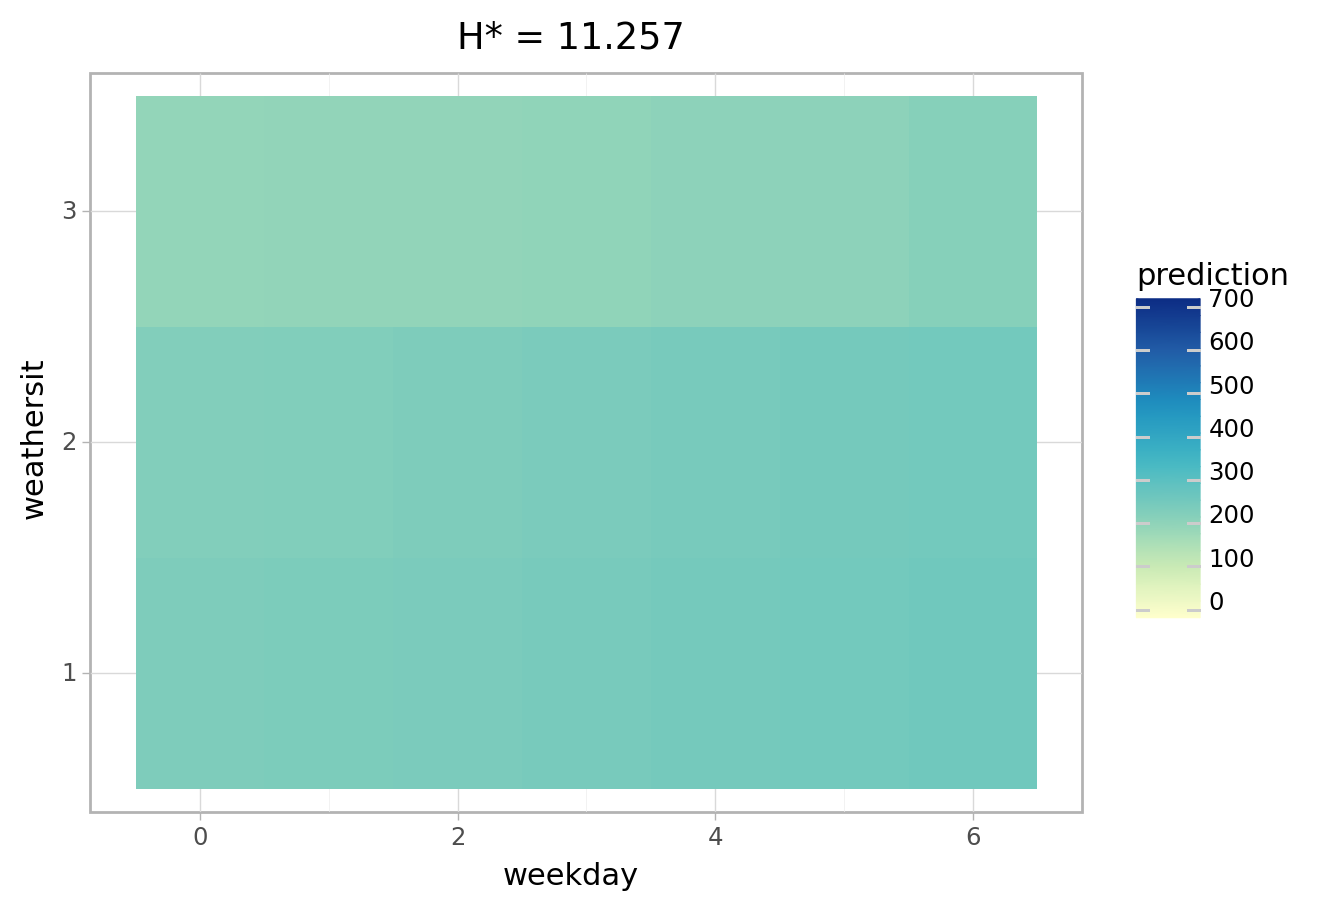

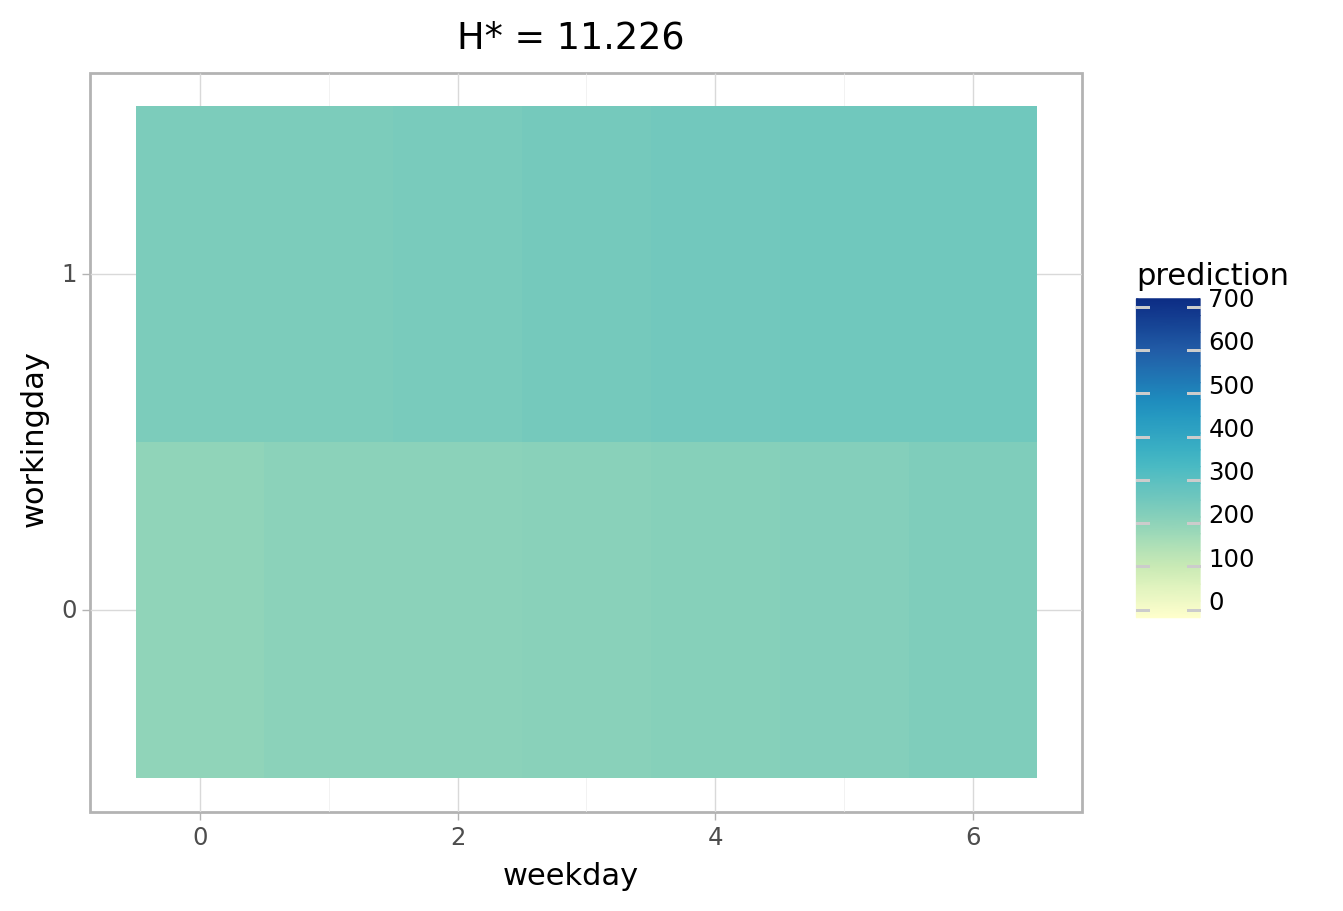

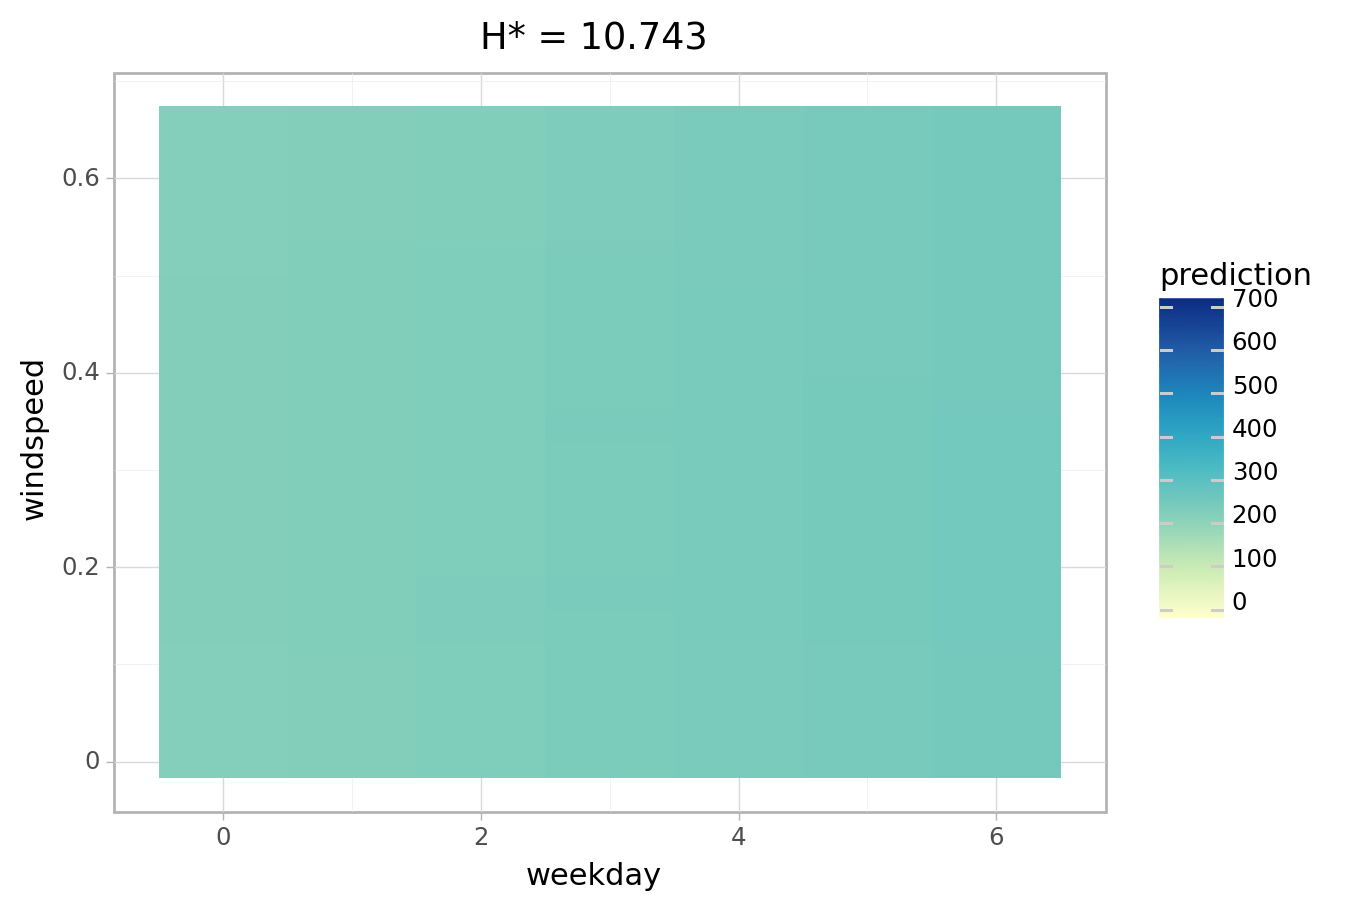

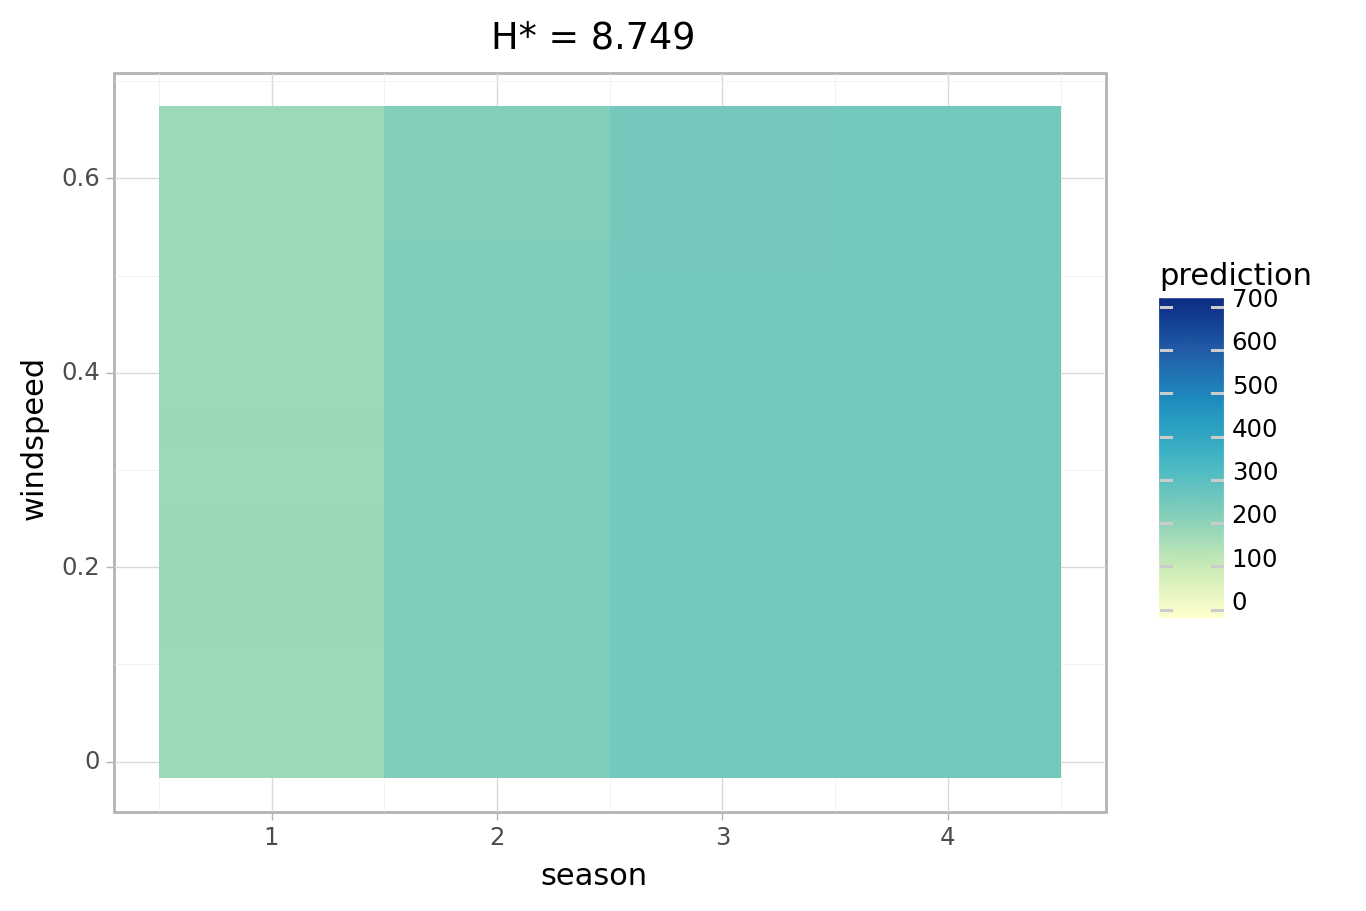

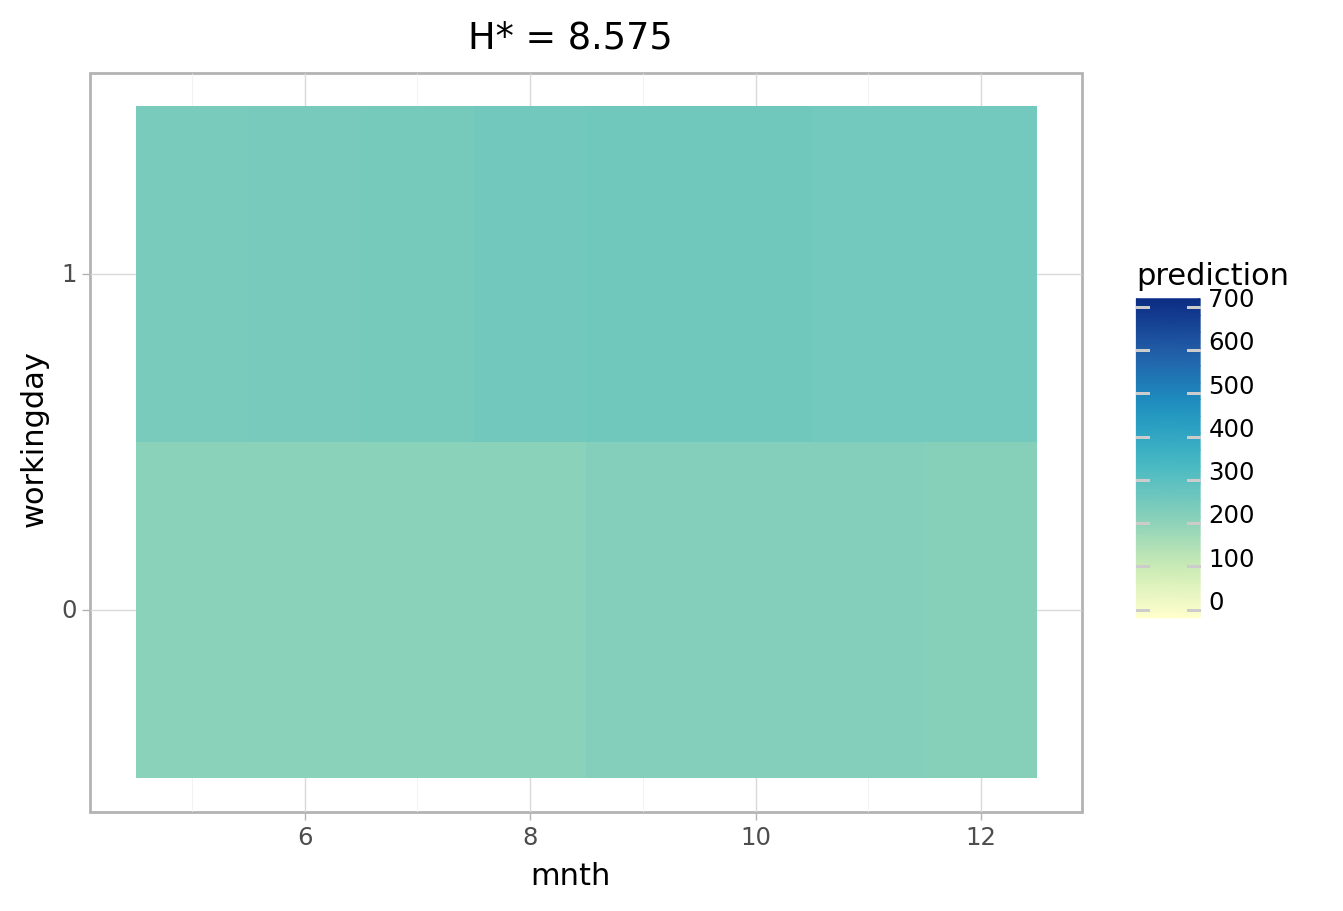

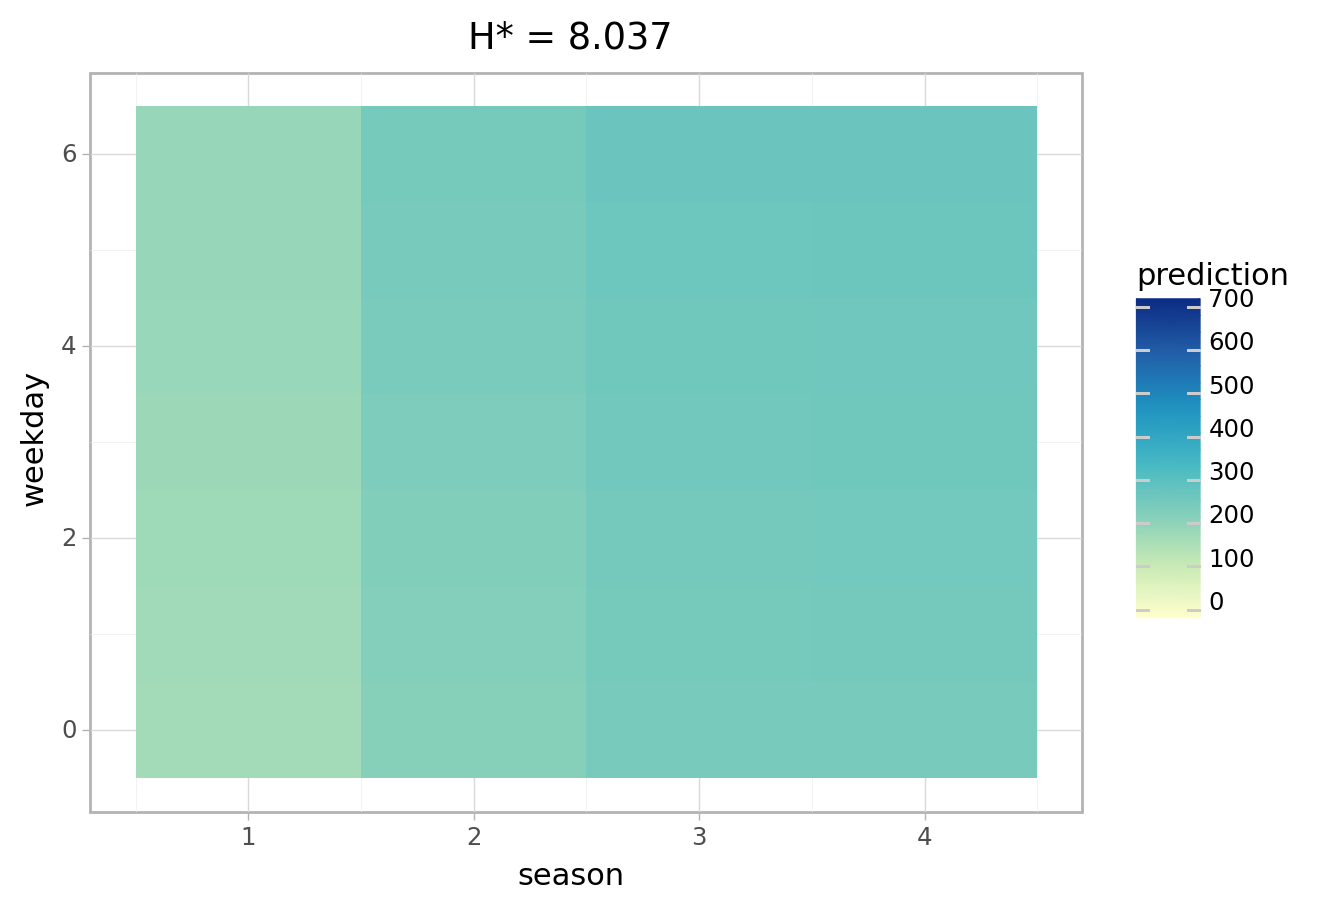

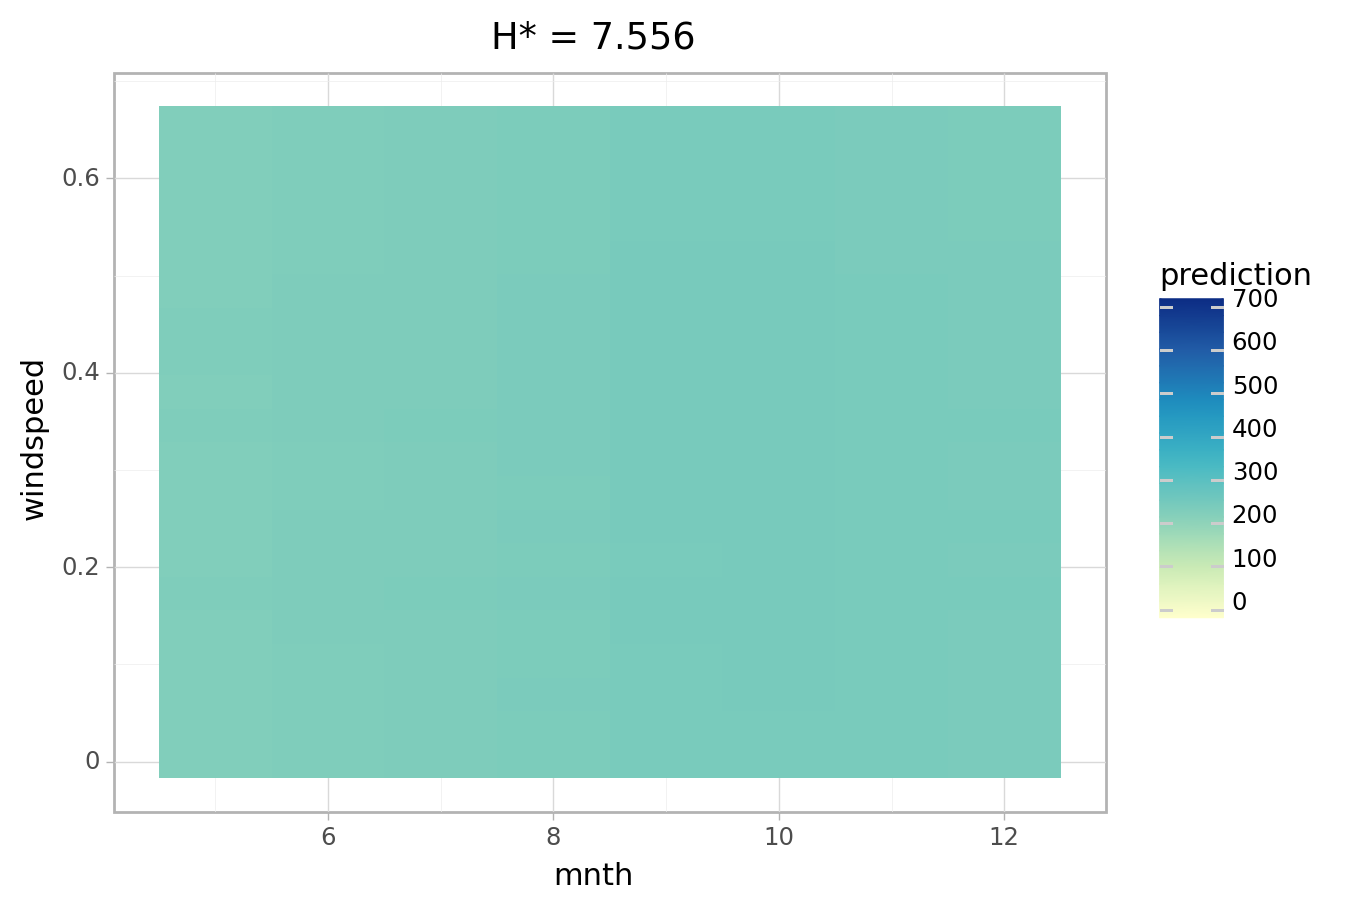

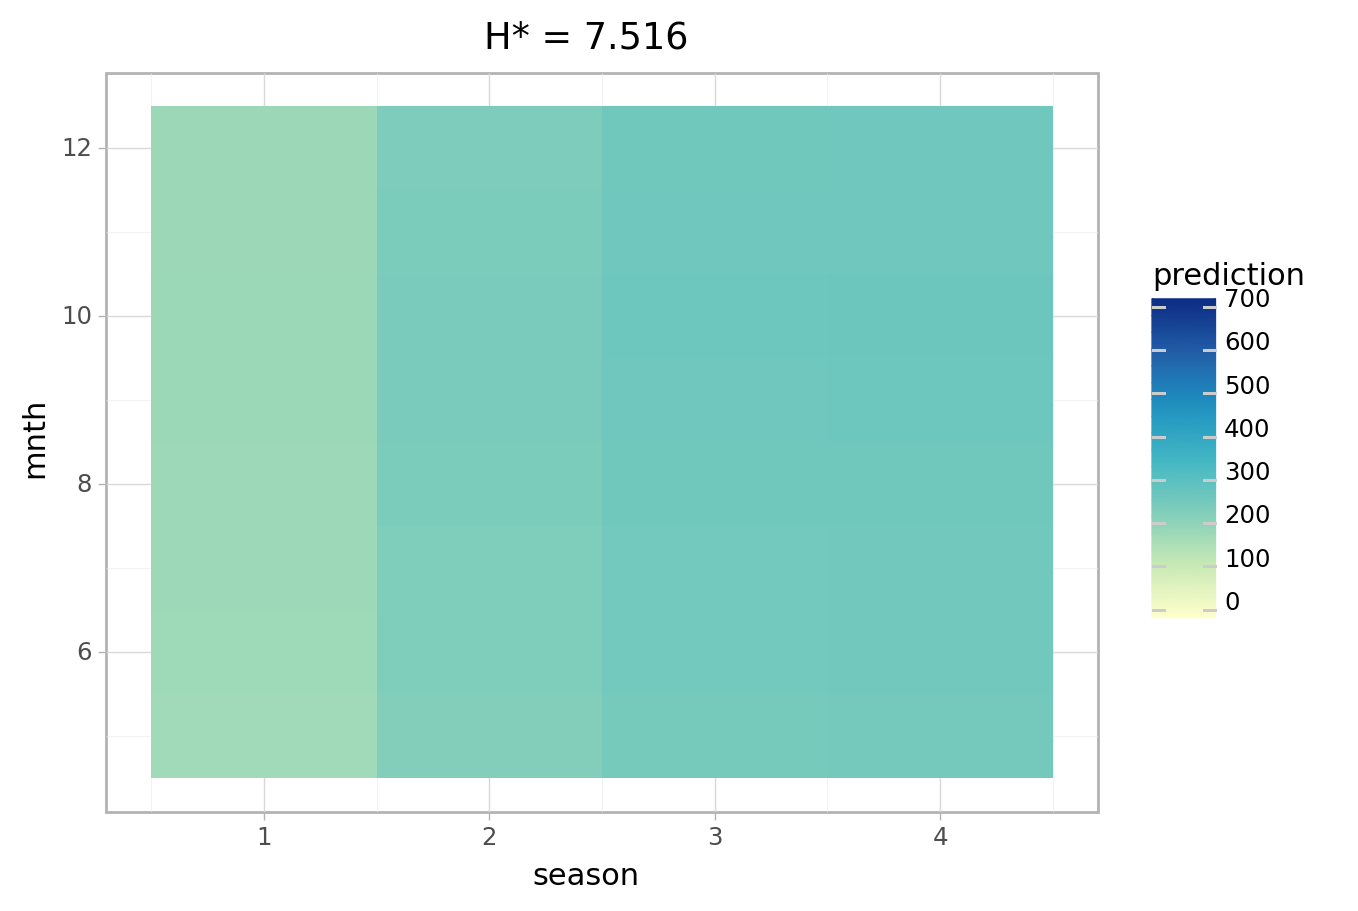

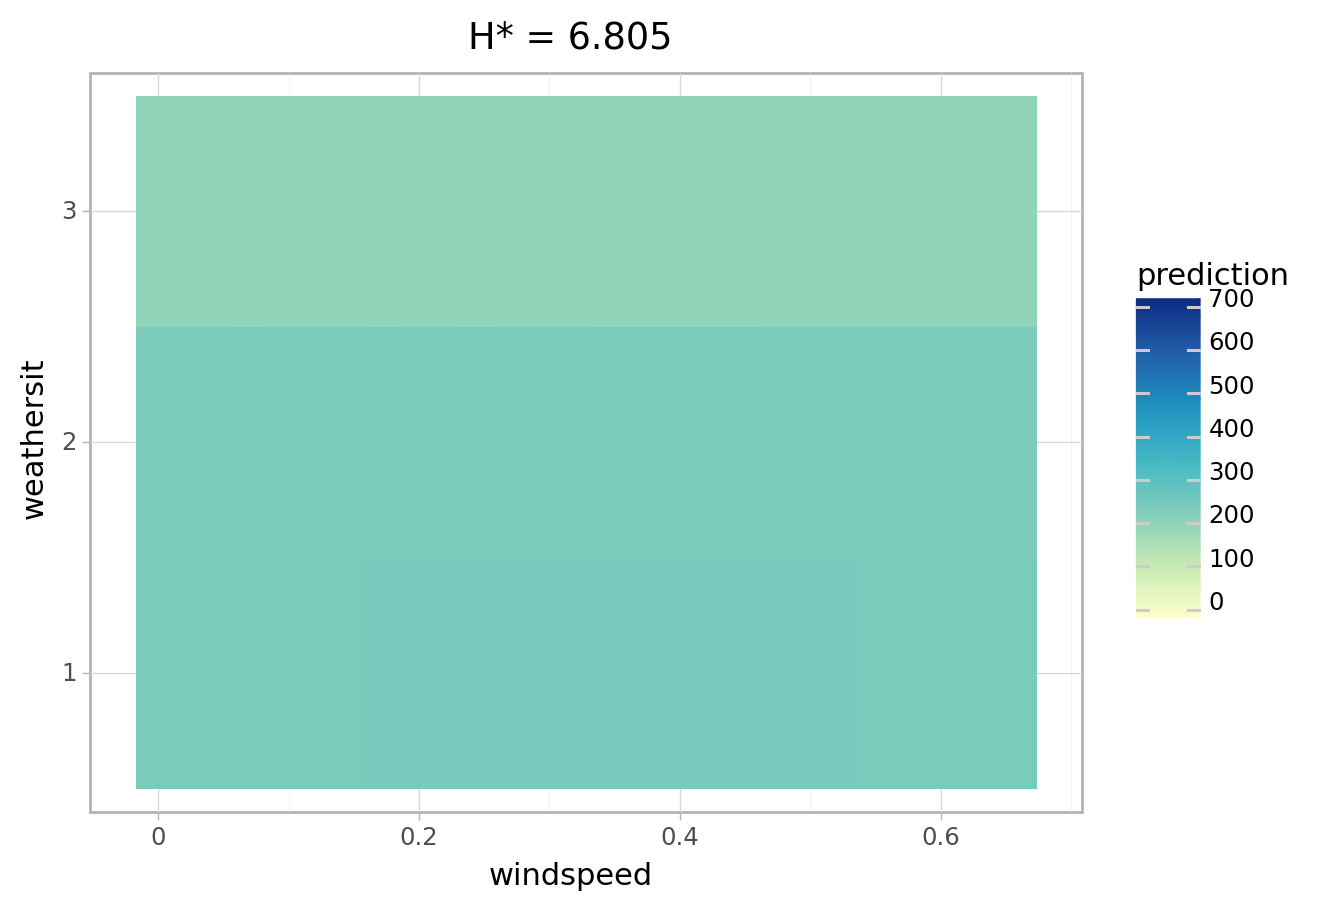

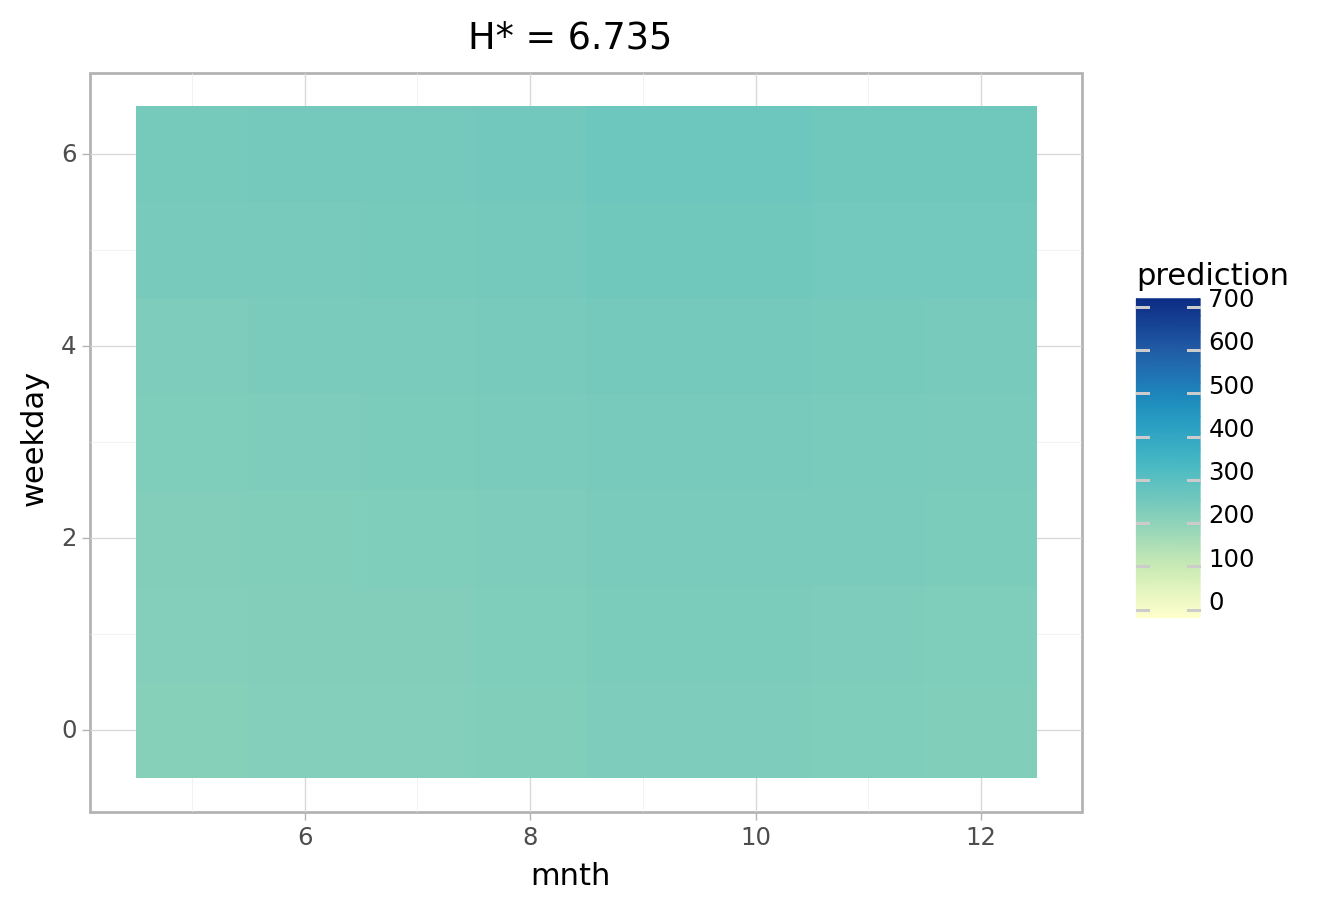

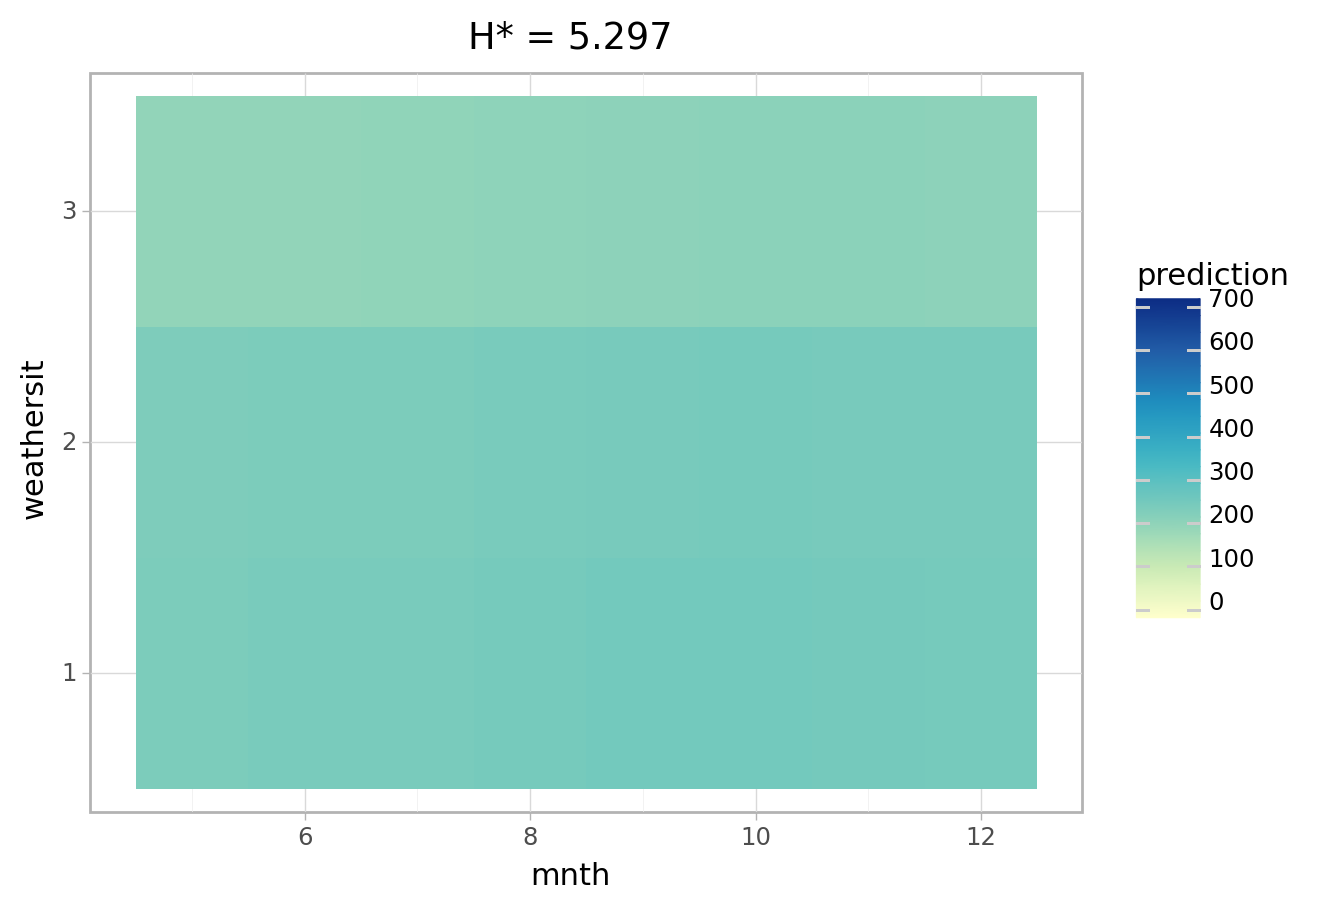

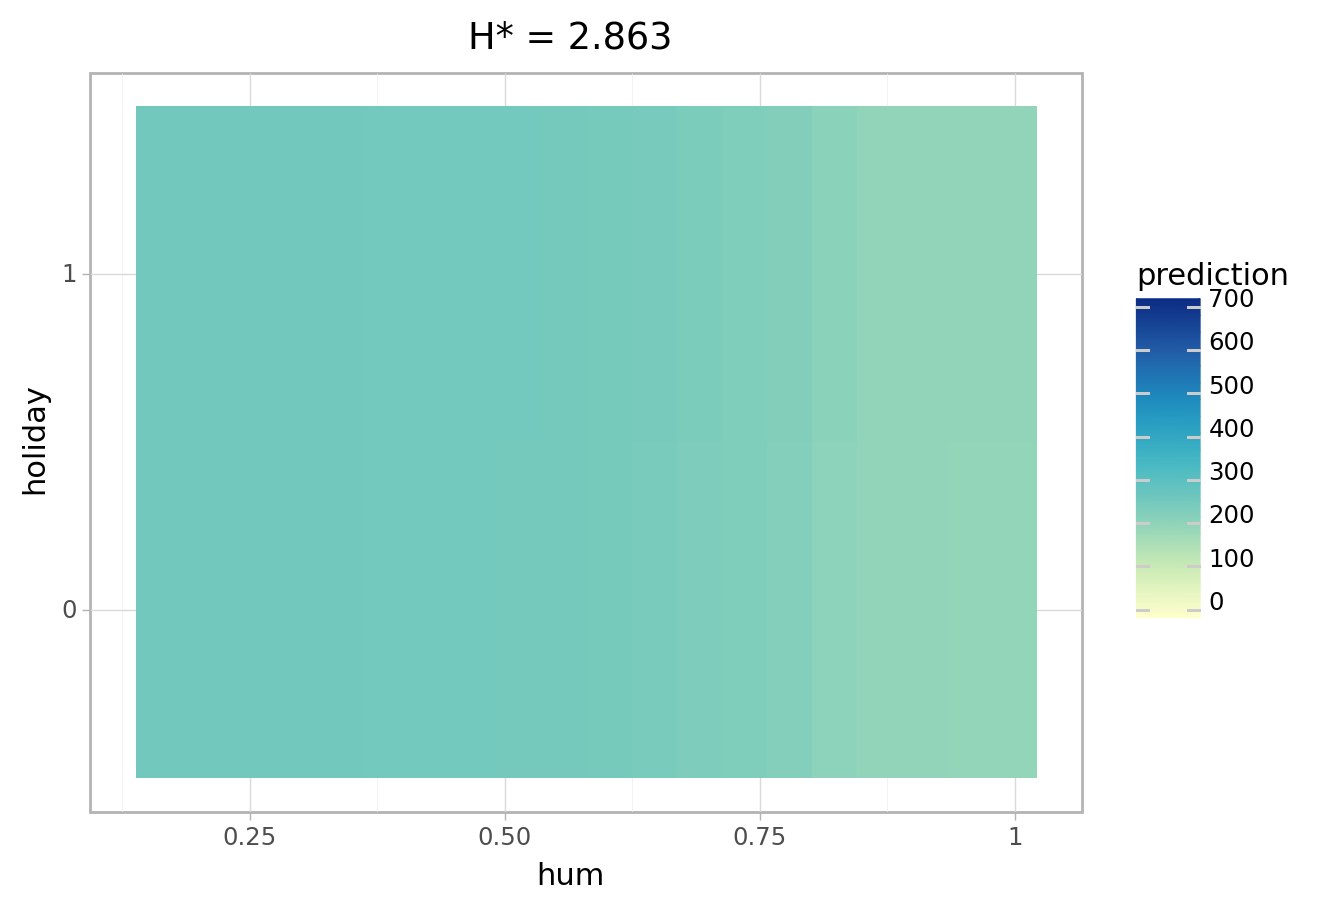

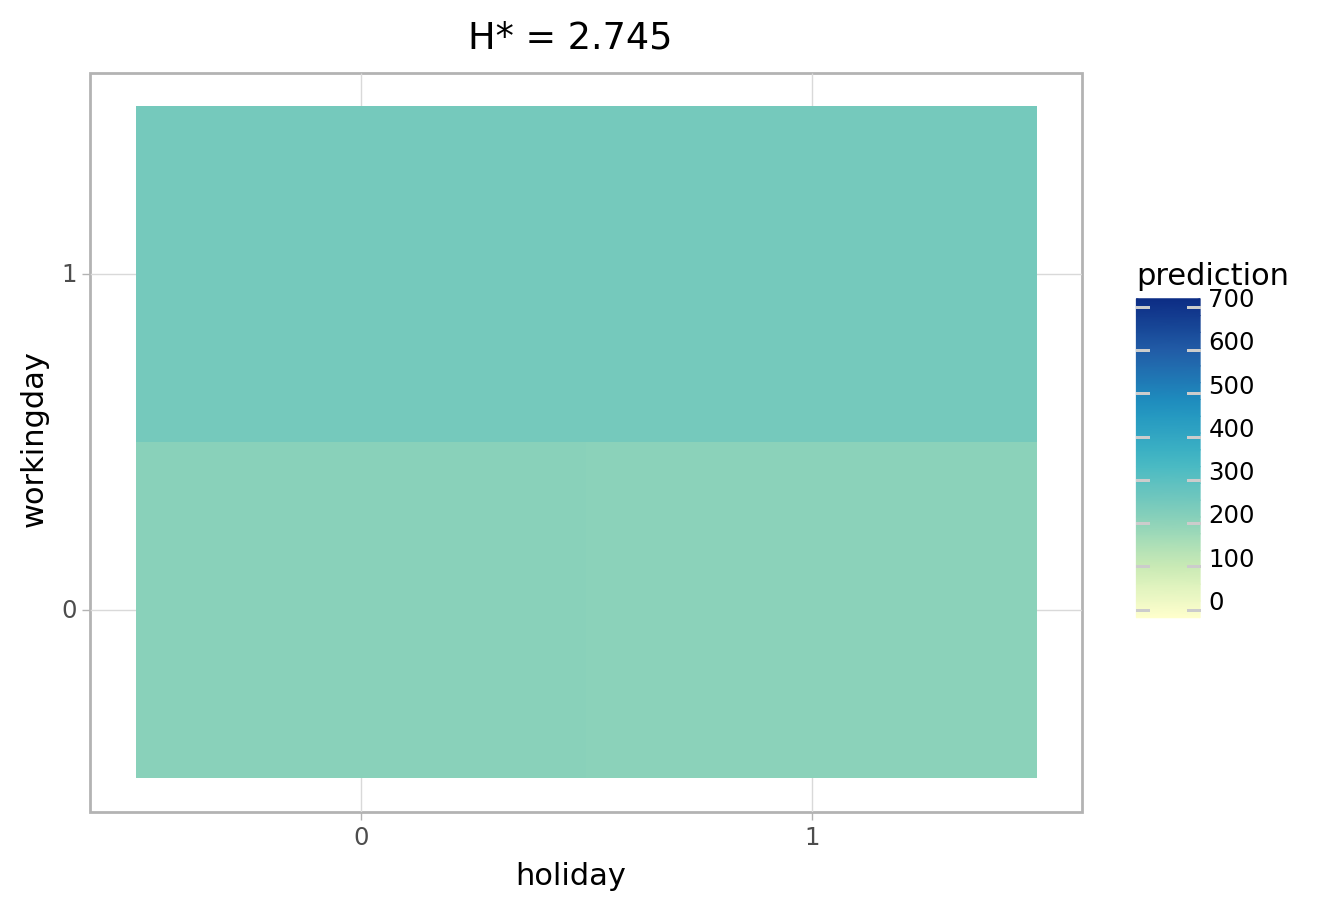

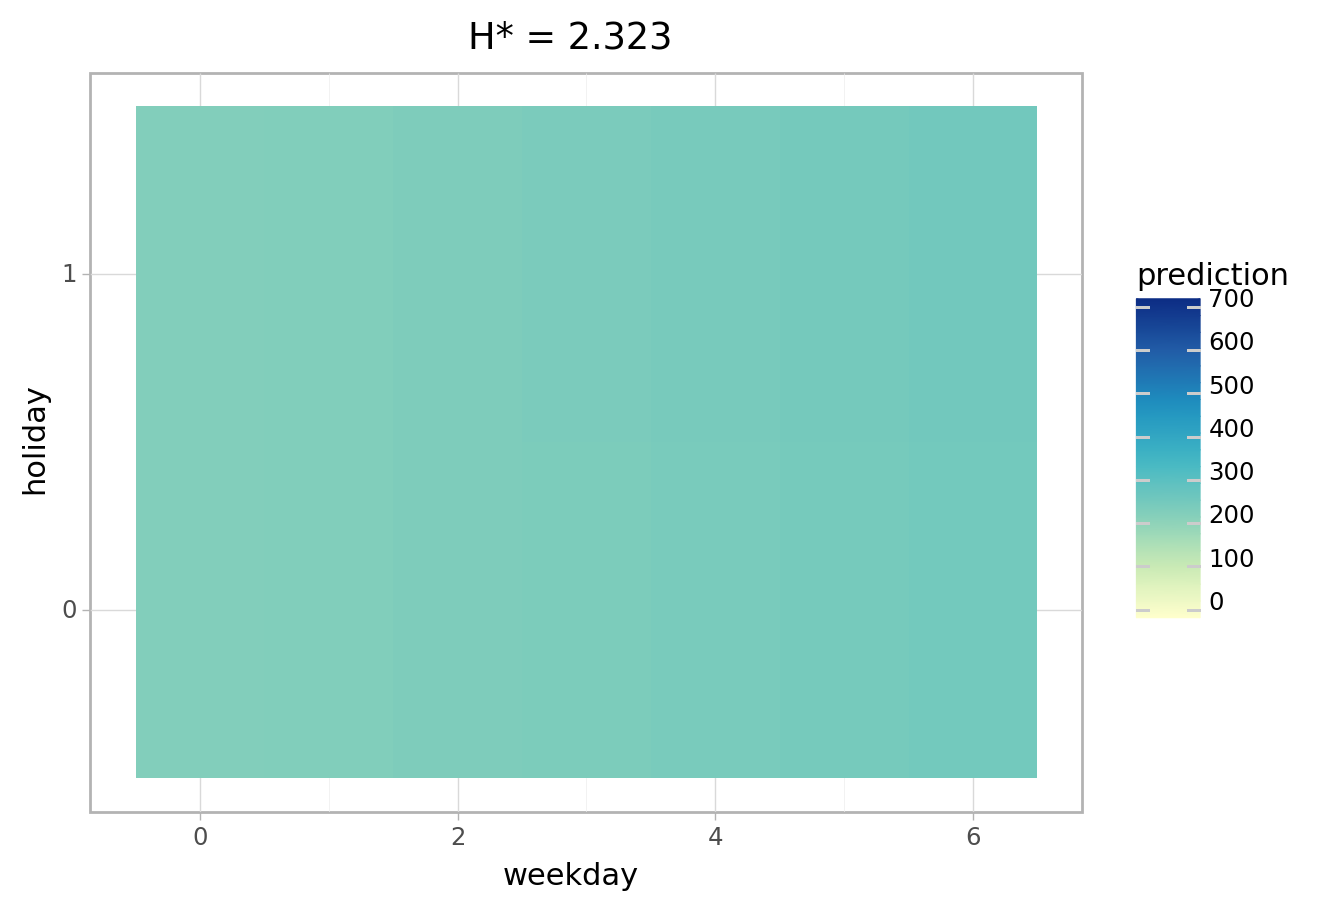

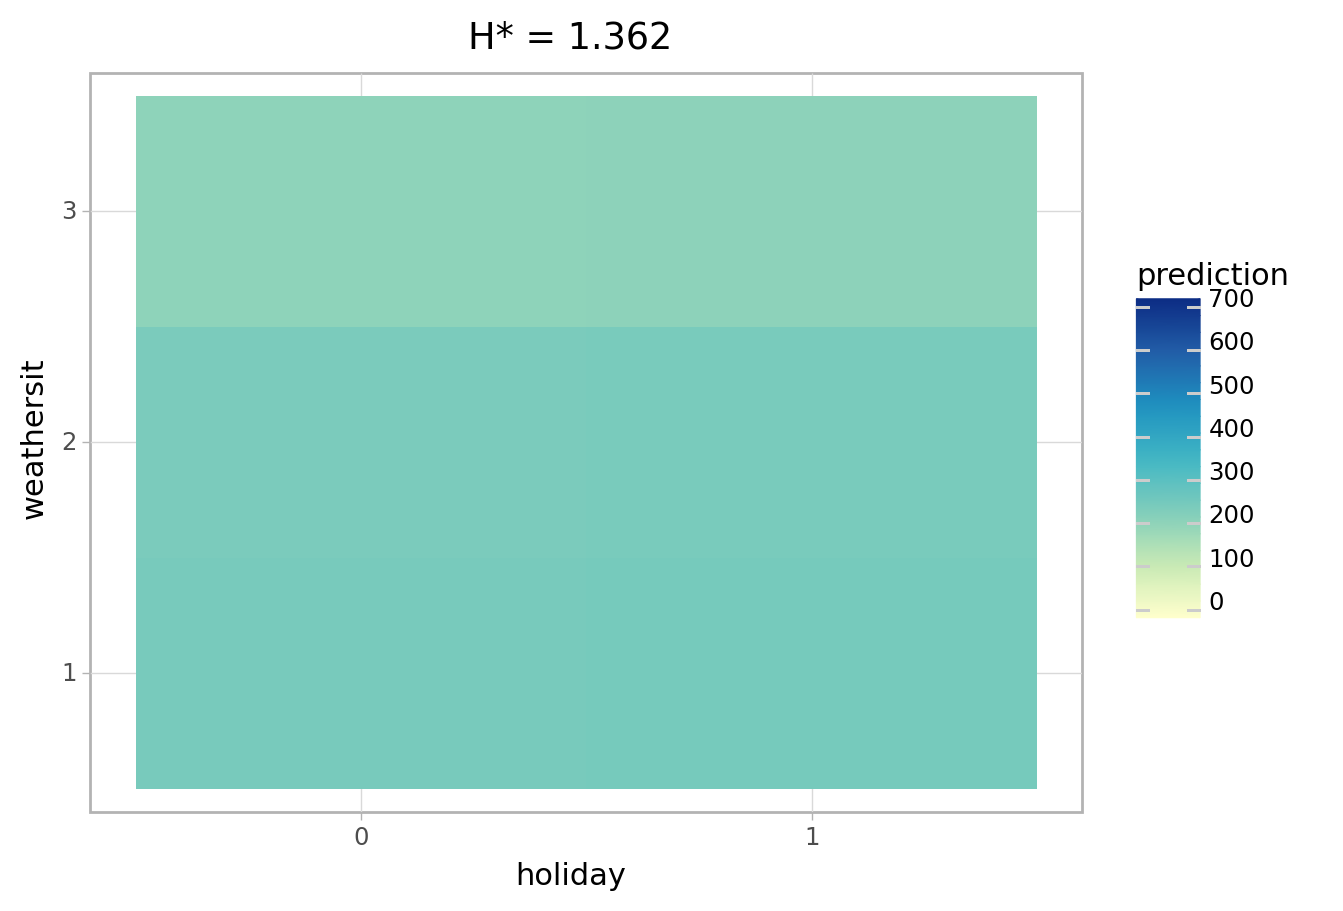

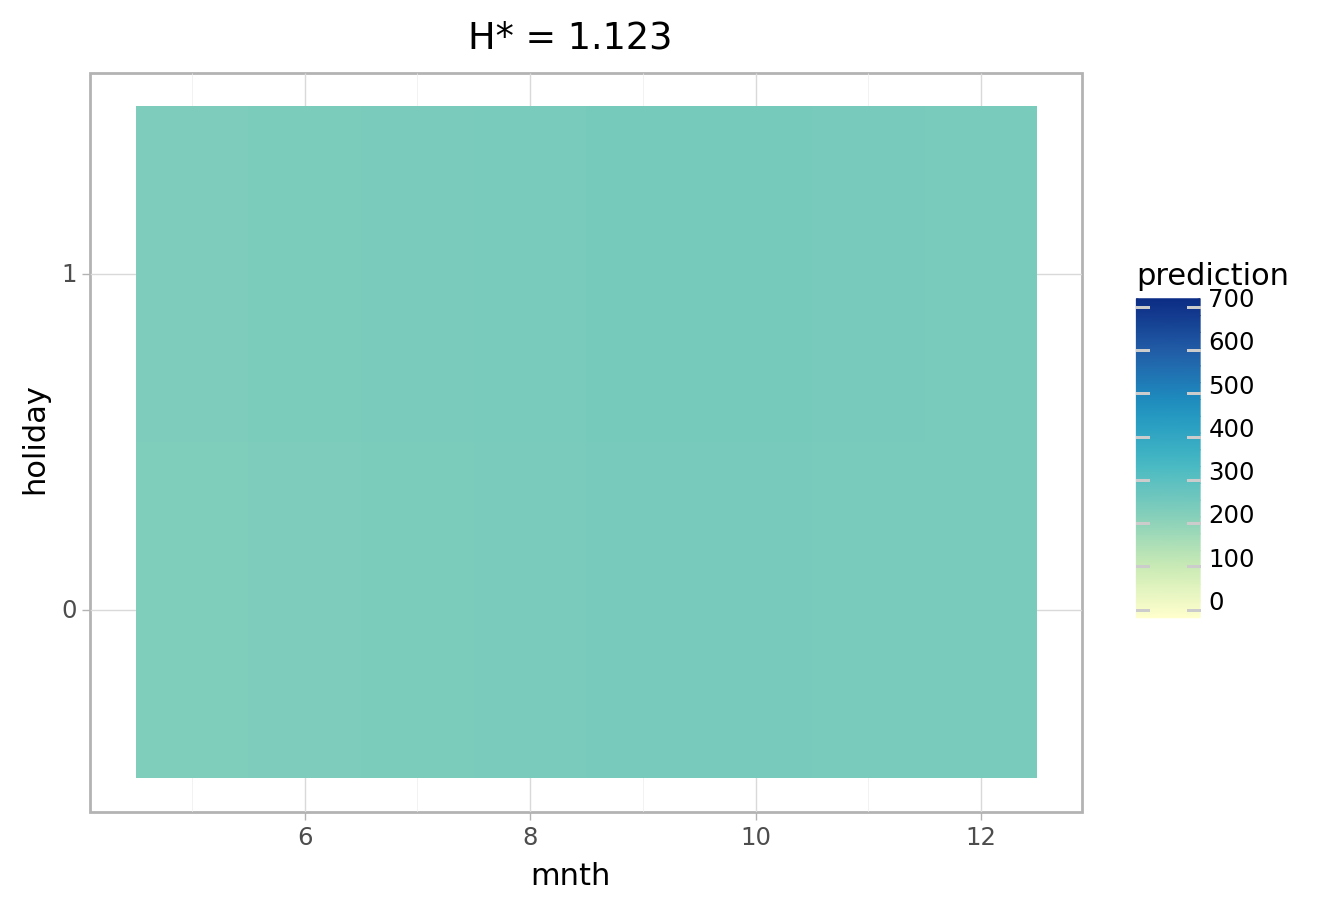

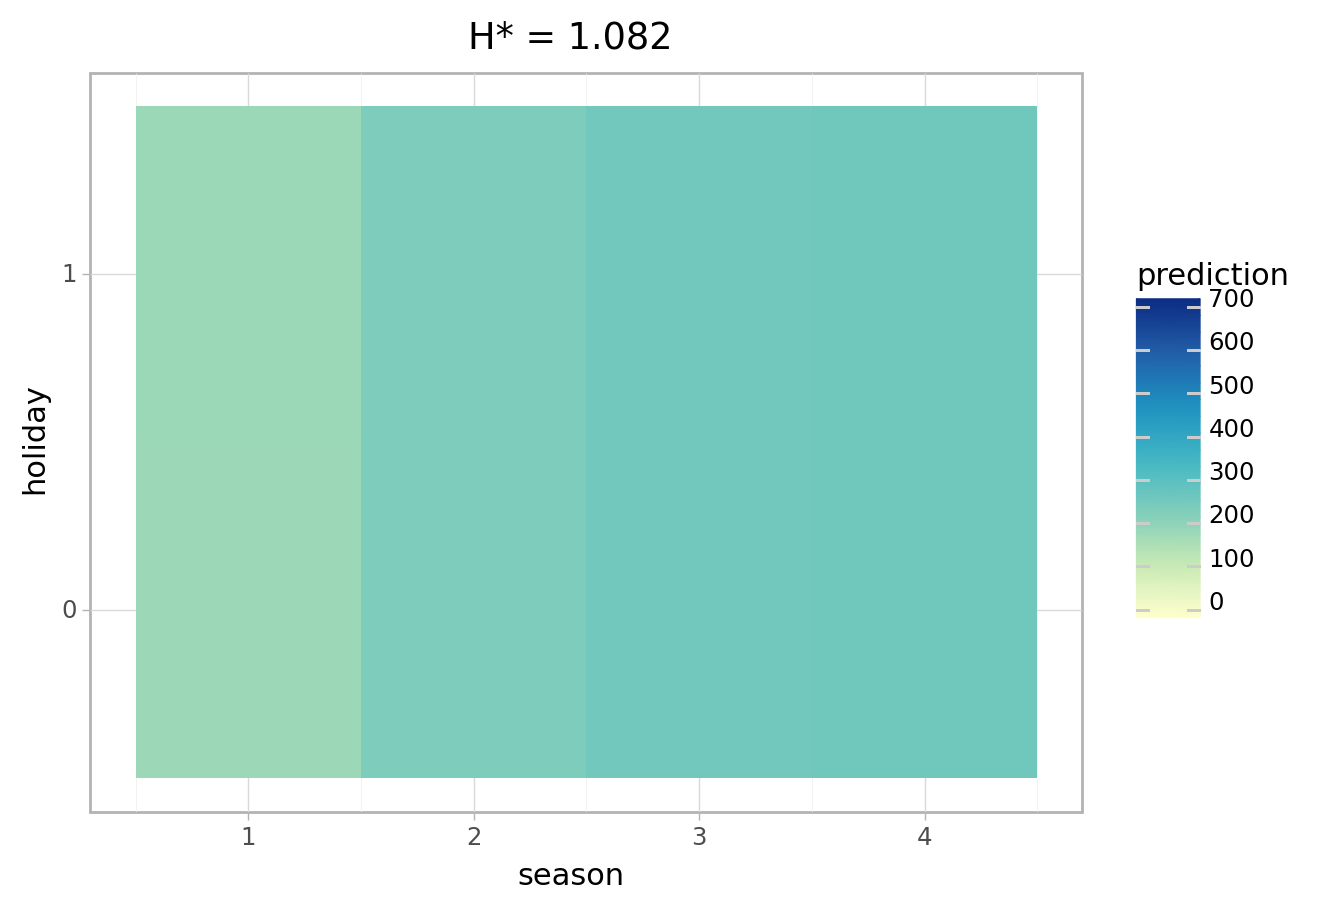

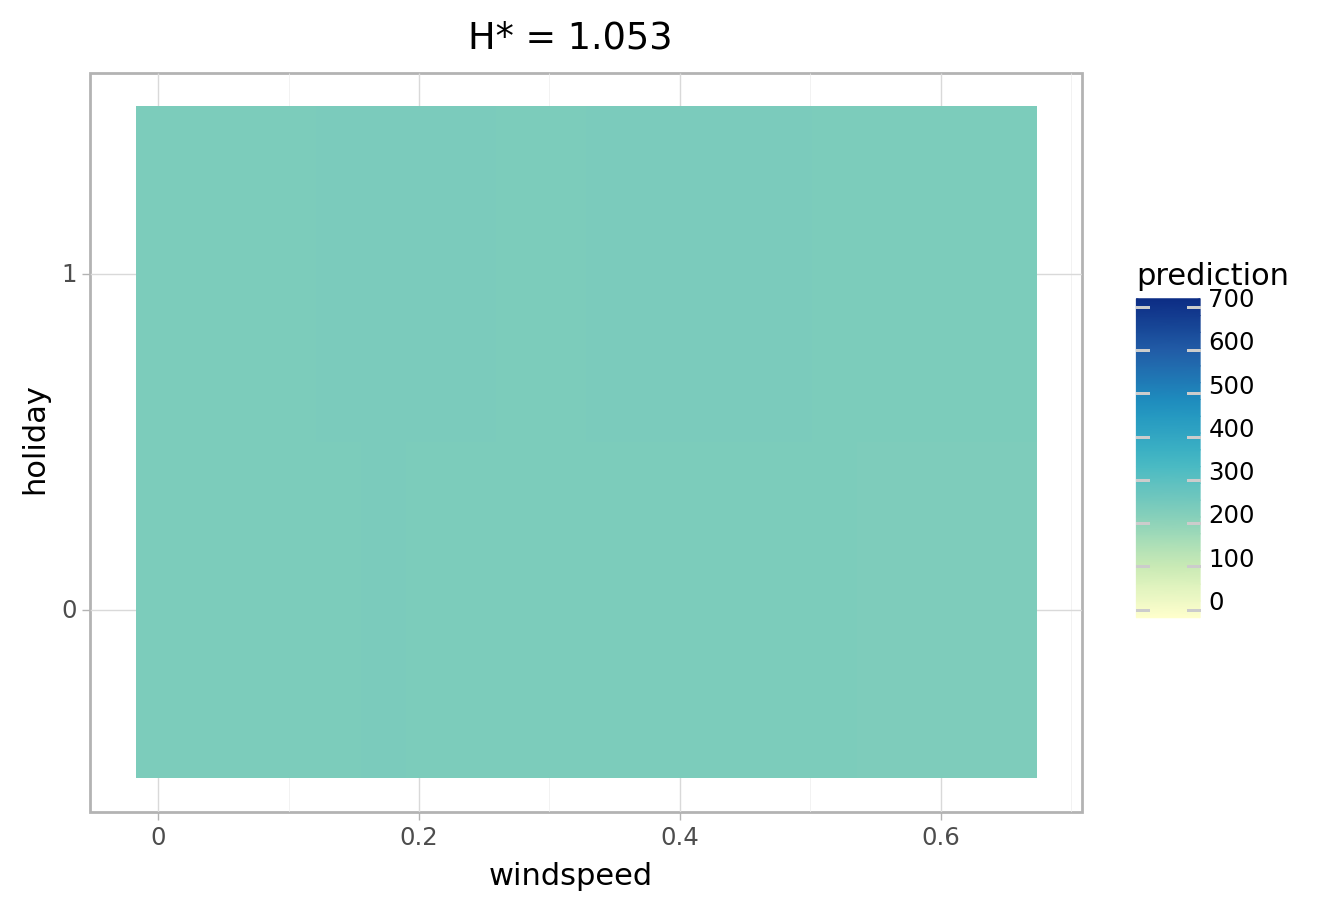

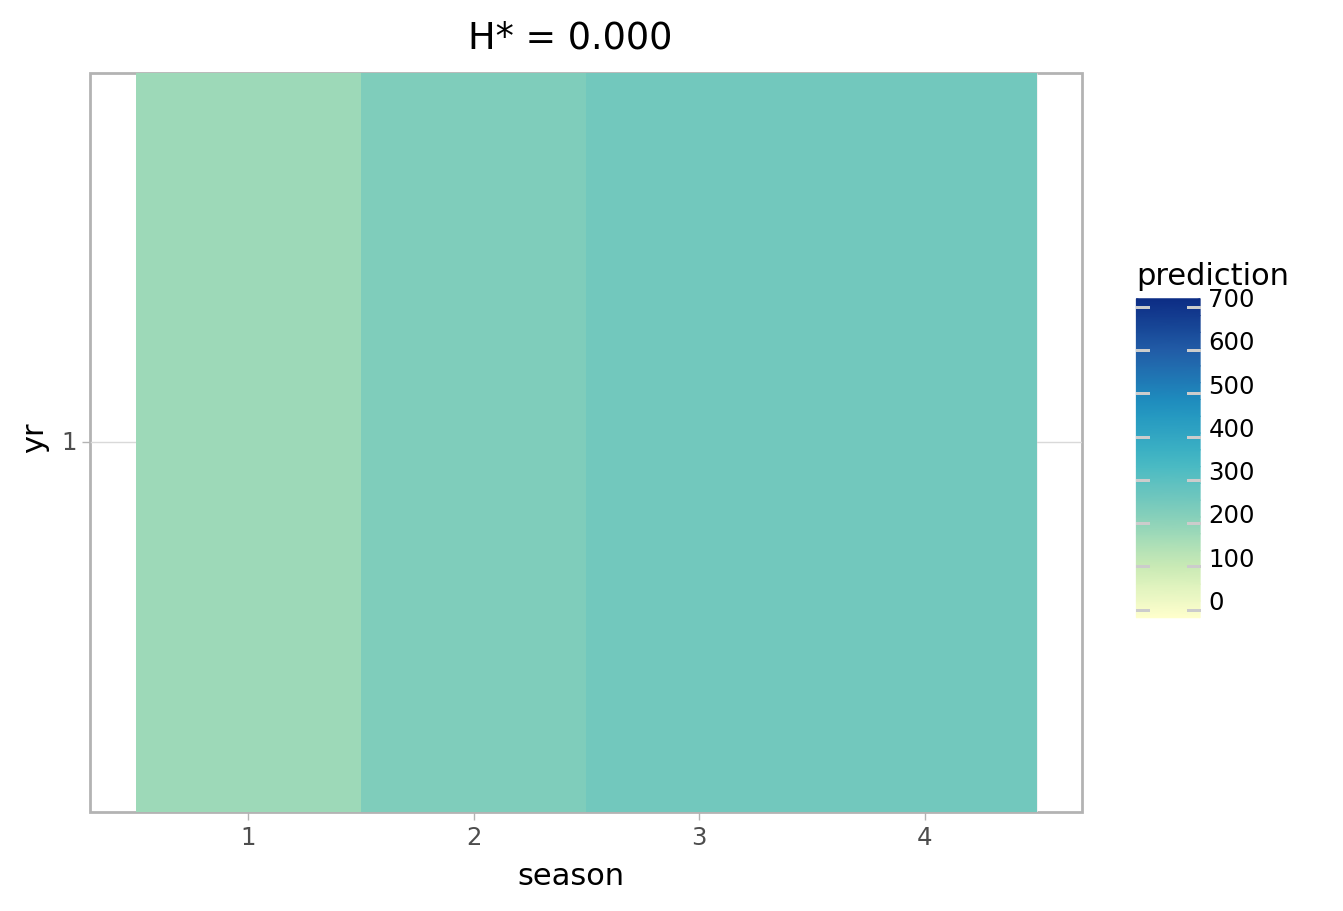

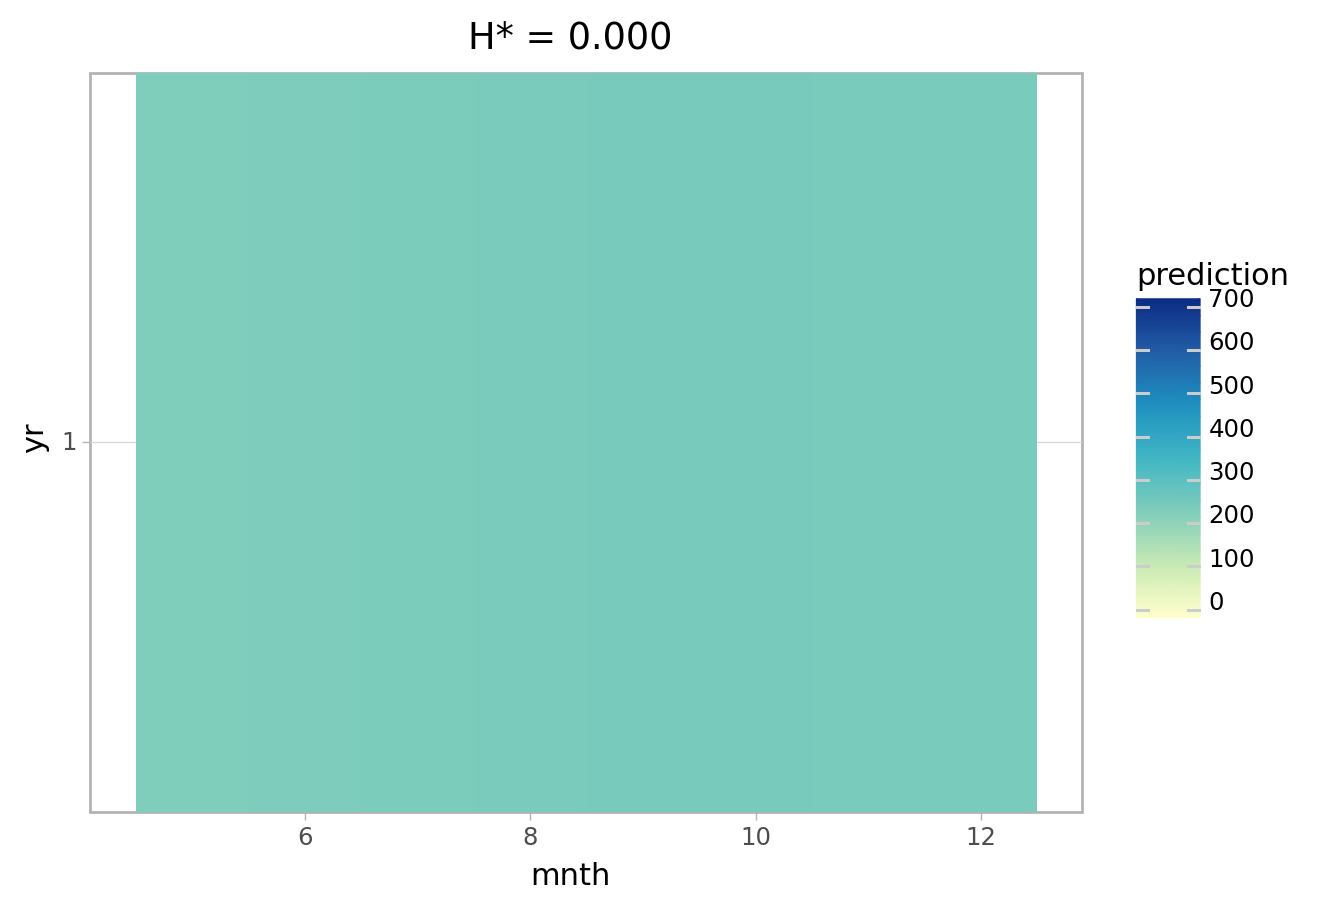

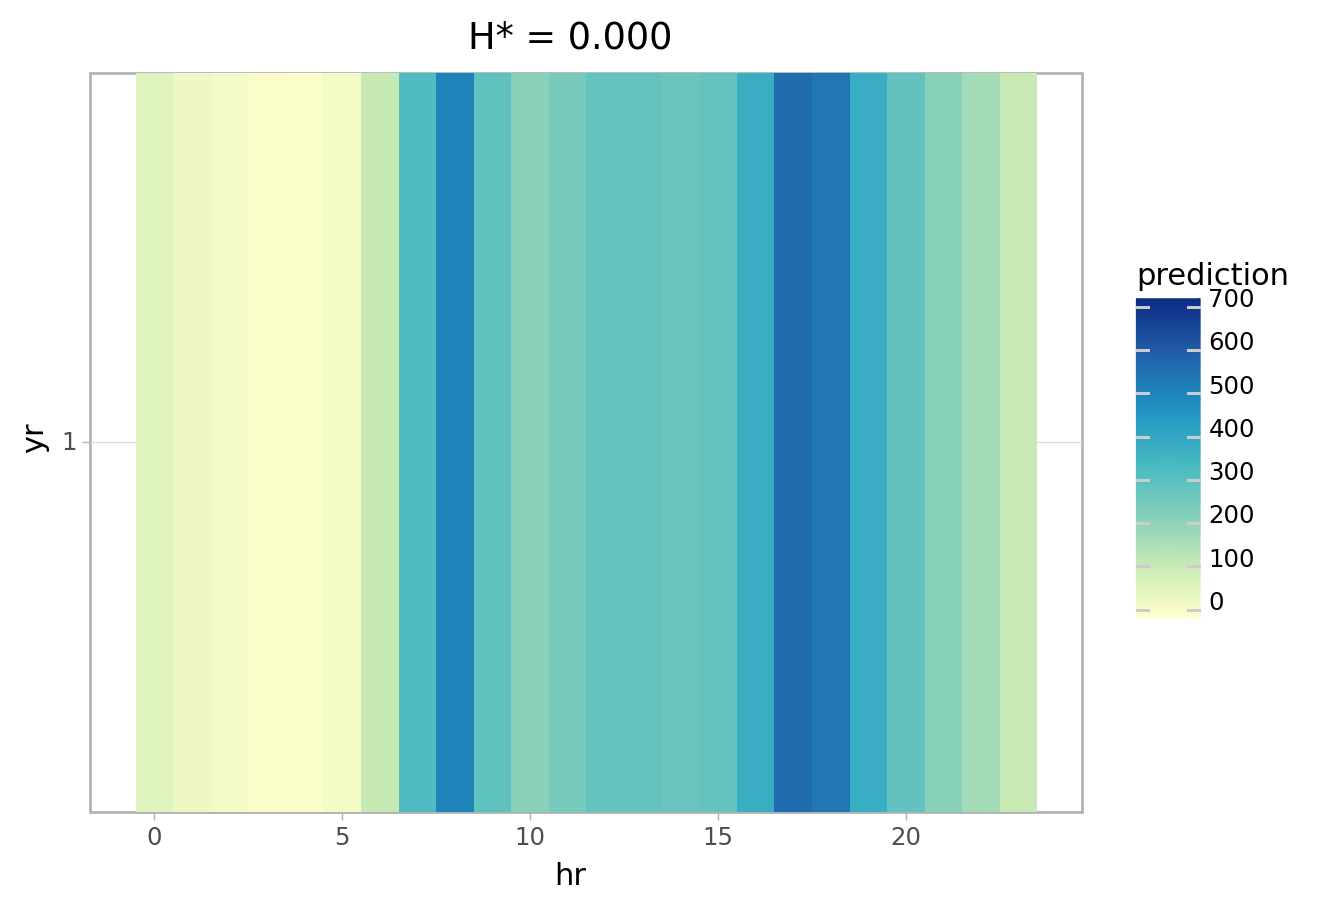

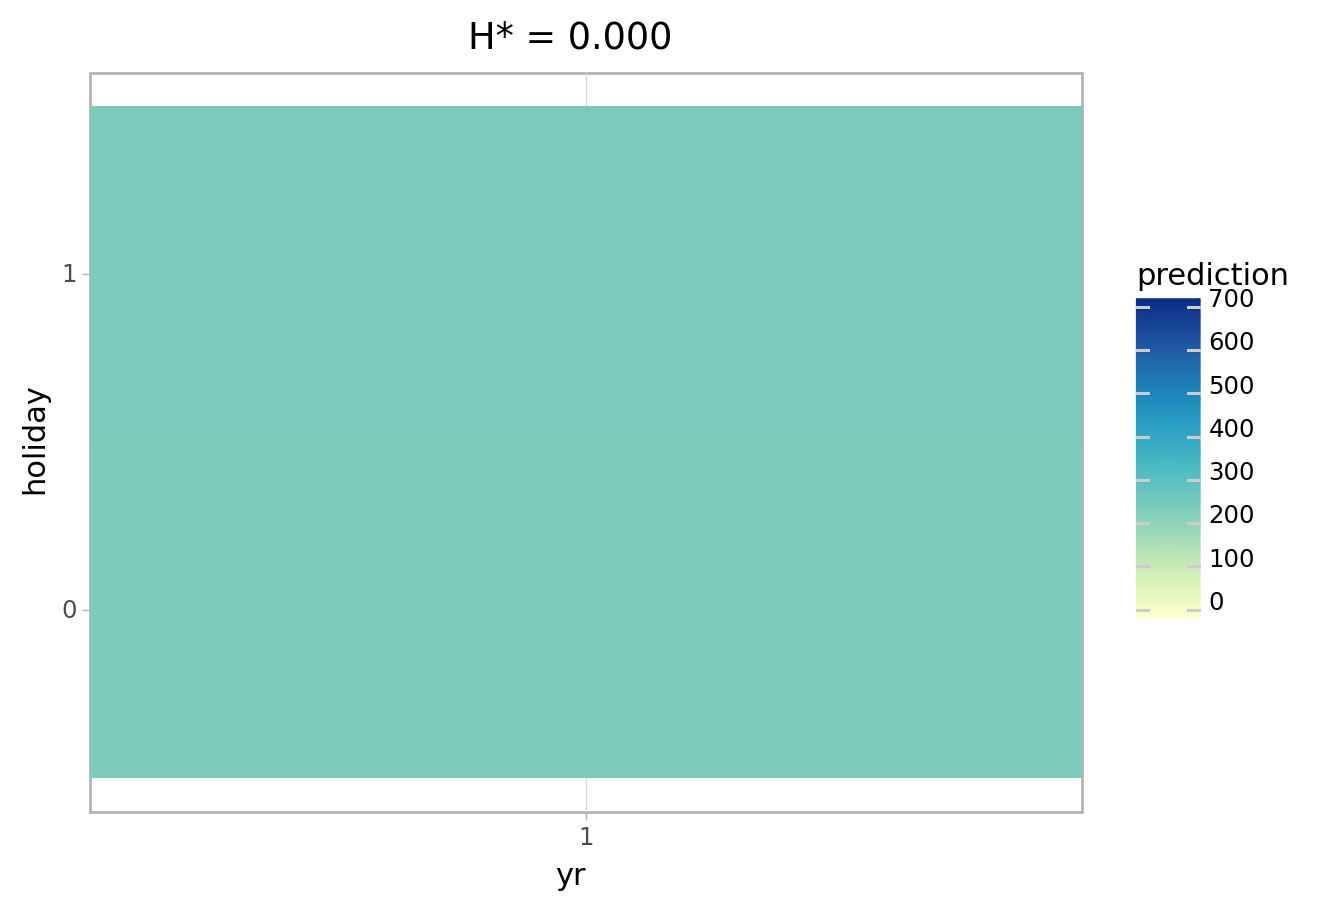

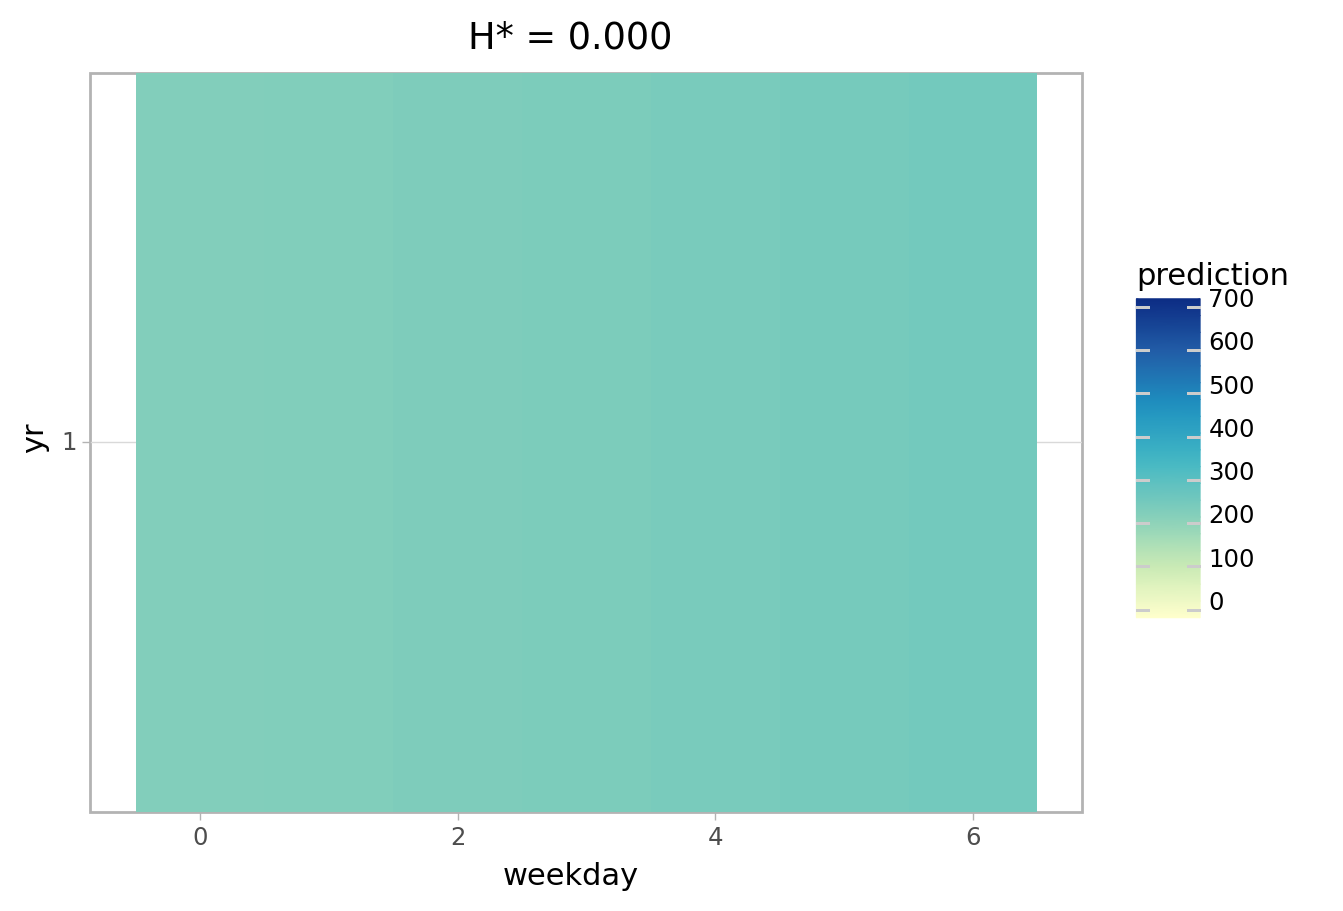

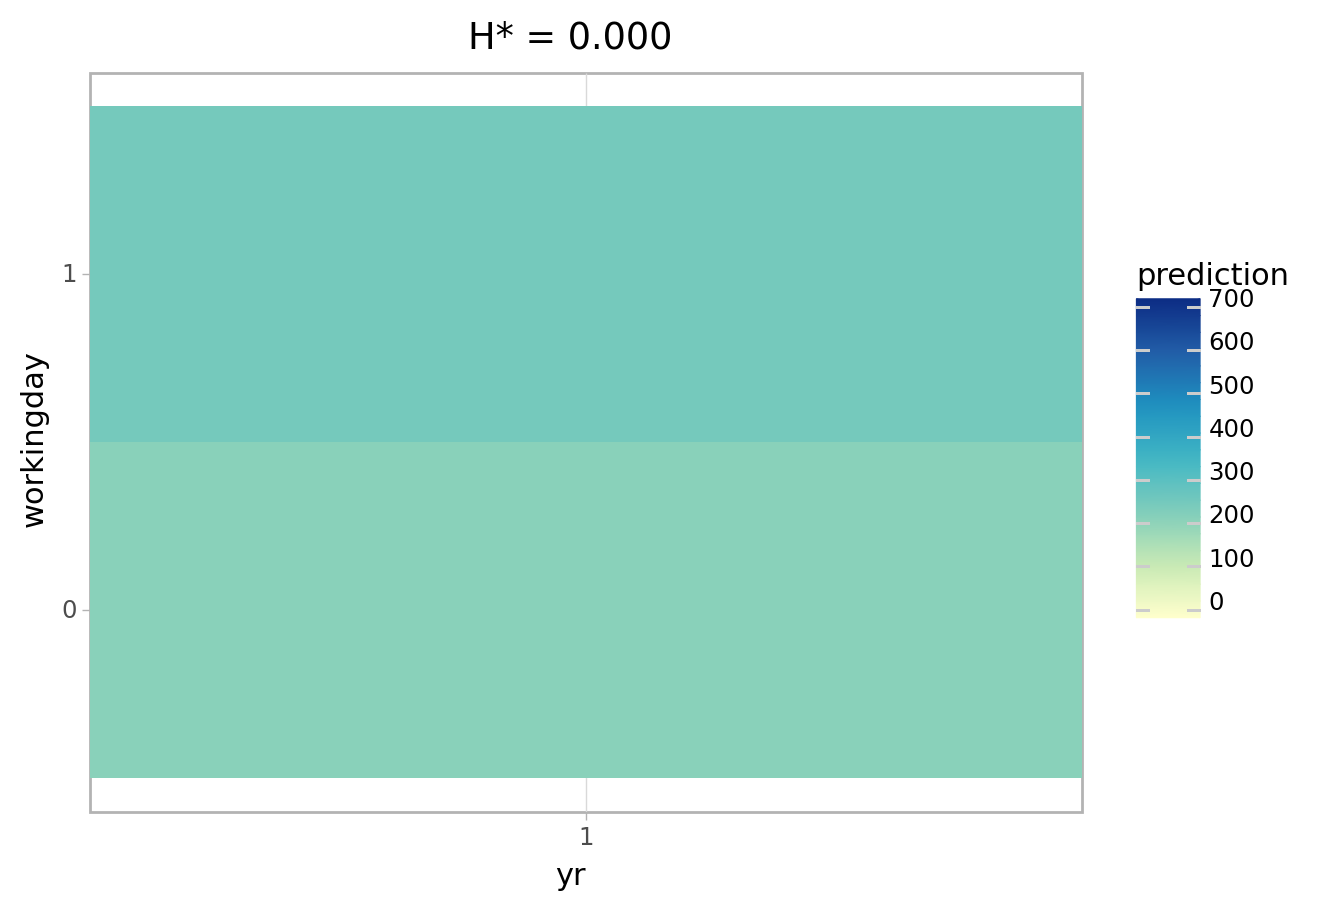

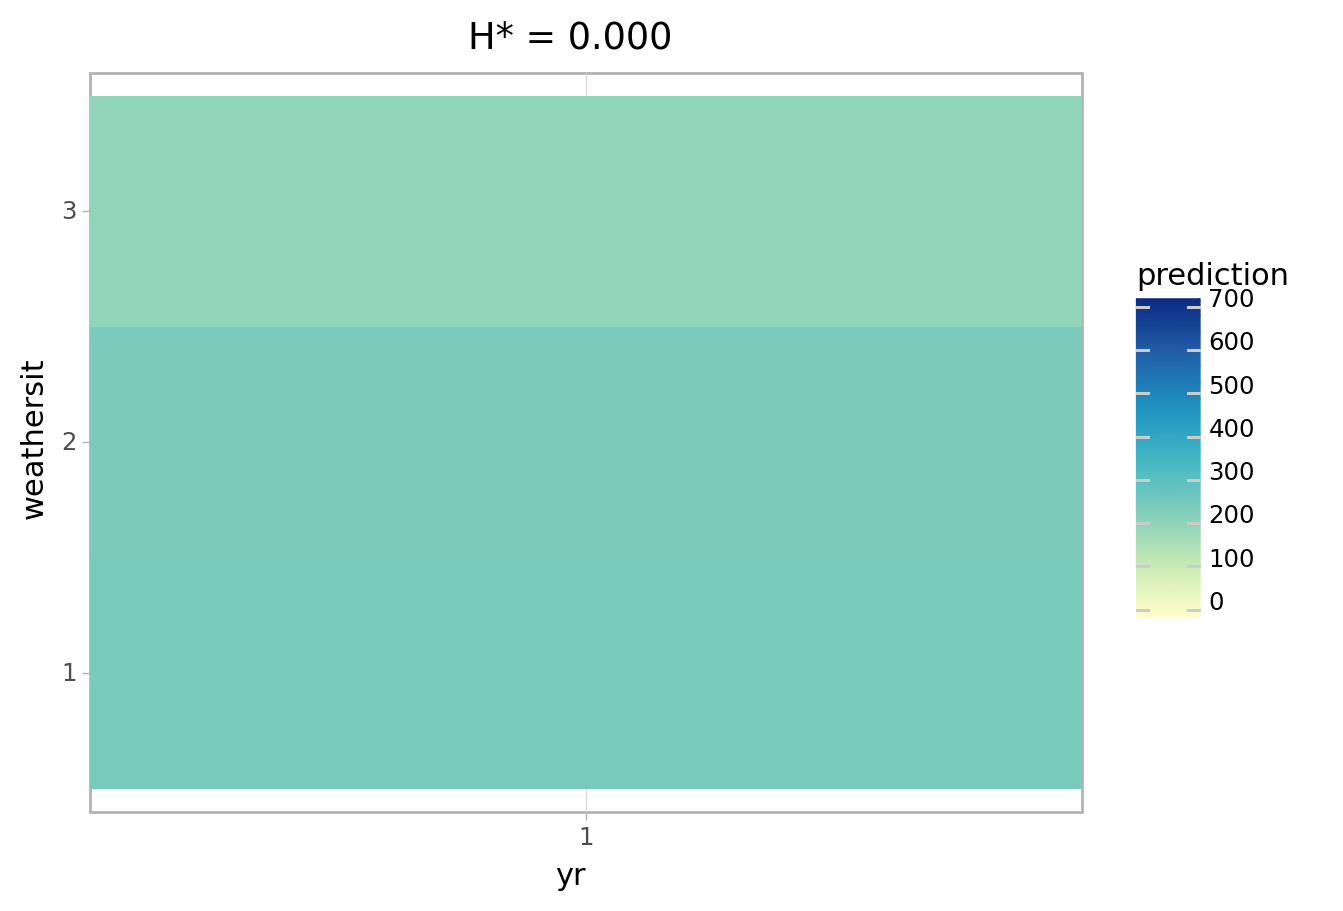

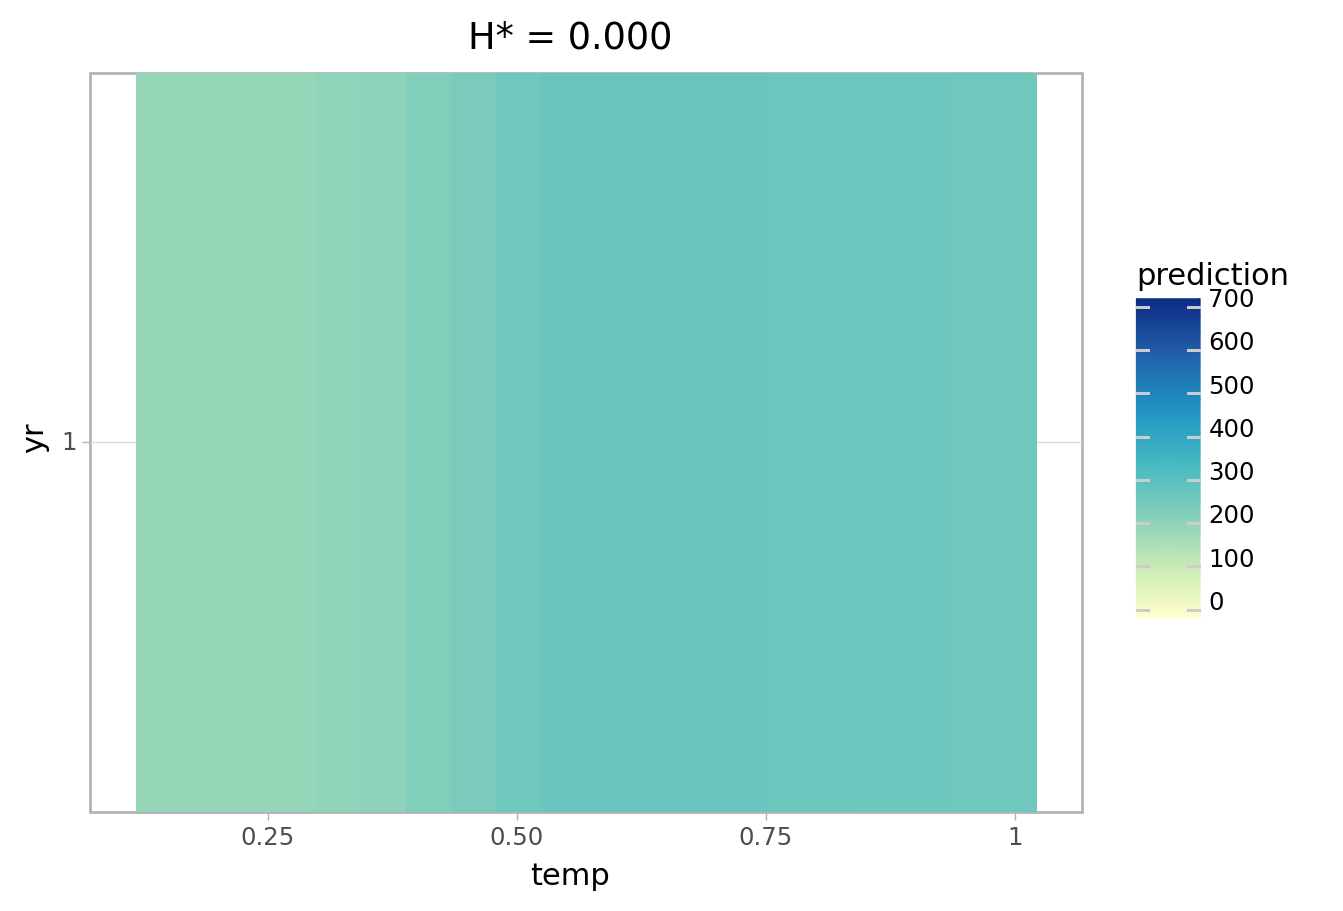

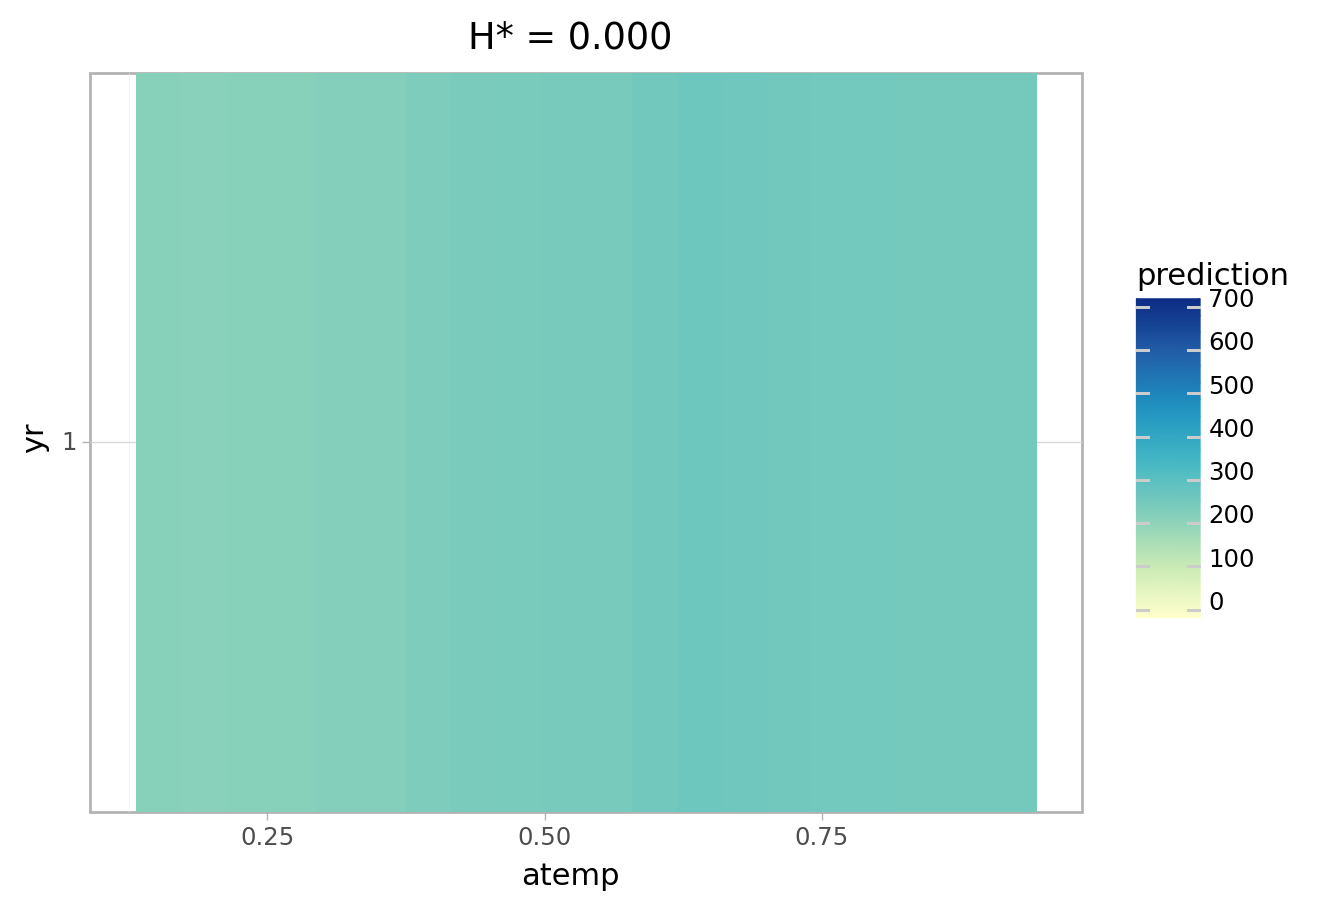

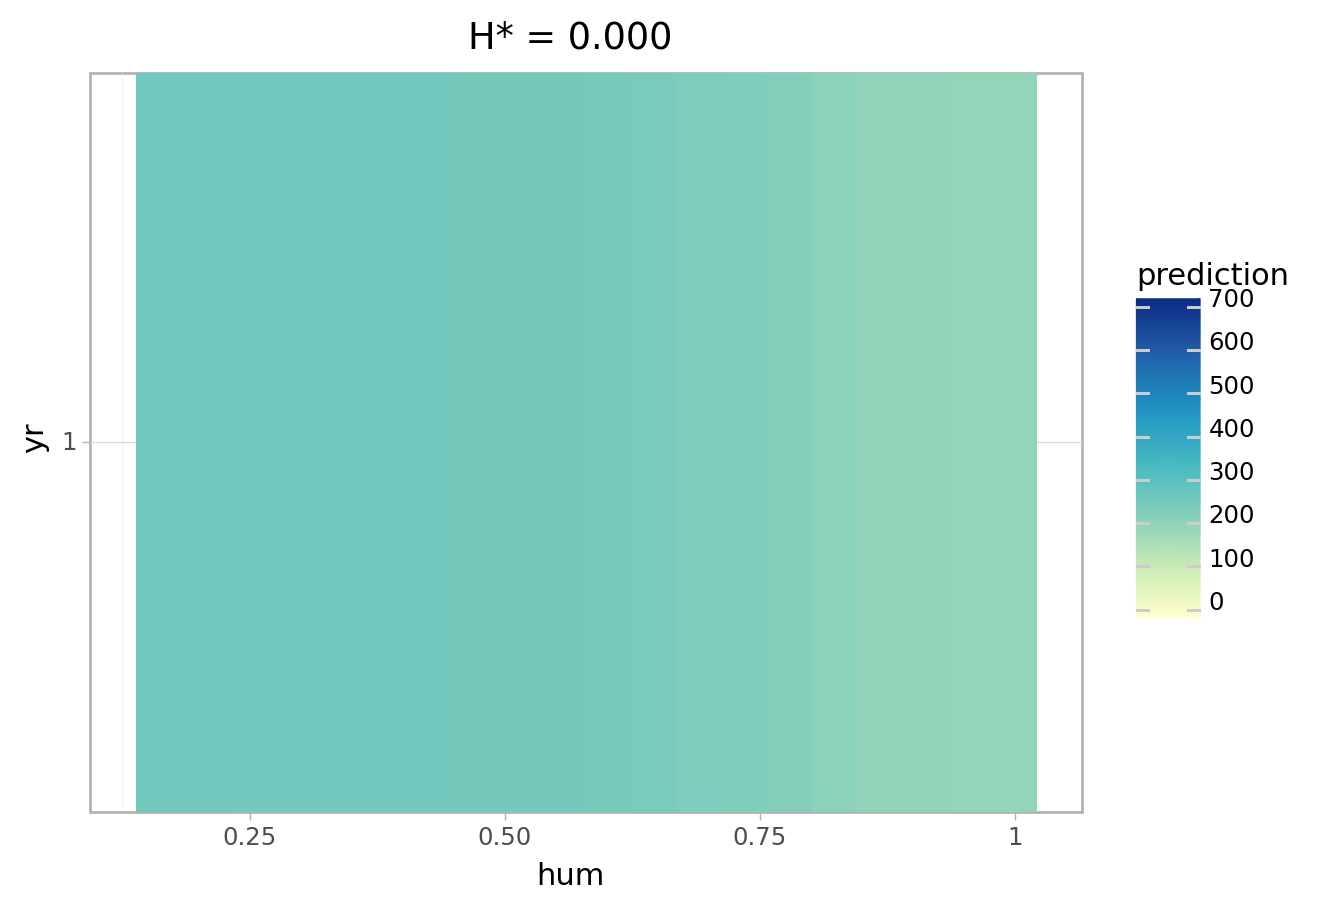

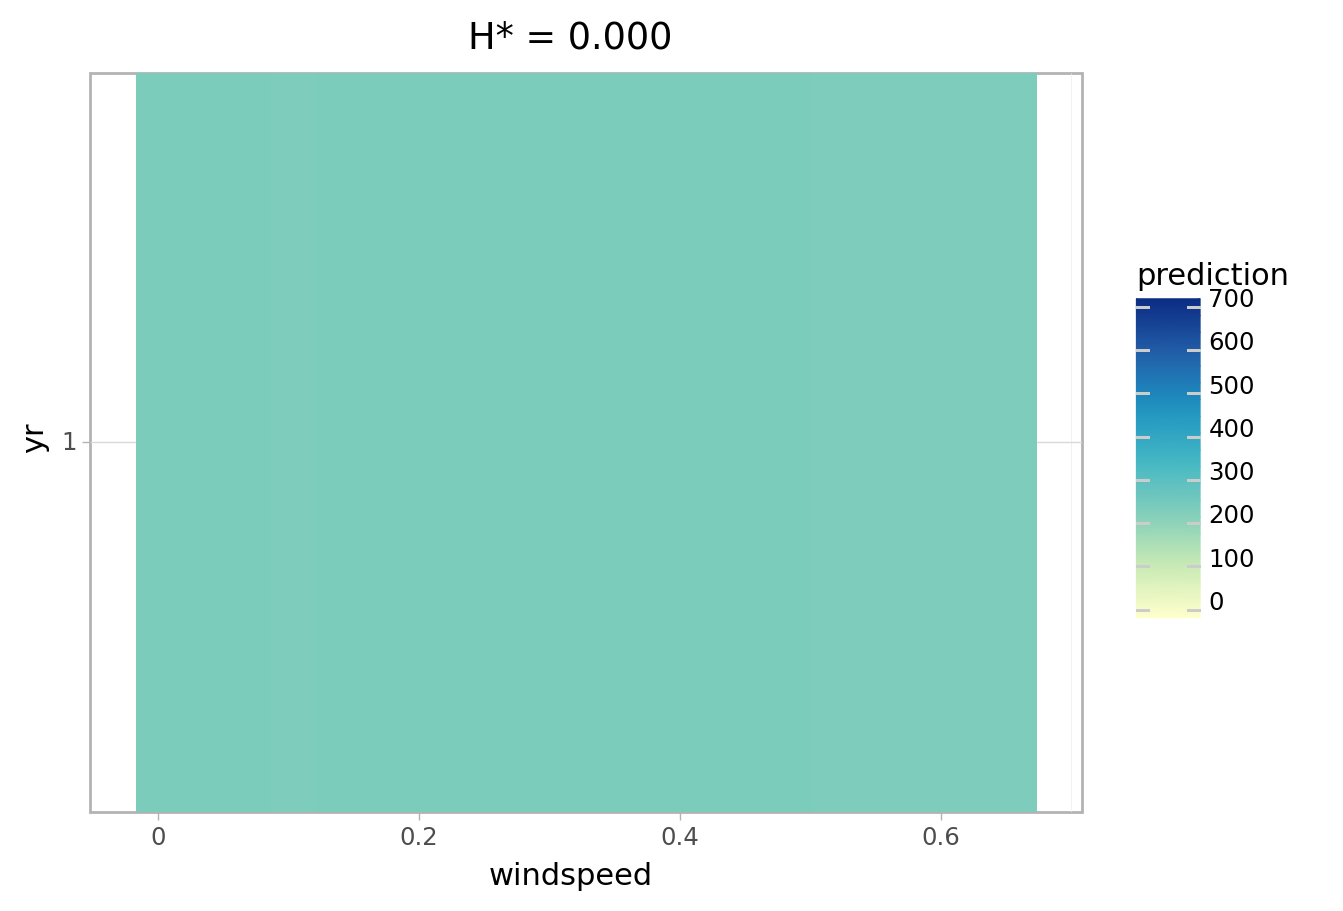

In [15]:
[p.draw() for p in two_way_pdps];